In [243]:
import csv
import pandas as pd
sample_df = pd.read_csv("LeaveTimesTrips_JUN.csv")
sample_df.head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Passengers,Passengersin,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction
0,5107024,DB,2017-06-29,1,1176,62100,62100,62107,62107,1000196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27B,27B_38,2
1,5107024,DB,2017-06-29,2,1177,62116,62116,62156,62174,1000196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27B,27B_38,2
2,5107024,DB,2017-06-29,3,1178,62151,62151,62286,62426,1000196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27B,27B_38,2
3,5107024,DB,2017-06-29,4,1179,62172,62172,62485,62510,1000196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27B,27B_38,2
4,5107024,DB,2017-06-29,18,1238,62640,62640,62767,62784,1000196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27B,27B_38,2


In [244]:
sample_df = sample_df[(sample_df['LineId']=='39A')]
sample_df.head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Passengers,Passengersin,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction
260,5108092,DB,2017-06-28,58,751,42071,42071,44775,44782,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
261,5108092,DB,2017-06-28,26,4747,39484,39484,39865,39957,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
262,5108092,DB,2017-06-28,43,1713,40674,40674,41219,41219,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
263,5108092,DB,2017-06-28,59,752,42137,42137,44875,44886,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
264,5108092,DB,2017-06-28,27,1845,39882,39882,40305,40314,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2


In [245]:
stations = sample_df['ProgrNumber'].sort_values().unique()

In [246]:
# Drop several columns
sample_df = sample_df.drop(['DataSource','Passengers', 'Passengersin','Distance', 'Suppressed','JustificationId','LastUpdate','Note','VehicleId', 'LineId', 'RouteId'], axis=1)
sample_df.head()

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction
260,5108092,2017-06-28,58,751,42071,42071,44775,44782,2
261,5108092,2017-06-28,26,4747,39484,39484,39865,39957,2
262,5108092,2017-06-28,43,1713,40674,40674,41219,41219,2
263,5108092,2017-06-28,59,752,42137,42137,44875,44886,2
264,5108092,2017-06-28,27,1845,39882,39882,40305,40314,2


In [247]:
sample_a_df = sample_df[(sample_df['Direction']) == 1]
sample_b_df = sample_df[(sample_df['Direction']) == 2]

In [248]:
tripids = sample_a_df['TripId'].sort_values().unique()
len(tripids)

413

In [249]:
dayOfService = sample_a_df[(sample_a_df['TripId'] == 5002343)].DayOfService.sort_values().unique()
for day in dayOfService:
    print(day)

2017-06-01
2017-06-02
2017-06-07
2017-06-08
2017-06-09


In [250]:
temp = sample_a_df[(sample_a_df['TripId'] == 5002343) & (sample_a_df['ProgrNumber'] == 1)]
temp

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction
309958,5002343,2017-06-07,1,767,28200,28200,28231,28231,1
310026,5002343,2017-06-08,1,767,28200,28200,28172,28172,1
2113464,5002343,2017-06-09,1,767,28200,28200,28259,28259,1
3128291,5002343,2017-06-01,1,767,28200,28200,28182,28182,1
4056514,5002343,2017-06-02,1,767,28200,28200,28163,28163,1


In [251]:
# Construct the (73+73) * n matrix with the dataset
count = 0
tag = 0
for tripid in tripids:
    # Pick the first 100 trips
    #if tag == 100:
    #    break
    #else:
    #    tag += 1
    dayOfService = sample_a_df[(sample_a_df['TripId'] == tripid)].DayOfService.sort_values().unique()
    
    for day in dayOfService:
        
        timepool = {}
        pool = []
        isUseful = True
        miss_count = 0
        for i in stations:
            oneStationRow = sample_a_df[(sample_a_df['TripId'] == tripid) & (sample_a_df['DayOfService'] == day) & (sample_a_df['ProgrNumber'] == i )]
            #print(oneStationRow)
            try:
                timepool['a_{}'.format(i)] = oneStationRow['PlannedTime_Arr'].iloc[0]
                timepool['b_{}'.format(i)] = oneStationRow['ActualTime_Arr'].iloc[0]
                last_plannedtime_arr = oneStationRow['PlannedTime_Arr'].iloc[0]
                last_actualtime_arr = oneStationRow['ActualTime_Arr'].iloc[0]
            except:
                timepool['a_{}'.format(i)] = last_plannedtime_arr + 10
                timepool['b_{}'.format(i)] = last_actualtime_arr + 10
                miss_count += 1
                if miss_count == 7:
                    isUseful = False
                    break
                continue
                
        #print('----'*20)
        #print(timepool)
        if isUseful == True:
            print(tripid, day, "===" * 20)
            print(timepool)
            if count == 0:
                df = pd.DataFrame(data=timepool,index=[0])
            else:
                df.loc[count] = timepool
            count += 1
    if count % 10 == 0:
        print(count)

5002343 2017-06-07 ============================================================
{'a_11': 28683, 'b_50': 32211, 'b_42': 31414, 'b_12': 28903, 'a_58': 31996, 'a_73': 32344, 'b_65': 32975, 'b_5': 28497, 'a_47': 31567, 'b_18': 29250, 'a_71': 32306, 'a_9': 28592, 'b_3': 28429, 'b_9': 28710, 'b_56': 32448, 'b_15': 29034, 'a_20': 29244, 'b_17': 29119, 'b_33': 30811, 'a_64': 32131, 'a_19': 29104, 'a_35': 30460, 'a_43': 31099, 'a_68': 32224, 'a_72': 32326, 'a_25': 29701, 'b_27': 30291, 'b_73': 33326, 'b_39': 31256, 'a_56': 31924, 'b_72': 33287, 'a_55': 31890, 'a_24': 29545, 'b_16': 29086, 'a_16': 28928, 'a_31': 30229, 'a_2': 28302, 'b_34': 30831, 'a_63': 32097, 'b_11': 28850, 'a_38': 30779, 'b_43': 31483, 'b_57': 32497, 'b_10': 28827, 'b_71': 33257, 'a_59': 32020, 'b_51': 32254, 'a_37': 30705, 'b_49': 32170, 'b_8': 28649, 'b_68': 33130, 'b_31': 30614, 'b_52': 32300, 'b_2': 28367, 'a_36': 30533, 'b_19': 29357, 'b_13': 28929, 'b_58': 32559, 'b_47': 31948, 'a_39': 30861, 'b_4': 28487, 'b_60': 3277

5002345 2017-06-07 ============================================================
{'a_11': 41325, 'b_50': 44813, 'b_42': 43985, 'b_12': 41347, 'a_58': 45117, 'a_73': 45465, 'b_65': 45517, 'b_5': 41044, 'a_47': 44684, 'b_18': 41723, 'a_71': 45427, 'a_9': 41221, 'b_3': 40949, 'b_9': 41206, 'b_56': 45057, 'b_15': 41485, 'a_20': 41966, 'b_17': 41624, 'b_33': 43465, 'a_64': 45252, 'a_19': 41956, 'a_35': 43705, 'a_43': 44152, 'a_68': 45345, 'a_72': 45447, 'a_25': 42798, 'b_27': 42910, 'b_73': 45802, 'b_39': 43849, 'a_56': 45046, 'b_72': 45781, 'a_55': 45013, 'a_24': 42586, 'b_16': 41607, 'a_16': 41655, 'a_31': 43450, 'a_2': 40908, 'b_34': 43500, 'a_63': 45218, 'b_11': 41304, 'a_38': 43924, 'b_43': 44039, 'b_57': 45086, 'b_10': 41255, 'b_71': 45756, 'a_59': 45141, 'b_51': 44849, 'a_37': 43863, 'b_49': 44783, 'b_8': 41158, 'b_68': 45619, 'b_31': 43353, 'b_52': 44897, 'b_2': 40907, 'a_36': 43786, 'b_19': 41863, 'b_13': 41391, 'b_58': 45134, 'b_47': 44471, 'a_39': 43992, 'b_4': 41014, 'b_60': 4533

5002347 2017-06-08 ============================================================
{'a_11': 53331, 'b_50': 57318, 'b_42': 56437, 'b_12': 53589, 'a_58': 57262, 'a_73': 57610, 'b_65': 58000, 'b_5': 53188, 'a_47': 56797, 'b_18': 53952, 'a_71': 57572, 'a_9': 53209, 'b_3': 53075, 'b_9': 53331, 'b_56': 57584, 'b_15': 53791, 'a_20': 53892, 'b_17': 53904, 'b_33': 55752, 'a_64': 57397, 'a_19': 53882, 'a_35': 55800, 'a_43': 56294, 'a_68': 57490, 'a_72': 57592, 'a_25': 54974, 'b_27': 55246, 'b_73': 58409, 'b_39': 56274, 'a_56': 57185, 'b_72': 58382, 'a_55': 57148, 'a_24': 54670, 'b_16': 53863, 'a_16': 53639, 'a_31': 55524, 'a_2': 52930, 'b_34': 55776, 'a_63': 57363, 'b_11': 53487, 'a_38': 56012, 'b_43': 56525, 'b_57': 57614, 'b_10': 53417, 'b_71': 58334, 'a_59': 57286, 'b_51': 57384, 'a_37': 55962, 'b_49': 57263, 'b_8': 53286, 'b_68': 58141, 'b_31': 55548, 'b_52': 57412, 'b_2': 52971, 'a_36': 55863, 'b_19': 54026, 'b_13': 53616, 'b_58': 57661, 'b_47': 56979, 'a_39': 56068, 'b_4': 53132, 'b_60': 5775

5002349 2017-06-09 ============================================================
{'a_11': 67194, 'b_50': 70806, 'b_42': 70006, 'b_12': 67112, 'a_58': 71615, 'a_73': 72180, 'b_65': 71463, 'b_5': 66784, 'a_47': 71010, 'b_18': 67510, 'a_71': 72117, 'a_9': 67080, 'b_3': 66703, 'b_9': 66957, 'b_56': 71042, 'b_15': 67250, 'a_20': 67829, 'b_17': 67432, 'b_33': 69474, 'a_64': 71834, 'a_19': 67819, 'a_35': 69240, 'a_43': 70260, 'a_68': 71986, 'a_72': 72149, 'a_25': 68340, 'b_27': 69036, 'b_73': 71797, 'b_39': 69834, 'a_56': 71512, 'b_72': 71779, 'a_55': 71466, 'a_24': 68235, 'b_16': 67375, 'a_16': 67500, 'a_31': 68929, 'a_2': 66720, 'b_34': 69509, 'a_63': 71779, 'b_11': 67051, 'a_38': 69773, 'b_43': 70083, 'b_57': 71100, 'b_10': 67007, 'b_71': 71753, 'a_59': 71654, 'b_51': 70850, 'a_37': 69660, 'b_49': 70757, 'b_8': 66881, 'b_68': 71590, 'b_31': 69322, 'b_52': 70876, 'b_2': 66636, 'a_36': 69420, 'b_19': 67611, 'b_13': 67139, 'b_58': 71151, 'b_47': 70596, 'a_39': 69900, 'b_4': 66738, 'b_60': 7126

5002462 2017-06-02 ============================================================
{'a_11': 47331, 'b_50': 52237, 'b_42': 51113, 'b_12': 47486, 'a_58': 51262, 'a_73': 51610, 'b_65': 53149, 'b_5': 47078, 'a_47': 50797, 'b_18': 47770, 'a_71': 51543, 'a_9': 47209, 'b_3': 46960, 'b_9': 47263, 'b_56': 52565, 'b_15': 47590, 'a_20': 47892, 'b_17': 47684, 'b_33': 49982, 'a_64': 51397, 'a_19': 47882, 'a_35': 49800, 'a_43': 50294, 'a_68': 51490, 'a_72': 51592, 'a_25': 48974, 'b_27': 49273, 'b_73': 53540, 'b_39': 50892, 'a_56': 51185, 'b_72': 53516, 'a_55': 51148, 'a_24': 48670, 'b_16': 47644, 'a_16': 47639, 'a_31': 49524, 'a_2': 46930, 'b_34': 50003, 'a_63': 51363, 'b_11': 47386, 'a_38': 50012, 'b_43': 51190, 'b_57': 52624, 'b_10': 47349, 'b_71': 53419, 'a_59': 51286, 'b_51': 52324, 'a_37': 49962, 'b_49': 52182, 'b_8': 47202, 'b_68': 53324, 'b_31': 49738, 'b_52': 52352, 'b_2': 46877, 'a_36': 49863, 'b_19': 47920, 'b_13': 47529, 'b_58': 52681, 'b_47': 51711, 'a_39': 50068, 'b_4': 47032, 'b_60': 5286

5002464 2017-06-01 ============================================================
{'a_11': 60566, 'b_50': 66998, 'b_42': 65905, 'b_12': 60729, 'a_58': 65492, 'a_73': 65840, 'b_65': 67981, 'b_5': 60302, 'a_47': 64846, 'b_18': 61129, 'a_71': 65802, 'a_9': 60456, 'b_3': 60221, 'b_9': 60465, 'b_56': 67375, 'b_15': 60842, 'a_20': 61198, 'b_17': 61015, 'b_33': 64313, 'a_64': 65627, 'a_19': 61188, 'a_35': 63213, 'a_43': 63856, 'a_68': 65720, 'a_72': 65822, 'a_25': 62242, 'b_27': 62834, 'b_73': 68664, 'b_39': 65653, 'a_56': 65403, 'b_72': 68366, 'a_55': 65358, 'a_24': 61955, 'b_16': 60967, 'a_16': 60949, 'a_31': 62859, 'a_2': 60166, 'b_34': 64431, 'a_63': 65593, 'b_11': 60581, 'a_38': 63567, 'b_43': 66022, 'b_57': 67432, 'b_10': 60521, 'b_71': 68333, 'a_59': 65516, 'b_51': 67106, 'a_37': 63505, 'b_49': 66955, 'b_8': 60391, 'b_68': 68161, 'b_31': 63956, 'b_52': 67159, 'b_2': 60097, 'a_36': 63345, 'b_19': 61290, 'b_13': 60764, 'b_58': 67486, 'b_47': 66565, 'a_39': 63636, 'b_4': 60286, 'b_60': 6764

5002466 2017-06-07 ============================================================
{'a_11': 73729, 'b_50': 76636, 'b_42': 75950, 'b_12': 73874, 'a_58': 77643, 'a_73': 77991, 'b_65': 77308, 'b_5': 73511, 'a_47': 77057, 'b_18': 74120, 'a_71': 77953, 'a_9': 73641, 'b_3': 73416, 'b_9': 73738, 'b_56': 76883, 'b_15': 73968, 'a_20': 74249, 'b_17': 74073, 'b_33': 75440, 'a_64': 77778, 'a_19': 74239, 'a_35': 75843, 'a_43': 76469, 'a_68': 77871, 'a_72': 77973, 'a_25': 75143, 'b_27': 75106, 'b_73': 77625, 'b_39': 75766, 'a_56': 77549, 'b_72': 77604, 'a_55': 77500, 'a_24': 74895, 'b_16': 74039, 'a_16': 74015, 'a_31': 75651, 'a_2': 73337, 'b_34': 75464, 'a_63': 77744, 'b_11': 73846, 'a_38': 76169, 'b_43': 76016, 'b_57': 76928, 'b_10': 73790, 'b_71': 77579, 'a_59': 77667, 'b_51': 76683, 'a_37': 76101, 'b_49': 76602, 'b_8': 73707, 'b_68': 77439, 'b_31': 75327, 'b_52': 76723, 'b_2': 73349, 'a_36': 75951, 'b_19': 74173, 'b_13': 73893, 'b_58': 76972, 'b_47': 76453, 'a_39': 76244, 'b_4': 73454, 'b_60': 7707

5002567 2017-06-09 ============================================================
{'a_11': 59666, 'b_50': 64426, 'b_42': 63367, 'b_12': 59769, 'a_58': 64592, 'a_73': 64882, 'b_65': 65219, 'b_5': 59464, 'a_47': 63946, 'b_18': 60013, 'a_71': 64882, 'a_9': 59556, 'b_3': 59363, 'b_9': 59624, 'b_56': 64774, 'b_15': 59865, 'a_20': 60298, 'b_17': 59930, 'b_33': 62674, 'a_64': 64727, 'a_19': 60288, 'a_35': 62313, 'a_43': 62956, 'a_68': 64820, 'a_72': 64882, 'a_25': 61342, 'b_27': 62068, 'b_73': 65478, 'b_39': 63104, 'a_56': 64503, 'b_72': 65478, 'a_55': 64458, 'a_24': 61055, 'b_16': 59909, 'a_16': 60049, 'a_31': 61959, 'a_2': 59266, 'b_34': 62717, 'a_63': 64693, 'b_11': 59665, 'a_38': 62667, 'b_43': 63435, 'b_57': 64832, 'b_10': 59647, 'b_71': 65478, 'a_59': 64616, 'b_51': 64542, 'a_37': 62605, 'b_49': 64387, 'b_8': 59555, 'b_68': 65375, 'b_31': 62495, 'b_52': 64590, 'b_2': 59297, 'a_36': 62445, 'b_19': 60174, 'b_13': 59807, 'b_58': 64877, 'b_47': 63865, 'a_39': 62736, 'b_4': 59435, 'b_60': 6498

5003104 2017-06-07 ============================================================
{'a_11': 47931, 'b_50': 51281, 'b_42': 50602, 'b_12': 47907, 'a_58': 51862, 'a_73': 52210, 'b_65': 52006, 'b_5': 47613, 'a_47': 51397, 'b_18': 48162, 'a_71': 52172, 'a_9': 47809, 'b_3': 47568, 'b_9': 47772, 'b_56': 51537, 'b_15': 47986, 'a_20': 48492, 'b_17': 48064, 'b_33': 50092, 'a_64': 51997, 'a_19': 48482, 'a_35': 50400, 'a_43': 50894, 'a_68': 52090, 'a_72': 52192, 'a_25': 49574, 'b_27': 49544, 'b_73': 52345, 'b_39': 50494, 'a_56': 51785, 'b_72': 52322, 'a_55': 51748, 'a_24': 49270, 'b_16': 48045, 'a_16': 48239, 'a_31': 50124, 'a_2': 47530, 'b_34': 50112, 'a_63': 51963, 'b_11': 47865, 'a_38': 50612, 'b_43': 50656, 'b_57': 51584, 'b_10': 47831, 'b_71': 52297, 'a_59': 51886, 'b_51': 51361, 'a_37': 50562, 'b_49': 51249, 'b_8': 47735, 'b_68': 52160, 'b_31': 49922, 'b_52': 51387, 'b_2': 47516, 'a_36': 50463, 'b_19': 48315, 'b_13': 47929, 'b_58': 51635, 'b_47': 51043, 'a_39': 50668, 'b_4': 47603, 'b_60': 5178

5003483 2017-06-07 ============================================================
{'a_11': 30610, 'b_50': 34653, 'b_42': 33915, 'b_12': 30821, 'a_58': 34050, 'a_73': 34398, 'b_65': 35250, 'b_5': 30330, 'a_47': 33653, 'b_18': 31339, 'a_71': 34360, 'a_9': 30492, 'b_3': 30180, 'b_9': 30558, 'b_56': 34879, 'b_15': 31121, 'a_20': 31297, 'b_17': 31255, 'b_33': 33450, 'a_64': 34185, 'a_19': 31106, 'a_35': 32622, 'a_43': 33177, 'a_68': 34278, 'a_72': 34380, 'a_25': 31910, 'b_27': 32745, 'b_73': 35572, 'b_39': 33794, 'a_56': 33982, 'b_72': 35550, 'a_55': 33952, 'a_24': 31700, 'b_16': 31208, 'a_16': 30888, 'a_31': 32418, 'a_2': 30137, 'b_34': 33479, 'a_63': 34151, 'b_11': 30703, 'a_38': 32901, 'b_43': 34000, 'b_57': 34942, 'b_10': 30644, 'b_71': 35525, 'a_59': 34060, 'b_51': 34721, 'a_37': 32826, 'b_49': 34614, 'b_8': 30497, 'b_68': 35381, 'b_31': 33262, 'b_52': 34757, 'b_2': 30104, 'a_36': 32689, 'b_19': 31443, 'b_13': 30873, 'b_58': 34978, 'b_47': 34416, 'a_39': 32985, 'b_4': 30307, 'b_60': 3498

5003485 2017-06-09 ============================================================
{'a_11': 42525, 'b_50': 47432, 'b_42': 46516, 'b_12': 42693, 'a_58': 46317, 'a_73': 46665, 'b_65': 48178, 'b_5': 42337, 'a_47': 45884, 'b_18': 43153, 'a_71': 46627, 'a_9': 42421, 'b_3': 42285, 'b_9': 42527, 'b_56': 47612, 'b_15': 42849, 'a_20': 43166, 'b_17': 43048, 'b_33': 45899, 'a_64': 46452, 'a_19': 43156, 'a_35': 44905, 'a_43': 45352, 'a_68': 46545, 'a_72': 46647, 'a_25': 43998, 'b_27': 45163, 'b_73': 48616, 'b_39': 46320, 'a_56': 46246, 'b_72': 48570, 'a_55': 46213, 'a_24': 43786, 'b_16': 43029, 'a_16': 42855, 'a_31': 44650, 'a_2': 42108, 'b_34': 45923, 'a_63': 46418, 'b_11': 42656, 'a_38': 45124, 'b_43': 46609, 'b_57': 47667, 'b_10': 42618, 'b_71': 48526, 'a_59': 46341, 'b_51': 47475, 'a_37': 45063, 'b_49': 47369, 'b_8': 42489, 'b_68': 48351, 'b_31': 45642, 'b_52': 47501, 'b_2': 42225, 'a_36': 44986, 'b_19': 43317, 'b_13': 42733, 'b_58': 47719, 'b_47': 47148, 'a_39': 45192, 'b_4': 42325, 'b_60': 4786

5003487 2017-06-09 ============================================================
{'a_11': 54566, 'b_50': 59106, 'b_42': 58192, 'b_12': 54681, 'a_58': 59492, 'a_73': 59840, 'b_65': 60018, 'b_5': 54373, 'a_47': 58846, 'b_18': 55007, 'a_71': 59802, 'a_9': 54456, 'b_3': 54271, 'b_9': 54528, 'b_56': 59486, 'b_15': 54866, 'a_20': 55198, 'b_17': 54952, 'b_33': 57399, 'a_64': 59627, 'a_19': 55188, 'a_35': 57213, 'a_43': 57856, 'a_68': 59720, 'a_72': 59822, 'a_25': 56242, 'b_27': 56831, 'b_73': 60416, 'b_39': 58035, 'a_56': 59403, 'b_72': 60375, 'a_55': 59358, 'a_24': 55955, 'b_16': 54909, 'a_16': 54949, 'a_31': 56859, 'a_2': 54166, 'b_34': 57423, 'a_63': 59593, 'b_11': 54602, 'a_38': 57567, 'b_43': 58280, 'b_57': 59538, 'b_10': 54569, 'b_71': 60350, 'a_59': 59516, 'b_51': 59250, 'a_37': 57505, 'b_49': 59063, 'b_8': 54488, 'b_68': 60192, 'b_31': 57150, 'b_52': 59327, 'b_2': 54184, 'a_36': 57345, 'b_19': 55081, 'b_13': 54719, 'b_58': 59594, 'b_47': 58724, 'a_39': 57636, 'b_4': 54360, 'b_60': 5975

5003491 2017-06-07 ============================================================
{'a_11': 79632, 'b_50': 82187, 'b_42': 81561, 'b_12': 79655, 'a_58': 82688, 'a_73': 83036, 'b_65': 82839, 'b_5': 79398, 'a_47': 82254, 'b_18': 79824, 'a_71': 82998, 'a_9': 79558, 'b_3': 79349, 'b_9': 79533, 'b_56': 82368, 'b_15': 79725, 'a_20': 80039, 'b_17': 79782, 'b_33': 81146, 'a_64': 82823, 'a_19': 80029, 'a_35': 81399, 'a_43': 81807, 'a_68': 82916, 'a_72': 83018, 'a_25': 80713, 'b_27': 80706, 'b_73': 83242, 'b_39': 81388, 'a_56': 82613, 'b_72': 83206, 'a_55': 82578, 'a_24': 80523, 'b_16': 79766, 'a_16': 79869, 'a_31': 81176, 'a_2': 79302, 'b_34': 81163, 'a_63': 82789, 'b_11': 79615, 'a_38': 81568, 'b_43': 81631, 'b_57': 82418, 'b_10': 79572, 'b_71': 83157, 'a_59': 82712, 'b_51': 82218, 'a_37': 81524, 'b_49': 82131, 'b_8': 79506, 'b_68': 82993, 'b_31': 81013, 'b_52': 82241, 'b_2': 79304, 'a_36': 81463, 'b_19': 79895, 'b_13': 79680, 'b_58': 82479, 'b_47': 82020, 'a_39': 81618, 'b_4': 79387, 'b_60': 8261

5003603 2017-06-09 ============================================================
{'a_11': 24483, 'b_50': 27032, 'b_42': 26380, 'b_12': 24616, 'a_58': 27796, 'a_73': 28144, 'b_65': 27739, 'b_5': 24400, 'a_47': 27367, 'b_18': 24916, 'a_71': 28106, 'a_9': 24392, 'b_3': 28711, 'b_9': 24491, 'b_56': 27265, 'b_15': 24742, 'a_20': 24914, 'b_17': 24828, 'b_33': 26045, 'a_64': 27931, 'a_19': 24904, 'a_35': 26260, 'a_43': 26899, 'a_68': 28024, 'a_72': 28126, 'a_25': 25501, 'b_27': 25656, 'b_73': 28140, 'b_39': 26296, 'a_56': 27724, 'b_72': 28095, 'a_55': 27690, 'a_24': 25345, 'b_16': 24811, 'a_16': 24728, 'a_31': 26029, 'a_2': 28154, 'b_34': 26064, 'a_63': 27897, 'b_11': 24559, 'a_38': 26579, 'b_43': 26450, 'b_57': 27310, 'b_10': 24545, 'b_71': 28046, 'a_59': 27820, 'b_51': 27085, 'a_37': 26505, 'b_49': 27012, 'b_8': 24459, 'b_68': 27873, 'b_31': 25940, 'b_52': 27125, 'b_2': 28711, 'a_36': 26333, 'b_19': 24988, 'b_13': 24670, 'b_58': 27371, 'b_47': 26884, 'a_39': 26661, 'b_4': 24377, 'b_60': 2744

5003607 2017-06-01 ============================================================
{'a_11': 49131, 'b_50': 53043, 'b_42': 52323, 'b_12': 49196, 'a_58': 53062, 'a_73': 53410, 'b_65': 53879, 'b_5': 48852, 'a_47': 52597, 'b_18': 49584, 'a_71': 53372, 'a_9': 49009, 'b_3': 48755, 'b_9': 49048, 'b_56': 53243, 'b_15': 49346, 'a_20': 49692, 'b_17': 49446, 'b_33': 51316, 'a_64': 53197, 'a_19': 49682, 'a_35': 51600, 'a_43': 52094, 'a_68': 53290, 'a_72': 53392, 'a_25': 50774, 'b_27': 50782, 'b_73': 54263, 'b_39': 52166, 'a_56': 52985, 'b_72': 54226, 'a_55': 52948, 'a_24': 50470, 'b_16': 49422, 'a_16': 49439, 'a_31': 51324, 'a_2': 48730, 'b_34': 51340, 'a_63': 53163, 'b_11': 49133, 'a_38': 51812, 'b_43': 52417, 'b_57': 53276, 'b_10': 49081, 'b_71': 54197, 'a_59': 53086, 'b_51': 53068, 'a_37': 51762, 'b_49': 52995, 'b_8': 48997, 'b_68': 54022, 'b_31': 51122, 'b_52': 53116, 'b_2': 48707, 'a_36': 51663, 'b_19': 49728, 'b_13': 49237, 'b_58': 53338, 'b_47': 52833, 'a_39': 51868, 'b_4': 48765, 'b_60': 5349

5003609 2017-06-07 ============================================================
{'a_11': 62514, 'b_50': 67383, 'b_42': 66258, 'b_12': 62465, 'a_58': 67475, 'a_73': 68040, 'b_65': 68370, 'b_5': 62007, 'a_47': 66847, 'b_18': 62730, 'a_71': 67977, 'a_9': 62400, 'b_3': 61929, 'b_9': 62158, 'b_56': 67766, 'b_15': 62570, 'a_20': 63219, 'b_17': 62689, 'b_33': 65759, 'a_64': 67694, 'a_19': 63209, 'a_35': 64800, 'a_43': 66000, 'a_68': 67846, 'a_72': 68009, 'a_25': 63840, 'b_27': 65165, 'b_73': 68911, 'b_39': 66090, 'a_56': 67372, 'b_72': 68731, 'a_55': 67326, 'a_24': 63735, 'b_16': 62656, 'a_16': 62820, 'a_31': 64489, 'a_2': 61920, 'b_34': 65781, 'a_63': 67639, 'b_11': 62246, 'a_38': 65513, 'b_43': 66382, 'b_57': 67845, 'b_10': 62197, 'b_71': 68700, 'a_59': 67514, 'b_51': 67536, 'a_37': 65400, 'b_49': 67346, 'b_8': 62094, 'b_68': 68524, 'b_31': 65566, 'b_52': 67586, 'b_2': 61869, 'a_36': 65100, 'b_19': 63077, 'b_13': 62499, 'b_58': 67896, 'b_47': 66936, 'a_39': 65640, 'b_4': 61970, 'b_60': 6803

5003709 2017-06-08 ============================================================
{'a_11': 31810, 'b_50': 35904, 'b_42': 34826, 'b_12': 31975, 'a_58': 35250, 'a_73': 35598, 'b_65': 36566, 'b_5': 31488, 'a_47': 34853, 'b_18': 32407, 'a_71': 35560, 'a_9': 31692, 'b_3': 31392, 'b_9': 31736, 'b_56': 36134, 'b_15': 32197, 'a_20': 32497, 'b_17': 32359, 'b_33': 34332, 'a_64': 35385, 'a_19': 32306, 'a_35': 33822, 'a_43': 34377, 'a_68': 35478, 'a_72': 35580, 'a_25': 33110, 'b_27': 33549, 'b_73': 36840, 'b_39': 34696, 'a_56': 35182, 'b_72': 36819, 'a_55': 35152, 'a_24': 32900, 'b_16': 32289, 'a_16': 32088, 'a_31': 33618, 'a_2': 31337, 'b_34': 34367, 'a_63': 35351, 'b_11': 31893, 'a_38': 34101, 'b_43': 34896, 'b_57': 36168, 'b_10': 31807, 'b_71': 36786, 'a_59': 35274, 'b_51': 35964, 'a_37': 34026, 'b_49': 35889, 'b_8': 31681, 'b_68': 36669, 'b_31': 34107, 'b_52': 36002, 'b_2': 31316, 'a_36': 33889, 'b_19': 32498, 'b_13': 32031, 'b_58': 36215, 'b_47': 35729, 'a_39': 34185, 'b_4': 31450, 'b_60': 3632

5003713 2017-06-09 ============================================================
{'a_11': 55766, 'b_50': 60006, 'b_42': 59199, 'b_12': 56018, 'a_58': 60692, 'a_73': 61040, 'b_65': 60765, 'b_5': 55582, 'a_47': 60046, 'b_18': 56337, 'a_71': 61002, 'a_9': 55656, 'b_3': 55475, 'b_9': 55798, 'b_56': 60233, 'b_15': 56169, 'a_20': 56398, 'b_17': 56272, 'b_33': 58632, 'a_64': 60827, 'a_19': 56388, 'a_35': 58413, 'a_43': 59056, 'a_68': 60920, 'a_72': 61022, 'a_25': 57442, 'b_27': 58003, 'b_73': 61110, 'b_39': 59076, 'a_56': 60603, 'b_72': 61091, 'a_55': 60558, 'a_24': 57155, 'b_16': 56250, 'a_16': 56149, 'a_31': 58059, 'a_2': 55366, 'b_34': 58659, 'a_63': 60793, 'b_11': 55900, 'a_38': 58767, 'b_43': 59265, 'b_57': 60265, 'b_10': 55856, 'b_71': 61062, 'a_59': 60716, 'b_51': 60048, 'a_37': 58705, 'b_49': 59961, 'b_8': 55727, 'b_68': 60894, 'b_31': 58480, 'b_52': 60074, 'b_2': 55380, 'a_36': 58545, 'b_19': 56451, 'b_13': 56048, 'b_58': 60314, 'b_47': 59741, 'a_39': 58836, 'b_4': 55546, 'b_60': 6052

5004029 2017-06-10 ============================================================
{'a_11': 24747, 'b_50': 26737, 'b_42': 26194, 'b_12': 24644, 'a_58': 27035, 'a_73': 27600, 'b_65': 27200, 'b_5': 24417, 'a_47': 26739, 'b_18': 24804, 'a_71': 27537, 'a_9': 24660, 'b_3': 24380, 'b_9': 24537, 'b_56': 26875, 'b_15': 24713, 'a_20': 25040, 'b_17': 24772, 'b_33': 25911, 'a_64': 27254, 'a_19': 25030, 'a_35': 25920, 'a_43': 26280, 'a_68': 27406, 'a_72': 27569, 'a_25': 25380, 'b_27': 25514, 'b_73': 27494, 'b_39': 26134, 'a_56': 26972, 'b_72': 27456, 'a_55': 26952, 'a_24': 25295, 'b_16': 24756, 'a_16': 24900, 'a_31': 25756, 'a_2': 24420, 'b_34': 25934, 'a_63': 27199, 'b_11': 24592, 'a_38': 26068, 'b_43': 26254, 'b_57': 26911, 'b_10': 24562, 'b_71': 27427, 'a_59': 27074, 'b_51': 26762, 'a_37': 26040, 'b_49': 26723, 'b_8': 24498, 'b_68': 27297, 'b_31': 25825, 'b_52': 26796, 'b_2': 24347, 'a_36': 25980, 'b_19': 24852, 'b_13': 24662, 'b_58': 26942, 'b_47': 26623, 'a_39': 26100, 'b_4': 24408, 'b_60': 2703

5004037 2017-06-10 ============================================================
{'a_11': 70734, 'b_50': 73720, 'b_42': 72950, 'b_12': 70693, 'a_58': 74082, 'a_73': 74760, 'b_65': 74456, 'b_5': 70402, 'a_47': 73576, 'b_18': 70933, 'a_71': 74684, 'a_9': 70620, 'b_3': 70332, 'b_9': 70570, 'b_56': 73993, 'b_15': 70774, 'a_20': 71226, 'b_17': 70843, 'b_33': 72425, 'a_64': 74345, 'a_19': 71216, 'a_35': 72540, 'a_43': 73020, 'a_68': 74526, 'a_72': 74722, 'a_25': 71640, 'b_27': 71996, 'b_73': 74857, 'b_39': 72761, 'a_56': 73981, 'b_72': 74830, 'a_55': 73942, 'a_24': 71555, 'b_16': 70827, 'a_16': 70980, 'a_31': 72273, 'a_2': 70320, 'b_34': 72467, 'a_63': 74279, 'b_11': 70654, 'a_38': 72717, 'b_43': 73024, 'b_57': 74040, 'b_10': 70635, 'b_71': 74784, 'a_59': 74129, 'b_51': 73775, 'a_37': 72660, 'b_49': 73689, 'b_8': 70510, 'b_68': 74617, 'b_31': 72302, 'b_52': 73817, 'b_2': 70295, 'a_36': 72600, 'b_19': 70997, 'b_13': 70732, 'b_58': 74087, 'b_47': 73481, 'a_39': 72780, 'b_4': 70368, 'b_60': 7417

5004382 2017-06-09 ============================================================
{'a_11': 37725, 'b_50': 40907, 'b_42': 40147, 'b_12': 37596, 'a_58': 41517, 'a_73': 41807, 'b_65': 41556, 'b_5': 37364, 'a_47': 41084, 'b_18': 37865, 'a_71': 41807, 'a_9': 37621, 'b_3': 37286, 'b_9': 37497, 'b_56': 41175, 'b_15': 37708, 'a_20': 38366, 'b_17': 37828, 'b_33': 39653, 'a_64': 41652, 'a_19': 38356, 'a_35': 40105, 'a_43': 40552, 'a_68': 41745, 'a_72': 41807, 'a_25': 39198, 'b_27': 39078, 'b_73': 41795, 'b_39': 39993, 'a_56': 41446, 'b_72': 41795, 'a_55': 41413, 'a_24': 38986, 'b_16': 37777, 'a_16': 38055, 'a_31': 39850, 'a_2': 37308, 'b_34': 39677, 'a_63': 41618, 'b_11': 37571, 'a_38': 40324, 'b_43': 40213, 'b_57': 41204, 'b_10': 37557, 'b_71': 41795, 'a_59': 41541, 'b_51': 40971, 'a_37': 40263, 'b_49': 40858, 'b_8': 37463, 'b_68': 41685, 'b_31': 39461, 'b_52': 40996, 'b_2': 37266, 'a_36': 40186, 'b_19': 37933, 'b_13': 37617, 'b_58': 41251, 'b_47': 40618, 'a_39': 40392, 'b_4': 37355, 'b_60': 4134

5004631 2017-06-07 ============================================================
{'a_11': 50931, 'b_50': 54639, 'b_42': 53822, 'b_12': 50909, 'a_58': 54862, 'a_73': 55210, 'b_65': 55421, 'b_5': 50571, 'a_47': 54397, 'b_18': 51138, 'a_71': 55172, 'a_9': 50809, 'b_3': 50513, 'b_9': 50760, 'b_56': 54901, 'b_15': 50987, 'a_20': 51492, 'b_17': 51068, 'b_33': 53127, 'a_64': 54997, 'a_19': 51482, 'a_35': 53400, 'a_43': 53894, 'a_68': 55090, 'a_72': 55192, 'a_25': 52574, 'b_27': 52732, 'b_73': 55795, 'b_39': 53660, 'a_56': 54785, 'b_72': 55769, 'a_55': 54748, 'a_24': 52270, 'b_16': 51033, 'a_16': 51239, 'a_31': 53124, 'a_2': 50530, 'b_34': 53147, 'a_63': 54963, 'b_11': 50857, 'a_38': 53612, 'b_43': 53909, 'b_57': 54956, 'b_10': 50788, 'b_71': 55727, 'a_59': 54886, 'b_51': 54693, 'a_37': 53562, 'b_49': 54622, 'b_8': 50684, 'b_68': 55587, 'b_31': 53000, 'b_52': 54734, 'b_2': 50470, 'a_36': 53463, 'b_19': 51237, 'b_13': 50930, 'b_58': 55004, 'b_47': 54374, 'a_39': 53668, 'b_4': 50562, 'b_60': 5512

5004635 2017-06-01 ============================================================
{'a_11': 76129, 'b_50': 78826, 'b_42': 78073, 'b_12': 76151, 'a_58': 80043, 'a_73': 80391, 'b_65': 79572, 'b_5': 75823, 'a_47': 79457, 'b_18': 76411, 'a_71': 80353, 'a_9': 76041, 'b_3': 75756, 'b_9': 75955, 'b_56': 79096, 'b_15': 76251, 'a_20': 76649, 'b_17': 76378, 'b_33': 77727, 'a_64': 80178, 'a_19': 76639, 'a_35': 78243, 'a_43': 78869, 'a_68': 80271, 'a_72': 80373, 'a_25': 77543, 'b_27': 77346, 'b_73': 79915, 'b_39': 77961, 'a_56': 79949, 'b_72': 79876, 'a_55': 79900, 'a_24': 77295, 'b_16': 76334, 'a_16': 76415, 'a_31': 78051, 'a_2': 75737, 'b_34': 77746, 'a_63': 80133, 'b_11': 76061, 'a_38': 78569, 'b_43': 78147, 'b_57': 79127, 'b_10': 76019, 'b_71': 79847, 'a_59': 80067, 'b_51': 78905, 'a_37': 78501, 'b_49': 78806, 'b_8': 75924, 'b_68': 79696, 'b_31': 77631, 'b_52': 78948, 'b_2': 75708, 'a_36': 78351, 'b_19': 76476, 'b_13': 76174, 'b_58': 79177, 'b_47': 78569, 'a_39': 78644, 'b_4': 75766, 'b_60': 7929

5004635 2017-06-09 ============================================================
{'a_11': 76129, 'b_50': 79182, 'b_42': 78249, 'b_12': 76216, 'a_58': 80043, 'a_73': 80391, 'b_65': 80026, 'b_5': 75930, 'a_47': 79457, 'b_18': 76501, 'a_71': 80353, 'a_9': 76041, 'b_3': 75839, 'b_9': 76076, 'b_56': 79483, 'b_15': 76345, 'a_20': 76649, 'b_17': 76433, 'b_33': 77896, 'a_64': 80178, 'a_19': 76639, 'a_35': 78243, 'a_43': 78869, 'a_68': 80271, 'a_72': 80373, 'a_25': 77543, 'b_27': 77468, 'b_73': 80410, 'b_39': 78111, 'a_56': 79949, 'b_72': 80387, 'a_55': 79900, 'a_24': 77295, 'b_16': 76389, 'a_16': 76415, 'a_31': 78051, 'a_2': 75737, 'b_34': 77916, 'a_63': 80144, 'b_11': 76142, 'a_38': 78569, 'b_43': 78311, 'b_57': 79546, 'b_10': 76122, 'b_71': 80358, 'a_59': 80067, 'b_51': 79231, 'a_37': 78501, 'b_49': 79144, 'b_8': 76028, 'b_68': 80164, 'b_31': 77743, 'b_52': 79274, 'b_2': 75814, 'a_36': 78351, 'b_19': 76571, 'b_13': 76252, 'b_58': 79604, 'b_47': 78792, 'a_39': 78644, 'b_4': 75918, 'b_60': 7973

5005986 2017-06-07 ============================================================
{'a_11': 44331, 'b_50': 47232, 'b_42': 46520, 'b_12': 43985, 'a_58': 48262, 'a_73': 48610, 'b_65': 47988, 'b_5': 43720, 'a_47': 47797, 'b_18': 44370, 'a_71': 48572, 'a_9': 44209, 'b_3': 43657, 'b_9': 43897, 'b_56': 47506, 'b_15': 44101, 'a_20': 44892, 'b_17': 44323, 'b_33': 45997, 'a_64': 48397, 'a_19': 44882, 'a_35': 46800, 'a_43': 47294, 'a_68': 48490, 'a_72': 48592, 'a_25': 45974, 'b_27': 45466, 'b_73': 48347, 'b_39': 46370, 'a_56': 48185, 'b_72': 48302, 'a_55': 48148, 'a_24': 45670, 'b_16': 44234, 'a_16': 44639, 'a_31': 46524, 'a_2': 43930, 'b_34': 46015, 'a_63': 48363, 'b_11': 43958, 'a_38': 47012, 'b_43': 46577, 'b_57': 47559, 'b_10': 43924, 'b_71': 48274, 'a_59': 48286, 'b_51': 47332, 'a_37': 46962, 'b_49': 47186, 'b_8': 43841, 'b_68': 48141, 'b_31': 45808, 'b_52': 47377, 'b_2': 43606, 'a_36': 46863, 'b_19': 44477, 'b_13': 44004, 'b_58': 47629, 'b_47': 46959, 'a_39': 47068, 'b_4': 43710, 'b_60': 4773

5005988 2017-06-09 ============================================================
{'a_11': 56966, 'b_50': 62689, 'b_42': 61594, 'b_12': 57328, 'a_58': 61892, 'a_73': 62240, 'b_65': 63638, 'b_5': 56857, 'a_47': 61246, 'b_18': 57703, 'a_71': 62202, 'a_9': 56856, 'b_3': 56725, 'b_9': 57113, 'b_56': 63062, 'b_15': 57458, 'a_20': 57598, 'b_17': 57624, 'b_33': 60696, 'a_64': 62027, 'a_19': 57588, 'a_35': 59613, 'a_43': 60256, 'a_68': 62120, 'a_72': 62222, 'a_25': 58642, 'b_27': 59898, 'b_73': 64030, 'b_39': 61423, 'a_56': 61803, 'b_72': 64008, 'a_55': 61758, 'a_24': 58355, 'b_16': 57604, 'a_16': 57349, 'a_31': 59259, 'a_2': 56566, 'b_34': 60749, 'a_63': 61993, 'b_11': 57263, 'a_38': 59967, 'b_43': 61669, 'b_57': 63119, 'b_10': 57205, 'b_71': 63981, 'a_59': 61916, 'b_51': 62785, 'a_37': 59905, 'b_49': 62643, 'b_8': 57060, 'b_68': 63788, 'b_31': 60303, 'b_52': 62849, 'b_2': 56522, 'a_36': 59745, 'b_19': 57816, 'b_13': 57373, 'b_58': 63179, 'b_47': 62176, 'a_39': 60036, 'b_4': 56817, 'b_60': 6332

5006279 2017-06-10 ============================================================
{'a_11': 73434, 'b_50': 76422, 'b_42': 75772, 'b_12': 73530, 'a_58': 76782, 'a_73': 77460, 'b_65': 77081, 'b_5': 73259, 'a_47': 76276, 'b_18': 73832, 'a_71': 77384, 'a_9': 73320, 'b_3': 73188, 'b_9': 73403, 'b_56': 76619, 'b_15': 73639, 'a_20': 73926, 'b_17': 73743, 'b_33': 75356, 'a_64': 77045, 'a_19': 73916, 'a_35': 75240, 'a_43': 75720, 'a_68': 77226, 'a_72': 77422, 'a_25': 74340, 'b_27': 74857, 'b_73': 77415, 'b_39': 75613, 'a_56': 76681, 'b_72': 77387, 'a_55': 76642, 'a_24': 74255, 'b_16': 73706, 'a_16': 73680, 'a_31': 74973, 'a_2': 73020, 'b_34': 75378, 'a_63': 76979, 'b_11': 73468, 'a_38': 75417, 'b_43': 75837, 'b_57': 76674, 'b_10': 73431, 'b_71': 77353, 'a_59': 76829, 'b_51': 76451, 'a_37': 75360, 'b_49': 76383, 'b_8': 73359, 'b_68': 77205, 'b_31': 75198, 'b_52': 76473, 'b_2': 73151, 'a_36': 75300, 'b_19': 73904, 'b_13': 73574, 'b_58': 76730, 'b_47': 76209, 'a_39': 75480, 'b_4': 73227, 'b_60': 7685

5006293 2017-06-10 ============================================================
{'a_11': 71634, 'b_50': 75481, 'b_42': 74671, 'b_12': 71644, 'a_58': 74982, 'a_73': 75660, 'b_65': 76296, 'b_5': 71424, 'a_47': 74476, 'b_18': 71978, 'a_71': 75584, 'a_9': 71520, 'b_3': 71335, 'b_9': 71548, 'b_56': 75760, 'b_15': 71787, 'a_20': 72126, 'b_17': 71859, 'b_33': 74152, 'a_64': 75245, 'a_19': 72116, 'a_35': 73440, 'a_43': 73920, 'a_68': 75426, 'a_72': 75622, 'a_25': 72540, 'b_27': 73323, 'b_73': 76705, 'b_39': 74518, 'a_56': 74881, 'b_72': 76678, 'a_55': 74842, 'a_24': 72455, 'b_16': 71813, 'a_16': 71880, 'a_31': 73173, 'a_2': 71220, 'b_34': 74196, 'a_63': 75179, 'b_11': 71614, 'a_38': 73617, 'b_43': 74755, 'b_57': 75817, 'b_10': 71574, 'b_71': 76647, 'a_59': 75029, 'b_51': 75528, 'a_37': 73560, 'b_49': 75445, 'b_8': 71513, 'b_68': 76466, 'b_31': 73717, 'b_52': 75571, 'b_2': 71262, 'a_36': 73500, 'b_19': 72048, 'b_13': 71666, 'b_58': 75872, 'b_47': 75266, 'a_39': 73680, 'b_4': 71392, 'b_60': 7599

5007156 2017-06-02 ============================================================
{'a_11': 45531, 'b_50': 50292, 'b_42': 49524, 'b_12': 45772, 'a_58': 49462, 'a_73': 49810, 'b_65': 51032, 'b_5': 45279, 'a_47': 48997, 'b_18': 46167, 'a_71': 49772, 'a_9': 45409, 'b_3': 45174, 'b_9': 45526, 'b_56': 50543, 'b_15': 45879, 'a_20': 46092, 'b_17': 46059, 'b_33': 48336, 'a_64': 49597, 'a_19': 46082, 'a_35': 48000, 'a_43': 48494, 'a_68': 49690, 'a_72': 49792, 'a_25': 47174, 'b_27': 47663, 'b_73': 51341, 'b_39': 49319, 'a_56': 49385, 'b_72': 51319, 'a_55': 49348, 'a_24': 46870, 'b_16': 46041, 'a_16': 45839, 'a_31': 47724, 'a_2': 45130, 'b_34': 48373, 'a_63': 49563, 'b_11': 45659, 'a_38': 48212, 'b_43': 49596, 'b_57': 50596, 'b_10': 45608, 'b_71': 51296, 'a_59': 49486, 'b_51': 50333, 'a_37': 48162, 'b_49': 50247, 'b_8': 45460, 'b_68': 51143, 'b_31': 48108, 'b_52': 50385, 'b_2': 45119, 'a_36': 48063, 'b_19': 46320, 'b_13': 45822, 'b_58': 50655, 'b_47': 50022, 'a_39': 48268, 'b_4': 45232, 'b_60': 5083

5007158 2017-06-07 ============================================================
{'a_11': 58166, 'b_50': 63570, 'b_42': 62565, 'b_12': 58464, 'a_58': 63092, 'a_73': 63440, 'b_65': 64513, 'b_5': 57952, 'a_47': 62446, 'b_18': 58901, 'a_71': 63402, 'a_9': 58056, 'b_3': 57883, 'b_9': 58235, 'b_56': 63945, 'b_15': 58612, 'a_20': 58798, 'b_17': 58814, 'b_33': 61641, 'a_64': 63227, 'a_19': 58788, 'a_35': 60813, 'a_43': 61456, 'a_68': 63320, 'a_72': 63422, 'a_25': 59842, 'b_27': 61020, 'b_73': 64916, 'b_39': 62349, 'a_56': 63003, 'b_72': 64877, 'a_55': 62958, 'a_24': 59555, 'b_16': 58769, 'a_16': 58549, 'a_31': 60459, 'a_2': 57766, 'b_34': 61705, 'a_63': 63193, 'b_11': 58397, 'a_38': 61167, 'b_43': 62670, 'b_57': 63997, 'b_10': 58310, 'b_71': 64840, 'a_59': 63116, 'b_51': 63728, 'a_37': 61105, 'b_49': 63530, 'b_8': 58173, 'b_68': 64666, 'b_31': 61468, 'b_52': 63779, 'b_2': 57806, 'a_36': 60945, 'b_19': 58995, 'b_13': 58511, 'b_58': 64059, 'b_47': 63226, 'a_39': 61236, 'b_4': 57920, 'b_60': 6418

5007160 2017-06-07 ============================================================
{'a_11': 71329, 'b_50': 75149, 'b_42': 74277, 'b_12': 71457, 'a_58': 75243, 'a_73': 75591, 'b_65': 75961, 'b_5': 71089, 'a_47': 74657, 'b_18': 71835, 'a_71': 75553, 'a_9': 71241, 'b_3': 71016, 'b_9': 71301, 'b_56': 75444, 'b_15': 71614, 'a_20': 71849, 'b_17': 71716, 'b_33': 73826, 'a_64': 75378, 'a_19': 71839, 'a_35': 73443, 'a_43': 74069, 'a_68': 75471, 'a_72': 75573, 'a_25': 72743, 'b_27': 73325, 'b_73': 76374, 'b_39': 74176, 'a_56': 75149, 'b_72': 76338, 'a_55': 75100, 'a_24': 72495, 'b_16': 71684, 'a_16': 71615, 'a_31': 73251, 'a_2': 70937, 'b_34': 73873, 'a_63': 75344, 'b_11': 71417, 'a_38': 73769, 'b_43': 74364, 'b_57': 75503, 'b_10': 71375, 'b_71': 76308, 'a_59': 75267, 'b_51': 75194, 'a_37': 73701, 'b_49': 75094, 'b_8': 71227, 'b_68': 76122, 'b_31': 73640, 'b_52': 75239, 'b_2': 70916, 'a_36': 73551, 'b_19': 71934, 'b_13': 71498, 'b_58': 75556, 'b_47': 74853, 'a_39': 73844, 'b_4': 71049, 'b_60': 7571

5007162 2017-06-07 ============================================================
{'a_11': 82032, 'b_50': 84507, 'b_42': 83838, 'b_12': 81872, 'a_58': 85088, 'a_73': 85436, 'b_65': 85192, 'b_5': 82455, 'a_47': 84654, 'b_18': 82125, 'a_71': 85398, 'a_9': 81958, 'b_3': 82455, 'b_9': 81748, 'b_56': 84782, 'b_15': 81953, 'a_20': 82439, 'b_17': 82087, 'b_33': 83439, 'a_64': 85223, 'a_19': 82429, 'a_35': 83799, 'a_43': 84207, 'a_68': 85316, 'a_72': 85418, 'a_25': 83113, 'b_27': 83035, 'b_73': 85610, 'b_39': 83698, 'a_56': 85013, 'b_72': 85572, 'a_55': 84978, 'a_24': 82923, 'b_16': 82037, 'a_16': 82269, 'a_31': 83576, 'a_2': 82439, 'b_34': 83456, 'a_63': 85189, 'b_11': 81806, 'a_38': 83968, 'b_43': 83907, 'b_57': 84831, 'b_10': 81772, 'b_71': 85515, 'a_59': 85112, 'b_51': 84561, 'a_37': 83924, 'b_49': 84487, 'b_8': 81719, 'b_68': 85364, 'b_31': 83326, 'b_52': 84604, 'b_2': 82455, 'a_36': 83863, 'b_19': 82178, 'b_13': 81896, 'b_58': 84876, 'b_47': 84326, 'a_39': 84018, 'b_4': 82455, 'b_60': 8497

5007873 2017-06-10 ============================================================
{'a_11': 37344, 'b_50': 40888, 'b_42': 40109, 'b_12': 37323, 'a_58': 40511, 'a_73': 40859, 'b_65': 41598, 'b_5': 37022, 'a_47': 40135, 'b_18': 37569, 'a_71': 40821, 'a_9': 37252, 'b_3': 36968, 'b_9': 37197, 'b_56': 41149, 'b_15': 37443, 'a_20': 37756, 'b_17': 37539, 'b_33': 39512, 'a_64': 40646, 'a_19': 37746, 'a_35': 39294, 'a_43': 39693, 'a_68': 40739, 'a_72': 40841, 'a_25': 38629, 'b_27': 39032, 'b_73': 41904, 'b_39': 39901, 'a_56': 40445, 'b_72': 41877, 'a_55': 40416, 'a_24': 38407, 'b_16': 37509, 'a_16': 37512, 'a_31': 39070, 'a_2': 37025, 'b_34': 39549, 'a_63': 40612, 'b_11': 37295, 'a_38': 39468, 'b_43': 40202, 'b_57': 41218, 'b_10': 37247, 'b_71': 41849, 'a_59': 40535, 'b_51': 40934, 'a_37': 39429, 'b_49': 40851, 'b_8': 37147, 'b_68': 41724, 'b_31': 39383, 'b_52': 40977, 'b_2': 36950, 'a_36': 39356, 'b_19': 37620, 'b_13': 37377, 'b_58': 41275, 'b_47': 40665, 'a_39': 39511, 'b_4': 37013, 'b_60': 4142

5007944 2017-06-07 ============================================================
{'a_11': 27206, 'b_50': 30200, 'b_42': 29465, 'b_12': 27349, 'a_58': 30523, 'a_73': 30871, 'b_65': 31061, 'b_5': 26954, 'a_47': 30035, 'b_18': 27715, 'a_71': 30833, 'a_9': 27114, 'b_3': 26880, 'b_9': 27182, 'b_56': 30504, 'b_15': 27501, 'a_20': 27743, 'b_17': 27596, 'b_33': 29017, 'a_64': 30658, 'a_19': 27614, 'a_35': 28982, 'a_43': 29549, 'a_68': 30751, 'a_72': 30853, 'a_25': 28225, 'b_27': 28573, 'b_73': 31460, 'b_39': 29265, 'a_56': 30441, 'b_72': 31440, 'a_55': 30401, 'a_24': 28060, 'b_16': 27564, 'a_16': 27438, 'a_31': 28771, 'a_2': 26829, 'b_34': 29036, 'a_63': 30624, 'b_11': 27271, 'a_38': 29234, 'b_43': 29541, 'b_57': 30551, 'b_10': 27233, 'b_71': 31396, 'a_59': 30547, 'b_51': 30270, 'a_37': 29160, 'b_49': 30170, 'b_8': 27141, 'b_68': 31240, 'b_31': 28878, 'b_52': 30326, 'b_2': 26840, 'a_36': 29078, 'b_19': 27786, 'b_13': 27389, 'b_58': 30602, 'b_47': 29973, 'a_39': 29317, 'b_4': 26919, 'b_60': 3075

5007946 2017-06-07 ============================================================
{'a_11': 40125, 'b_50': 43097, 'b_42': 42324, 'b_12': 40047, 'a_58': 43917, 'a_73': 44265, 'b_65': 43728, 'b_5': 39690, 'a_47': 43484, 'b_18': 40282, 'a_71': 44227, 'a_9': 40021, 'b_3': 39640, 'b_9': 39894, 'b_56': 43334, 'b_15': 40134, 'a_20': 40976, 'b_17': 40247, 'b_33': 41810, 'a_64': 44052, 'a_19': 40756, 'a_35': 42505, 'a_43': 42952, 'a_68': 44145, 'a_72': 44247, 'a_25': 41598, 'b_27': 41342, 'b_73': 43979, 'b_39': 42187, 'a_56': 43846, 'b_72': 43963, 'a_55': 43813, 'a_24': 41386, 'b_16': 40191, 'a_16': 40455, 'a_31': 42250, 'a_2': 39708, 'b_34': 41859, 'a_63': 44018, 'b_11': 39985, 'a_38': 42724, 'b_43': 42399, 'b_57': 43354, 'b_10': 39939, 'b_71': 43943, 'a_59': 43941, 'b_51': 43179, 'a_37': 42663, 'b_49': 43067, 'b_8': 39845, 'b_68': 43814, 'b_31': 41615, 'b_52': 43217, 'b_2': 39606, 'a_36': 42586, 'b_19': 40413, 'b_13': 40075, 'b_58': 43377, 'b_47': 42866, 'a_39': 42792, 'b_4': 39678, 'b_60': 4355

5007950 2017-06-08 ============================================================
{'a_11': 65994, 'b_50': 71576, 'b_42': 70591, 'b_12': 66634, 'a_58': 70415, 'a_73': 70980, 'b_65': 72444, 'b_5': 66266, 'a_47': 69810, 'b_18': 67045, 'a_71': 70917, 'a_9': 65880, 'b_3': 66178, 'b_9': 66484, 'b_56': 71860, 'b_15': 66781, 'a_20': 66629, 'b_17': 66970, 'b_33': 70071, 'a_64': 70634, 'a_19': 66619, 'a_35': 68040, 'a_43': 69060, 'a_68': 70786, 'a_72': 70949, 'a_25': 67140, 'b_27': 69569, 'b_73': 73026, 'b_39': 70408, 'a_56': 70312, 'b_72': 72908, 'a_55': 70266, 'a_24': 67035, 'b_16': 66918, 'a_16': 66300, 'a_31': 67729, 'a_2': 65520, 'b_34': 70095, 'a_63': 70579, 'b_11': 66550, 'a_38': 68573, 'b_43': 70696, 'b_57': 71939, 'b_10': 66523, 'b_71': 72854, 'a_59': 70454, 'b_51': 71607, 'a_37': 68460, 'b_49': 71542, 'b_8': 66417, 'b_68': 72652, 'b_31': 69886, 'b_52': 71655, 'b_2': 66075, 'a_36': 68220, 'b_19': 67413, 'b_13': 66679, 'b_58': 72016, 'b_47': 71206, 'a_39': 68700, 'b_4': 66231, 'b_60': 7216

5007952 2017-06-09 ============================================================
{'a_11': 77232, 'b_50': 80646, 'b_42': 79879, 'b_12': 77570, 'a_58': 80288, 'a_73': 80636, 'b_65': 81432, 'b_5': 77289, 'a_47': 79854, 'b_18': 77884, 'a_71': 80598, 'a_9': 77158, 'b_3': 77234, 'b_9': 77456, 'b_56': 80954, 'b_15': 77682, 'a_20': 77639, 'b_17': 77773, 'b_33': 79396, 'a_64': 80423, 'a_19': 77629, 'a_35': 78999, 'a_43': 79407, 'a_68': 80516, 'a_72': 80618, 'a_25': 78313, 'b_27': 78875, 'b_73': 81883, 'b_39': 79685, 'a_56': 80213, 'b_72': 81856, 'a_55': 80178, 'a_24': 78123, 'b_16': 77755, 'a_16': 77469, 'a_31': 78776, 'a_2': 76902, 'b_34': 79423, 'a_63': 80389, 'b_11': 77511, 'a_38': 79168, 'b_43': 79960, 'b_57': 81011, 'b_10': 77480, 'b_71': 81823, 'a_59': 80312, 'b_51': 80677, 'a_37': 79124, 'b_49': 80604, 'b_8': 77424, 'b_68': 81606, 'b_31': 79209, 'b_52': 80741, 'b_2': 77192, 'a_36': 79063, 'b_19': 77958, 'b_13': 77594, 'b_58': 81065, 'b_47': 80427, 'a_39': 79218, 'b_4': 77283, 'b_60': 8116

5007983 2017-06-07 ============================================================
{'a_11': 56366, 'b_50': 60557, 'b_42': 59778, 'b_12': 56205, 'a_58': 61292, 'a_73': 61640, 'b_65': 61345, 'b_5': 55916, 'a_47': 60646, 'b_18': 56490, 'a_71': 61602, 'a_9': 56256, 'b_3': 55867, 'b_9': 56064, 'b_56': 60852, 'b_15': 56335, 'a_20': 56998, 'b_17': 56424, 'b_33': 59114, 'a_64': 61427, 'a_19': 56988, 'a_35': 59013, 'a_43': 59656, 'a_68': 61520, 'a_72': 61622, 'a_25': 58042, 'b_27': 58505, 'b_73': 61720, 'b_39': 59589, 'a_56': 61203, 'b_72': 61692, 'a_55': 61158, 'a_24': 57755, 'b_16': 56392, 'a_16': 56749, 'a_31': 58659, 'a_2': 55966, 'b_34': 59142, 'a_63': 61393, 'b_11': 56101, 'a_38': 59367, 'b_43': 59851, 'b_57': 60889, 'b_10': 56087, 'b_71': 61649, 'a_59': 61316, 'b_51': 60649, 'a_37': 59305, 'b_49': 60510, 'b_8': 56019, 'b_68': 61481, 'b_31': 58946, 'b_52': 60703, 'b_2': 55825, 'a_36': 59145, 'b_19': 56599, 'b_13': 56225, 'b_58': 60947, 'b_47': 60243, 'a_39': 59436, 'b_4': 55907, 'b_60': 6111

5007985 2017-06-08 ============================================================
{'a_11': 70129, 'b_50': 73871, 'b_42': 73173, 'b_12': 70327, 'a_58': 74043, 'a_73': 74391, 'b_65': 74635, 'b_5': 69973, 'a_47': 73457, 'b_18': 70610, 'a_71': 74353, 'a_9': 70041, 'b_3': 69795, 'b_9': 70148, 'b_56': 74111, 'b_15': 70464, 'a_20': 70649, 'b_17': 70542, 'b_33': 72756, 'a_64': 74178, 'a_19': 70639, 'a_35': 72243, 'a_43': 72869, 'a_68': 74271, 'a_72': 74373, 'a_25': 71543, 'b_27': 72329, 'b_73': 74952, 'b_39': 73021, 'a_56': 73949, 'b_72': 74931, 'a_55': 73900, 'a_24': 71295, 'b_16': 70523, 'a_16': 70415, 'a_31': 72051, 'a_2': 69737, 'b_34': 72776, 'a_63': 74144, 'b_11': 70232, 'a_38': 72569, 'b_43': 73225, 'b_57': 74149, 'b_10': 70208, 'b_71': 74907, 'a_59': 74067, 'b_51': 73910, 'a_37': 72501, 'b_49': 73839, 'b_8': 70102, 'b_68': 74781, 'b_31': 72599, 'b_52': 73933, 'b_2': 69739, 'a_36': 72351, 'b_19': 70764, 'b_13': 70358, 'b_58': 74233, 'b_47': 73623, 'a_39': 72644, 'b_4': 69935, 'b_60': 7433

5007987 2017-06-09 ============================================================
{'a_11': 80832, 'b_50': 83606, 'b_42': 82917, 'b_12': 80877, 'a_58': 83888, 'a_73': 84236, 'b_65': 84330, 'b_5': 80668, 'a_47': 83454, 'b_18': 81141, 'a_71': 84198, 'a_9': 80758, 'b_3': 80630, 'b_9': 80769, 'b_56': 83857, 'b_15': 81003, 'a_20': 81359, 'b_17': 81098, 'b_33': 82594, 'a_64': 84023, 'a_19': 81229, 'a_35': 82599, 'a_43': 83007, 'a_68': 84116, 'a_72': 84218, 'a_25': 81913, 'b_27': 82113, 'b_73': 84645, 'b_39': 82824, 'a_56': 83813, 'b_72': 84621, 'a_55': 83778, 'a_24': 81723, 'b_16': 81060, 'a_16': 81069, 'a_31': 82376, 'a_2': 80502, 'b_34': 82617, 'a_63': 83989, 'b_11': 80845, 'a_38': 82768, 'b_43': 82984, 'b_57': 83908, 'b_10': 80814, 'b_71': 84595, 'a_59': 83912, 'b_51': 83680, 'a_37': 82724, 'b_49': 83588, 'b_8': 80736, 'b_68': 84429, 'b_31': 82467, 'b_52': 83720, 'b_2': 80589, 'a_36': 82663, 'b_19': 81225, 'b_13': 80900, 'b_58': 83960, 'b_47': 83445, 'a_39': 82818, 'b_4': 80660, 'b_60': 8407

5008291 2017-06-10 ============================================================
{'a_11': 31107, 'b_50': 33597, 'b_42': 32955, 'b_12': 31079, 'a_58': 33519, 'a_73': 34140, 'b_65': 34278, 'b_5': 30791, 'a_47': 33159, 'b_18': 31326, 'a_71': 34073, 'a_9': 31020, 'b_3': 30731, 'b_9': 30916, 'b_56': 33846, 'b_15': 31169, 'a_20': 31493, 'b_17': 31231, 'b_33': 32595, 'a_64': 33761, 'a_19': 31390, 'a_35': 32340, 'a_43': 32700, 'a_68': 33929, 'a_72': 34108, 'a_25': 31740, 'b_27': 32174, 'b_73': 34571, 'b_39': 32845, 'a_56': 33442, 'b_72': 34547, 'a_55': 33416, 'a_24': 31655, 'b_16': 31213, 'a_16': 31260, 'a_31': 32133, 'a_2': 30720, 'b_34': 32618, 'a_63': 33700, 'b_11': 31008, 'a_38': 32488, 'b_43': 33020, 'b_57': 33878, 'b_10': 30986, 'b_71': 34520, 'a_59': 33562, 'b_51': 33629, 'a_37': 32460, 'b_49': 33562, 'b_8': 30878, 'b_68': 34398, 'b_31': 32458, 'b_52': 33655, 'b_2': 30676, 'a_36': 32400, 'b_19': 31392, 'b_13': 31105, 'b_58': 33923, 'b_47': 33417, 'a_39': 32520, 'b_4': 30765, 'b_60': 3403

5008299 2017-06-10 ============================================================
{'a_11': 77907, 'b_50': 80388, 'b_42': 79784, 'b_12': 77771, 'a_58': 80742, 'a_73': 81420, 'b_65': 80967, 'b_5': 77577, 'a_47': 80308, 'b_18': 78021, 'a_71': 81344, 'a_9': 77820, 'b_3': 77539, 'b_9': 77661, 'b_56': 80595, 'b_15': 77838, 'a_20': 78223, 'b_17': 77958, 'b_33': 79424, 'a_64': 81005, 'a_19': 78213, 'a_35': 79440, 'a_43': 79800, 'a_68': 81186, 'a_72': 81382, 'a_25': 78600, 'b_27': 78963, 'b_73': 81306, 'b_39': 79680, 'a_56': 80653, 'b_72': 81288, 'a_55': 80620, 'a_24': 78515, 'b_16': 77895, 'a_16': 78060, 'a_31': 79173, 'a_2': 77520, 'b_34': 79445, 'a_63': 80939, 'b_11': 77701, 'a_38': 79588, 'b_43': 79834, 'b_57': 80627, 'b_10': 77682, 'b_71': 81260, 'a_59': 80789, 'b_51': 80443, 'a_37': 79560, 'b_49': 80353, 'b_8': 77633, 'b_68': 81094, 'b_31': 79295, 'b_52': 80468, 'b_2': 77487, 'a_36': 79500, 'b_19': 78078, 'b_13': 77792, 'b_58': 80673, 'b_47': 80187, 'a_39': 79620, 'b_4': 77568, 'b_60': 8075

5008530 2017-06-09 ============================================================
{'a_11': 46131, 'b_50': 49646, 'b_42': 48946, 'b_12': 46209, 'a_58': 50062, 'a_73': 50410, 'b_65': 50490, 'b_5': 45781, 'a_47': 49597, 'b_18': 46471, 'a_71': 50372, 'a_9': 46009, 'b_3': 45703, 'b_9': 45991, 'b_56': 49853, 'b_15': 46316, 'a_20': 46692, 'b_17': 46426, 'b_33': 48444, 'a_64': 50197, 'a_19': 46682, 'a_35': 48600, 'a_43': 49094, 'a_68': 50290, 'a_72': 50392, 'a_25': 47774, 'b_27': 47846, 'b_73': 50783, 'b_39': 48796, 'a_56': 49985, 'b_72': 50757, 'a_55': 49948, 'a_24': 47470, 'b_16': 46359, 'a_16': 46439, 'a_31': 48324, 'a_2': 45730, 'b_34': 48471, 'a_63': 50163, 'b_11': 46108, 'a_38': 48812, 'b_43': 49043, 'b_57': 49901, 'b_10': 46037, 'b_71': 50729, 'a_59': 50086, 'b_51': 49689, 'a_37': 48762, 'b_49': 49624, 'b_8': 45904, 'b_68': 50605, 'b_31': 48239, 'b_52': 49726, 'b_2': 45646, 'a_36': 48663, 'b_19': 46619, 'b_13': 46232, 'b_58': 49959, 'b_47': 49428, 'a_39': 48868, 'b_4': 45769, 'b_60': 5011

5008532 2017-06-09 ============================================================
{'a_11': 58766, 'b_50': 64600, 'b_42': 63216, 'b_12': 58939, 'a_58': 63692, 'a_73': 64040, 'b_65': 65621, 'b_5': 58475, 'a_47': 63046, 'b_18': 59342, 'a_71': 64002, 'a_9': 58656, 'b_3': 58372, 'b_9': 58681, 'b_56': 64979, 'b_15': 59083, 'a_20': 59398, 'b_17': 59286, 'b_33': 62431, 'a_64': 63827, 'a_19': 59388, 'a_35': 61413, 'a_43': 62056, 'a_68': 63920, 'a_72': 64022, 'a_25': 60442, 'b_27': 61743, 'b_73': 66057, 'b_39': 62991, 'a_56': 63603, 'b_72': 66024, 'a_55': 63558, 'a_24': 60155, 'b_16': 59220, 'a_16': 59149, 'a_31': 61059, 'a_2': 58366, 'b_34': 62475, 'a_63': 63793, 'b_11': 58818, 'a_38': 61767, 'b_43': 63314, 'b_57': 65035, 'b_10': 58772, 'b_71': 65979, 'a_59': 63716, 'b_51': 64686, 'a_37': 61705, 'b_49': 64556, 'b_8': 58638, 'b_68': 65808, 'b_31': 62175, 'b_52': 64750, 'b_2': 58256, 'a_36': 61545, 'b_19': 59457, 'b_13': 58968, 'b_58': 65107, 'b_47': 63851, 'a_39': 61836, 'b_4': 58436, 'b_60': 6525

5009573 2017-06-01 ============================================================
{'a_11': 44880, 'b_50': 48759, 'b_42': 47914, 'b_12': 44979, 'a_58': 48862, 'a_73': 49202, 'b_65': 49509, 'b_5': 44567, 'a_47': 48397, 'b_18': 45332, 'a_71': 49172, 'a_9': 44809, 'b_3': 44527, 'b_9': 44771, 'b_56': 49040, 'b_15': 45085, 'a_20': 45492, 'b_17': 45214, 'b_33': 47267, 'a_64': 48997, 'a_19': 45482, 'a_35': 47400, 'a_43': 47894, 'a_68': 49090, 'a_72': 49192, 'a_25': 46574, 'b_27': 46704, 'b_73': 49845, 'b_39': 47753, 'a_56': 48785, 'b_72': 49835, 'a_55': 48748, 'a_24': 46270, 'b_16': 45204, 'a_16': 45239, 'a_31': 47124, 'a_2': 44530, 'b_34': 47309, 'a_63': 48963, 'b_11': 44836, 'a_38': 47612, 'b_43': 47986, 'b_57': 49101, 'b_10': 44826, 'b_71': 49807, 'a_59': 48886, 'b_51': 48832, 'a_37': 47562, 'b_49': 48691, 'b_8': 44718, 'b_68': 49635, 'b_31': 47112, 'b_52': 48881, 'b_2': 44468, 'a_36': 47463, 'b_19': 45463, 'b_13': 45000, 'b_58': 49164, 'b_47': 48419, 'a_39': 47668, 'b_4': 44537, 'b_60': 4928

5009575 2017-06-07 ============================================================
{'a_11': 57566, 'b_50': 61821, 'b_42': 60737, 'b_12': 57501, 'a_58': 62492, 'a_73': 62782, 'b_65': 62696, 'b_5': 57246, 'a_47': 61846, 'b_18': 57726, 'a_71': 62782, 'a_9': 57456, 'b_3': 57163, 'b_9': 57395, 'b_56': 62149, 'b_15': 57593, 'a_20': 58198, 'b_17': 57665, 'b_33': 59831, 'a_64': 62627, 'a_19': 58188, 'a_35': 60213, 'a_43': 60856, 'a_68': 62720, 'a_72': 62782, 'a_25': 59242, 'b_27': 59209, 'b_73': 62995, 'b_39': 60617, 'a_56': 62403, 'b_72': 62995, 'a_55': 62358, 'a_24': 58955, 'b_16': 57642, 'a_16': 57949, 'a_31': 59859, 'a_2': 57166, 'b_34': 59858, 'a_63': 62593, 'b_11': 57467, 'a_38': 60567, 'b_43': 60835, 'b_57': 62205, 'b_10': 57429, 'b_71': 62995, 'a_59': 62516, 'b_51': 61896, 'a_37': 60505, 'b_49': 61787, 'b_8': 57333, 'b_68': 62853, 'b_31': 59556, 'b_52': 61954, 'b_2': 57105, 'a_36': 60345, 'b_19': 57810, 'b_13': 57535, 'b_58': 62252, 'b_47': 61342, 'a_39': 60636, 'b_4': 57237, 'b_60': 6234

5009713 2017-06-10 ============================================================
{'a_11': 79707, 'b_50': 82128, 'b_42': 81423, 'b_12': 79559, 'a_58': 82542, 'a_73': 83220, 'b_65': 82758, 'b_5': 79375, 'a_47': 82108, 'b_18': 79792, 'a_71': 83144, 'a_9': 79620, 'b_3': 79340, 'b_9': 79454, 'b_56': 82367, 'b_15': 79642, 'a_20': 80023, 'b_17': 79747, 'b_33': 81110, 'a_64': 82805, 'a_19': 80013, 'a_35': 81240, 'a_43': 81600, 'a_68': 82986, 'a_72': 83182, 'a_25': 80400, 'b_27': 80714, 'b_73': 83151, 'b_39': 81358, 'a_56': 82453, 'b_72': 83114, 'a_55': 82420, 'a_24': 80315, 'b_16': 79715, 'a_16': 79860, 'a_31': 80973, 'a_2': 79320, 'b_34': 81127, 'a_63': 82739, 'b_11': 79532, 'a_38': 81388, 'b_43': 81497, 'b_57': 82418, 'b_10': 79496, 'b_71': 83068, 'a_59': 82589, 'b_51': 82158, 'a_37': 81360, 'b_49': 82116, 'b_8': 79425, 'b_68': 82903, 'b_31': 80989, 'b_52': 82202, 'b_2': 79322, 'a_36': 81300, 'b_19': 79841, 'b_13': 79577, 'b_58': 82467, 'b_47': 81953, 'a_39': 81420, 'b_4': 79367, 'b_60': 8258

5012489 2017-06-10 ============================================================
{'a_11': 77007, 'b_50': 79547, 'b_42': 78905, 'b_12': 76903, 'a_58': 79842, 'a_73': 80520, 'b_65': 80306, 'b_5': 76657, 'a_47': 79408, 'b_18': 77166, 'a_71': 80444, 'a_9': 76920, 'b_3': 76615, 'b_9': 76810, 'b_56': 79846, 'b_15': 77008, 'a_20': 77323, 'b_17': 77125, 'b_33': 78549, 'a_64': 80049, 'a_19': 77313, 'a_35': 78540, 'a_43': 78900, 'a_68': 80286, 'a_72': 80482, 'a_25': 77700, 'b_27': 78185, 'b_73': 80704, 'b_39': 78753, 'a_56': 79753, 'b_72': 80650, 'a_55': 79720, 'a_24': 77615, 'b_16': 77095, 'a_16': 77160, 'a_31': 78273, 'a_2': 76620, 'b_34': 78571, 'a_63': 80039, 'b_11': 76866, 'a_38': 78688, 'b_43': 78970, 'b_57': 79899, 'b_10': 76851, 'b_71': 80619, 'a_59': 79889, 'b_51': 79616, 'a_37': 78660, 'b_49': 79527, 'b_8': 76777, 'b_68': 80471, 'b_31': 78445, 'b_52': 79660, 'b_2': 76580, 'a_36': 78600, 'b_19': 77225, 'b_13': 76920, 'b_58': 79946, 'b_47': 79375, 'a_39': 78720, 'b_4': 76647, 'b_60': 8005

5012696 2017-06-08 ============================================================
{'a_11': 48531, 'b_50': 52213, 'b_42': 51402, 'b_12': 48699, 'a_58': 52462, 'a_73': 52810, 'b_65': 53078, 'b_5': 48388, 'a_47': 51997, 'b_18': 48922, 'a_71': 52772, 'a_9': 48409, 'b_3': 48195, 'b_9': 48543, 'b_56': 52485, 'b_15': 48770, 'a_20': 49092, 'b_17': 48864, 'b_33': 50760, 'a_64': 52597, 'a_19': 49082, 'a_35': 51000, 'a_43': 51494, 'a_68': 52690, 'a_72': 52792, 'a_25': 50174, 'b_27': 50184, 'b_73': 53388, 'b_39': 51213, 'a_56': 52385, 'b_72': 53362, 'a_55': 52348, 'a_24': 49870, 'b_16': 48819, 'a_16': 48839, 'a_31': 50724, 'a_2': 48130, 'b_34': 50792, 'a_63': 52563, 'b_11': 48671, 'a_38': 51212, 'b_43': 51459, 'b_57': 52546, 'b_10': 48618, 'b_71': 53337, 'a_59': 52486, 'b_51': 52319, 'a_37': 51162, 'b_49': 52156, 'b_8': 48513, 'b_68': 53191, 'b_31': 50579, 'b_52': 52355, 'b_2': 48140, 'a_36': 51063, 'b_19': 49020, 'b_13': 48723, 'b_58': 52597, 'b_47': 51859, 'a_39': 51268, 'b_4': 48315, 'b_60': 5279

5012698 2017-06-09 ============================================================
{'a_11': 61914, 'b_50': 66269, 'b_42': 65419, 'b_12': 61836, 'a_58': 66875, 'a_73': 67440, 'b_65': 67170, 'b_5': 61505, 'a_47': 66247, 'b_18': 62242, 'a_71': 67377, 'a_9': 61800, 'b_3': 61427, 'b_9': 61687, 'b_56': 66531, 'b_15': 61987, 'a_20': 62619, 'b_17': 62173, 'b_33': 64899, 'a_64': 67094, 'a_19': 62609, 'a_35': 64200, 'a_43': 65400, 'a_68': 67246, 'a_72': 67409, 'a_25': 63240, 'b_27': 64465, 'b_73': 67541, 'b_39': 65265, 'a_56': 66772, 'b_72': 67515, 'a_55': 66726, 'a_24': 63135, 'b_16': 62116, 'a_16': 62220, 'a_31': 63889, 'a_2': 61320, 'b_34': 64927, 'a_63': 67039, 'b_11': 61807, 'a_38': 64913, 'b_43': 65469, 'b_57': 66571, 'b_10': 61765, 'b_71': 67478, 'a_59': 66914, 'b_51': 66322, 'a_37': 64800, 'b_49': 66232, 'b_8': 61638, 'b_68': 67316, 'b_31': 64753, 'b_52': 66363, 'b_2': 61368, 'a_36': 64500, 'b_19': 62550, 'b_13': 61857, 'b_58': 66602, 'b_47': 65912, 'a_39': 65040, 'b_4': 61469, 'b_60': 6672

200
5013184 2017-06-07 ============================================================
{'a_11': 49731, 'b_50': 53869, 'b_42': 53049, 'b_12': 49794, 'a_58': 53662, 'a_73': 54010, 'b_65': 54698, 'b_5': 49474, 'a_47': 53197, 'b_18': 50093, 'a_71': 53972, 'a_9': 49609, 'b_3': 49372, 'b_9': 49633, 'b_56': 54162, 'b_15': 49883, 'a_20': 50292, 'b_17': 49980, 'b_33': 52303, 'a_64': 53797, 'a_19': 50282, 'a_35': 52200, 'a_43': 52694, 'a_68': 53890, 'a_72': 53992, 'a_25': 51374, 'b_27': 51602, 'b_73': 55053, 'b_39': 52866, 'a_56': 53585, 'b_72': 55012, 'a_55': 53548, 'a_24': 51070, 'b_16': 49937, 'a_16': 50039, 'a_31': 51924, 'a_2': 49330, 'b_34': 52335, 'a_63': 53763, 'b_11': 49755, 'a_38': 52412, 'b_43': 53132, 'b_57': 54232, 'b_10': 49720, 'b_71': 54977, 'a_59': 53686, 'b_51': 53962, 'a_37': 52362, 'b_49': 53831, 'b_8': 49588, 'b_68': 54846, 'b_31': 52032, 'b_52': 53986, 'b_2': 49334, 'a_36': 52263, 'b_19': 50179, 'b_13': 49820, 'b_58': 54284, 'b_47': 53573, 'a_39': 52468, 'b_4': 49460, 'b_60': 

5013186 2017-06-07 ============================================================
{'a_11': 63114, 'b_50': 68326, 'b_42': 67374, 'b_12': 63159, 'a_58': 68075, 'a_73': 68640, 'b_65': 69173, 'b_5': 62725, 'a_47': 67447, 'b_18': 63599, 'a_71': 68577, 'a_9': 63000, 'b_3': 62583, 'b_9': 62922, 'b_56': 68621, 'b_15': 63297, 'a_20': 64118, 'b_17': 63498, 'b_33': 66830, 'a_64': 68294, 'a_19': 63809, 'a_35': 65400, 'a_43': 66600, 'a_68': 68446, 'a_72': 68609, 'a_25': 64440, 'b_27': 66252, 'b_73': 69508, 'b_39': 67152, 'a_56': 67972, 'b_72': 69484, 'a_55': 67926, 'a_24': 64335, 'b_16': 63449, 'a_16': 63420, 'a_31': 65089, 'a_2': 62520, 'b_34': 66869, 'a_63': 68239, 'b_11': 63077, 'a_38': 66113, 'b_43': 67494, 'b_57': 68652, 'b_10': 62990, 'b_71': 69459, 'a_59': 68114, 'b_51': 68400, 'a_37': 66000, 'b_49': 68293, 'b_8': 62876, 'b_68': 69330, 'b_31': 66645, 'b_52': 68452, 'b_2': 62504, 'a_36': 65700, 'b_19': 63896, 'b_13': 63210, 'b_58': 68700, 'b_47': 68050, 'a_39': 66240, 'b_4': 62684, 'b_60': 6880

5014105 2017-06-09 ============================================================
{'a_11': 31210, 'b_50': 35093, 'b_42': 34318, 'b_12': 31415, 'a_58': 34650, 'a_73': 34998, 'b_65': 35779, 'b_5': 30937, 'a_47': 34253, 'b_18': 31791, 'a_71': 34960, 'a_9': 31092, 'b_3': 30796, 'b_9': 31215, 'b_56': 35297, 'b_15': 31560, 'a_20': 31716, 'b_17': 31698, 'b_33': 33890, 'a_64': 34785, 'a_19': 31706, 'a_35': 33222, 'a_43': 33777, 'a_68': 34878, 'a_72': 34980, 'a_25': 32510, 'b_27': 33376, 'b_73': 36095, 'b_39': 34188, 'a_56': 34582, 'b_72': 36069, 'a_55': 34552, 'a_24': 32300, 'b_16': 31658, 'a_16': 31488, 'a_31': 33018, 'a_2': 30737, 'b_34': 33926, 'a_63': 34751, 'b_11': 31334, 'a_38': 33501, 'b_43': 34394, 'b_57': 35328, 'b_10': 31279, 'b_71': 36020, 'a_59': 34674, 'b_51': 35128, 'a_37': 33426, 'b_49': 35075, 'b_8': 31117, 'b_68': 35892, 'b_31': 33760, 'b_52': 35181, 'b_2': 30723, 'a_36': 33289, 'b_19': 31911, 'b_13': 31466, 'b_58': 35377, 'b_47': 34881, 'a_39': 33585, 'b_4': 30884, 'b_60': 3556

5014109 2017-06-07 ============================================================
{'a_11': 55166, 'b_50': 58407, 'b_42': 57635, 'b_12': 55081, 'a_58': 60092, 'a_73': 60440, 'b_65': 59190, 'b_5': 54776, 'a_47': 59446, 'b_18': 55390, 'a_71': 60402, 'a_9': 55056, 'b_3': 54706, 'b_9': 54922, 'b_56': 58702, 'b_15': 55244, 'a_20': 55798, 'b_17': 55295, 'b_33': 57100, 'a_64': 60227, 'a_19': 55788, 'a_35': 57813, 'a_43': 58456, 'a_68': 60320, 'a_72': 60422, 'a_25': 56842, 'b_27': 56480, 'b_73': 59554, 'b_39': 57434, 'a_56': 60003, 'b_72': 59531, 'a_55': 59958, 'a_24': 56555, 'b_16': 55278, 'a_16': 55549, 'a_31': 57459, 'a_2': 54766, 'b_34': 57125, 'a_63': 60193, 'b_11': 55041, 'a_38': 58167, 'b_43': 57716, 'b_57': 58747, 'b_10': 55002, 'b_71': 59501, 'a_59': 60116, 'b_51': 58483, 'a_37': 58105, 'b_49': 58388, 'b_8': 54857, 'b_68': 59333, 'b_31': 56791, 'b_52': 58528, 'b_2': 54688, 'a_36': 57945, 'b_19': 55499, 'b_13': 55100, 'b_58': 58797, 'b_47': 58118, 'a_39': 58236, 'b_4': 54750, 'b_60': 5897

5014148 2017-06-08 ============================================================
{'a_11': 62214, 'b_50': 67847, 'b_42': 67060, 'b_12': 62235, 'a_58': 67175, 'a_73': 67639, 'b_65': 68599, 'b_5': 61806, 'a_47': 66547, 'b_18': 62574, 'a_71': 67639, 'a_9': 62100, 'b_3': 61643, 'b_9': 62047, 'b_56': 68070, 'b_15': 62333, 'a_20': 62919, 'b_17': 62425, 'b_33': 66496, 'a_64': 67394, 'a_19': 62909, 'a_35': 64500, 'a_43': 65700, 'a_68': 67546, 'a_72': 67639, 'a_25': 63540, 'b_27': 65992, 'b_73': 68833, 'b_39': 66854, 'a_56': 67072, 'b_72': 68833, 'a_55': 67026, 'a_24': 63435, 'b_16': 62393, 'a_16': 62520, 'a_31': 64189, 'a_2': 61620, 'b_34': 66520, 'a_63': 67339, 'b_11': 62148, 'a_38': 65213, 'b_43': 67133, 'b_57': 68123, 'b_10': 62098, 'b_71': 68833, 'a_59': 67214, 'b_51': 67870, 'a_37': 65100, 'b_49': 67813, 'b_8': 61985, 'b_68': 68746, 'b_31': 66303, 'b_52': 67912, 'b_2': 61568, 'a_36': 64800, 'b_19': 62982, 'b_13': 62265, 'b_58': 68192, 'b_47': 67493, 'a_39': 65340, 'b_4': 61739, 'b_60': 6831

5014777 2017-06-07 ============================================================
{'a_11': 28106, 'b_50': 31778, 'b_42': 30987, 'b_12': 28440, 'a_58': 31423, 'a_73': 31771, 'b_65': 32825, 'b_5': 27980, 'a_47': 30935, 'b_18': 28810, 'a_71': 31733, 'a_9': 28014, 'b_3': 27872, 'b_9': 28228, 'b_56': 32156, 'b_15': 28594, 'a_20': 28643, 'b_17': 28755, 'b_33': 30471, 'a_64': 31558, 'a_19': 28514, 'a_35': 29882, 'a_43': 30449, 'a_68': 31651, 'a_72': 31753, 'a_25': 29125, 'b_27': 29918, 'b_73': 33219, 'b_39': 30798, 'a_56': 31341, 'b_72': 33190, 'a_55': 31301, 'a_24': 28960, 'b_16': 28713, 'a_16': 28338, 'a_31': 29671, 'a_2': 27729, 'b_34': 30502, 'a_63': 31524, 'b_11': 28358, 'a_38': 30134, 'b_43': 31061, 'b_57': 32224, 'b_10': 28298, 'b_71': 33146, 'a_59': 31447, 'b_51': 31913, 'a_37': 30060, 'b_49': 31700, 'b_8': 28162, 'b_68': 32988, 'b_31': 30340, 'b_52': 31973, 'b_2': 27792, 'a_36': 29978, 'b_19': 28961, 'b_13': 28482, 'b_58': 32308, 'b_47': 31530, 'a_39': 30217, 'b_4': 27938, 'b_60': 3243

5014779 2017-06-08 ============================================================
{'a_11': 40725, 'b_50': 44105, 'b_42': 43392, 'b_12': 40795, 'a_58': 44517, 'a_73': 44865, 'b_65': 44882, 'b_5': 40380, 'a_47': 44084, 'b_18': 41069, 'a_71': 44827, 'a_9': 40621, 'b_3': 40344, 'b_9': 40598, 'b_56': 44385, 'b_15': 40899, 'a_20': 41366, 'b_17': 40989, 'b_33': 42827, 'a_64': 44652, 'a_19': 41356, 'a_35': 43105, 'a_43': 43552, 'a_68': 44745, 'a_72': 44847, 'a_25': 42198, 'b_27': 42219, 'b_73': 45218, 'b_39': 43240, 'a_56': 44446, 'b_72': 45176, 'a_55': 44413, 'a_24': 41986, 'b_16': 40954, 'a_16': 41055, 'a_31': 42850, 'a_2': 40308, 'b_34': 42869, 'a_63': 44618, 'b_11': 40672, 'a_38': 43324, 'b_43': 43454, 'b_57': 44432, 'b_10': 40633, 'b_71': 45147, 'a_59': 44541, 'b_51': 44155, 'a_37': 43263, 'b_49': 44068, 'b_8': 40536, 'b_68': 44981, 'b_31': 42657, 'b_52': 44205, 'b_2': 40305, 'a_36': 43186, 'b_19': 41179, 'b_13': 40815, 'b_58': 44494, 'b_47': 43830, 'a_39': 43392, 'b_4': 40371, 'b_60': 4459

5014781 2017-06-08 ============================================================
{'a_11': 52731, 'b_50': 57321, 'b_42': 56477, 'b_12': 52912, 'a_58': 56662, 'a_73': 57010, 'b_65': 58108, 'b_5': 52496, 'a_47': 56197, 'b_18': 53310, 'a_71': 56972, 'a_9': 52609, 'b_3': 52453, 'b_9': 52655, 'b_56': 57587, 'b_15': 53031, 'a_20': 53292, 'b_17': 53243, 'b_33': 55745, 'a_64': 56797, 'a_19': 53282, 'a_35': 55200, 'a_43': 55694, 'a_68': 56890, 'a_72': 56992, 'a_25': 54374, 'b_27': 55010, 'b_73': 58468, 'b_39': 56297, 'a_56': 56585, 'b_72': 58444, 'a_55': 56548, 'a_24': 54070, 'b_16': 53190, 'a_16': 53039, 'a_31': 54924, 'a_2': 52330, 'b_34': 55769, 'a_63': 56763, 'b_11': 52764, 'a_38': 55412, 'b_43': 56566, 'b_57': 57643, 'b_10': 52723, 'b_71': 58411, 'a_59': 56686, 'b_51': 57385, 'a_37': 55362, 'b_49': 57262, 'b_8': 52604, 'b_68': 58247, 'b_31': 55533, 'b_52': 57434, 'b_2': 52391, 'a_36': 55263, 'b_19': 53427, 'b_13': 52957, 'b_58': 57697, 'b_47': 57032, 'a_39': 55468, 'b_4': 52488, 'b_60': 5780

5015235 2017-06-01 ============================================================
{'a_11': 34828, 'b_50': 38666, 'b_42': 37963, 'b_12': 34892, 'a_58': 38269, 'a_73': 38617, 'b_65': 39287, 'b_5': 34480, 'a_47': 37866, 'b_18': 35331, 'a_71': 38579, 'a_9': 34716, 'b_3': 34354, 'b_9': 34714, 'b_56': 38863, 'b_15': 34992, 'a_20': 35518, 'b_17': 35247, 'b_33': 37414, 'a_64': 38404, 'a_19': 35327, 'a_35': 36932, 'a_43': 37385, 'a_68': 38497, 'a_72': 38589, 'a_25': 36187, 'b_27': 36691, 'b_73': 39611, 'b_39': 37882, 'a_56': 38202, 'b_72': 39553, 'a_55': 38171, 'a_24': 35958, 'b_16': 35157, 'a_16': 35085, 'a_31': 36712, 'a_2': 34371, 'b_34': 37440, 'a_63': 38370, 'b_11': 34786, 'a_38': 37125, 'b_43': 38022, 'b_57': 38910, 'b_10': 34747, 'b_71': 39543, 'a_59': 38279, 'b_51': 38728, 'a_37': 37076, 'b_49': 38630, 'b_8': 34633, 'b_68': 39412, 'b_31': 37106, 'b_52': 38756, 'b_2': 34330, 'a_36': 37002, 'b_19': 35513, 'b_13': 34929, 'b_58': 38947, 'b_47': 38445, 'a_39': 37180, 'b_4': 34445, 'b_60': 3911

5015237 2017-06-01 ============================================================
{'a_11': 46731, 'b_50': 50391, 'b_42': 49570, 'b_12': 46888, 'a_58': 50662, 'a_73': 51010, 'b_65': 51282, 'b_5': 46490, 'a_47': 50197, 'b_18': 47180, 'a_71': 50952, 'a_9': 46609, 'b_3': 46373, 'b_9': 46705, 'b_56': 50699, 'b_15': 47009, 'a_20': 47292, 'b_17': 47100, 'b_33': 49002, 'a_64': 50797, 'a_19': 47282, 'a_35': 49200, 'a_43': 49694, 'a_68': 50890, 'a_72': 50992, 'a_25': 48374, 'b_27': 48354, 'b_73': 51694, 'b_39': 49449, 'a_56': 50585, 'b_72': 51650, 'a_55': 50548, 'a_24': 48070, 'b_16': 47019, 'a_16': 46981, 'a_31': 48924, 'a_2': 46330, 'b_34': 49022, 'a_63': 50763, 'b_11': 46776, 'a_38': 49412, 'b_43': 49630, 'b_57': 50754, 'b_10': 46715, 'b_71': 51530, 'a_59': 50686, 'b_51': 50457, 'a_37': 49362, 'b_49': 50355, 'b_8': 46658, 'b_68': 51417, 'b_31': 48792, 'b_52': 50502, 'b_2': 46328, 'a_36': 49263, 'b_19': 47246, 'b_13': 46912, 'b_58': 50825, 'b_47': 50104, 'a_39': 49468, 'b_4': 46383, 'b_60': 5096

240
5015241 2017-06-01 ============================================================
{'a_11': 72529, 'b_50': 76231, 'b_42': 75332, 'b_12': 72543, 'a_58': 76443, 'a_73': 76791, 'b_65': 77106, 'b_5': 72259, 'a_47': 75857, 'b_18': 72987, 'a_71': 76753, 'a_9': 72441, 'b_3': 72179, 'b_9': 72459, 'b_56': 76550, 'b_15': 72751, 'a_20': 73049, 'b_17': 72882, 'b_33': 74846, 'a_64': 76578, 'a_19': 73039, 'a_35': 74643, 'a_43': 75269, 'a_68': 76671, 'a_72': 76773, 'a_25': 73943, 'b_27': 74263, 'b_73': 77451, 'b_39': 75134, 'a_56': 76349, 'b_72': 77434, 'a_55': 76300, 'a_24': 73695, 'b_16': 72872, 'a_16': 72815, 'a_31': 74451, 'a_2': 72137, 'b_34': 74882, 'a_63': 76544, 'b_11': 72533, 'a_38': 74969, 'b_43': 75415, 'b_57': 76604, 'b_10': 72512, 'b_71': 77408, 'a_59': 76467, 'b_51': 76310, 'a_37': 74901, 'b_49': 76181, 'b_8': 72414, 'b_68': 77242, 'b_31': 74636, 'b_52': 76364, 'b_2': 72117, 'a_36': 74751, 'b_19': 73071, 'b_13': 72634, 'b_58': 76656, 'b_47': 75821, 'a_39': 75044, 'b_4': 72224, 'b_60': 

5015243 2017-06-01 ============================================================
{'a_11': 83200, 'b_50': 86289, 'b_42': 85670, 'b_12': 83269, 'a_58': 86288, 'a_73': 86636, 'b_65': 86891, 'b_5': 83054, 'a_47': 85854, 'b_18': 83487, 'a_71': 86598, 'a_9': 83158, 'b_3': 82998, 'b_9': 83167, 'b_56': 86524, 'b_15': 83366, 'a_20': 83639, 'b_17': 83477, 'b_33': 85239, 'a_64': 86423, 'a_19': 83629, 'a_35': 84999, 'a_43': 85407, 'a_68': 86516, 'a_72': 86618, 'a_25': 84313, 'b_27': 84819, 'b_73': 87253, 'b_39': 85479, 'a_56': 86213, 'b_72': 87212, 'a_55': 86178, 'a_24': 84123, 'b_16': 83461, 'a_16': 83469, 'a_31': 84776, 'a_2': 82902, 'b_34': 85273, 'a_63': 86389, 'b_11': 83208, 'a_38': 85168, 'b_43': 85729, 'b_57': 86550, 'b_10': 83198, 'b_71': 87184, 'a_59': 86312, 'b_51': 86331, 'a_37': 85124, 'b_49': 86277, 'b_8': 83131, 'b_68': 87038, 'b_31': 85070, 'b_52': 86372, 'b_2': 82923, 'a_36': 85063, 'b_19': 83578, 'b_13': 83306, 'b_58': 86594, 'b_47': 86153, 'a_39': 85218, 'b_4': 83044, 'b_60': 8670

5015427 2017-06-07 ============================================================
{'a_11': 38325, 'b_50': 42415, 'b_42': 41511, 'b_12': 38590, 'a_58': 42117, 'a_73': 42465, 'b_65': 43204, 'b_5': 38208, 'a_47': 41684, 'b_18': 39012, 'a_71': 42427, 'a_9': 38221, 'b_3': 38116, 'b_9': 38419, 'b_56': 42734, 'b_15': 38692, 'a_20': 38966, 'b_17': 38958, 'b_33': 40865, 'a_64': 42252, 'a_19': 38956, 'a_35': 40705, 'a_43': 41152, 'a_68': 42345, 'a_72': 42447, 'a_25': 39798, 'b_27': 40183, 'b_73': 43575, 'b_39': 41311, 'a_56': 42046, 'b_72': 43531, 'a_55': 42013, 'a_24': 39586, 'b_16': 38901, 'a_16': 38655, 'a_31': 40450, 'a_2': 37908, 'b_34': 40916, 'a_63': 42218, 'b_11': 38544, 'a_38': 40924, 'b_43': 41618, 'b_57': 42786, 'b_10': 38504, 'b_71': 43501, 'a_59': 42141, 'b_51': 42514, 'a_37': 40863, 'b_49': 42335, 'b_8': 38325, 'b_68': 43362, 'b_31': 40679, 'b_52': 42560, 'b_2': 38077, 'a_36': 40786, 'b_19': 39141, 'b_13': 38615, 'b_58': 42833, 'b_47': 42082, 'a_39': 40992, 'b_4': 38199, 'b_60': 4299

5015429 2017-06-02 ============================================================
{'a_11': 50331, 'b_50': 54911, 'b_42': 53933, 'b_12': 50273, 'a_58': 54262, 'a_73': 54610, 'b_65': 55713, 'b_5': 49957, 'a_47': 53797, 'b_18': 50610, 'a_71': 54572, 'a_9': 50209, 'b_3': 49878, 'b_9': 50137, 'b_56': 55169, 'b_15': 50351, 'a_20': 50892, 'b_17': 50478, 'b_33': 52725, 'a_64': 54397, 'a_19': 50882, 'a_35': 52772, 'a_43': 53294, 'a_68': 54490, 'a_72': 54592, 'a_25': 51974, 'b_27': 52047, 'b_73': 56108, 'b_39': 53713, 'a_56': 54185, 'b_72': 56088, 'a_55': 54148, 'a_24': 51670, 'b_16': 50413, 'a_16': 50639, 'a_31': 52524, 'a_2': 49930, 'b_34': 52760, 'a_63': 54363, 'b_11': 50177, 'a_38': 53012, 'b_43': 54003, 'b_57': 55215, 'b_10': 50163, 'b_71': 56056, 'a_59': 54286, 'b_51': 54977, 'a_37': 52873, 'b_49': 54892, 'b_8': 50070, 'b_68': 55859, 'b_31': 52500, 'b_52': 55026, 'b_2': 49841, 'a_36': 52863, 'b_19': 50710, 'b_13': 50295, 'b_58': 55279, 'b_47': 54481, 'a_39': 53068, 'b_4': 49950, 'b_60': 5544

5015431 2017-06-07 ============================================================
{'a_11': 63714, 'b_50': 68429, 'b_42': 67432, 'b_12': 63796, 'a_58': 68675, 'a_73': 69139, 'b_65': 69306, 'b_5': 63338, 'a_47': 68047, 'b_18': 64202, 'a_71': 69139, 'a_9': 63600, 'b_3': 63290, 'b_9': 63553, 'b_56': 68761, 'b_15': 64023, 'a_20': 64419, 'b_17': 64129, 'b_33': 66960, 'a_64': 68894, 'a_19': 64409, 'a_35': 66000, 'a_43': 67200, 'a_68': 69046, 'a_72': 69139, 'a_25': 65040, 'b_27': 66423, 'b_73': 69588, 'b_39': 67292, 'a_56': 68572, 'b_72': 69588, 'a_55': 68526, 'a_24': 64935, 'b_16': 64089, 'a_16': 64020, 'a_31': 65689, 'a_2': 63120, 'b_34': 67005, 'a_63': 68839, 'b_11': 63701, 'a_38': 66713, 'b_43': 67517, 'b_57': 68812, 'b_10': 63637, 'b_71': 69588, 'a_59': 68714, 'b_51': 68533, 'a_37': 66600, 'b_49': 68398, 'b_8': 63484, 'b_68': 69503, 'b_31': 66750, 'b_52': 68578, 'b_2': 63177, 'a_36': 66300, 'b_19': 64475, 'b_13': 63849, 'b_58': 68866, 'b_47': 68051, 'a_39': 66840, 'b_4': 63327, 'b_60': 6900

5016042 2017-06-09 ============================================================
{'a_11': 26306, 'b_50': 29337, 'b_42': 28725, 'b_12': 26464, 'a_58': 29623, 'a_73': 29971, 'b_65': 29959, 'b_5': 26076, 'a_47': 29135, 'b_18': 26765, 'a_71': 29933, 'a_9': 26214, 'b_3': 26008, 'b_9': 26289, 'b_56': 29551, 'b_15': 26596, 'a_20': 26724, 'b_17': 26664, 'b_33': 28286, 'a_64': 29758, 'a_19': 26714, 'a_35': 28082, 'a_43': 28649, 'a_68': 29851, 'a_72': 29953, 'a_25': 27325, 'b_27': 27698, 'b_73': 30265, 'b_39': 28578, 'a_56': 29541, 'b_72': 30248, 'a_55': 29501, 'a_24': 27160, 'b_16': 26630, 'a_16': 26538, 'a_31': 27871, 'a_2': 25929, 'b_34': 28307, 'a_63': 29724, 'b_11': 26349, 'a_38': 28334, 'b_43': 28812, 'b_57': 29603, 'b_10': 26316, 'b_71': 30217, 'a_59': 29647, 'b_51': 29383, 'a_37': 28260, 'b_49': 29321, 'b_8': 26254, 'b_68': 30081, 'b_31': 28141, 'b_52': 29422, 'b_2': 25944, 'a_36': 28178, 'b_19': 26832, 'b_13': 26484, 'b_58': 29652, 'b_47': 29175, 'a_39': 28417, 'b_4': 26041, 'b_60': 2974

5016044 2017-06-09 ============================================================
{'a_11': 39525, 'b_50': 42819, 'b_42': 42077, 'b_12': 39534, 'a_58': 43317, 'a_73': 43665, 'b_65': 43478, 'b_5': 39221, 'a_47': 42884, 'b_18': 39890, 'a_71': 43627, 'a_9': 39421, 'b_3': 39113, 'b_9': 39395, 'b_56': 43052, 'b_15': 39665, 'a_20': 40166, 'b_17': 39759, 'b_33': 41646, 'a_64': 43452, 'a_19': 40156, 'a_35': 41905, 'a_43': 42352, 'a_68': 43545, 'a_72': 43647, 'a_25': 40998, 'b_27': 41172, 'b_73': 43756, 'b_39': 41969, 'a_56': 43246, 'b_72': 43730, 'a_55': 43213, 'a_24': 40786, 'b_16': 39742, 'a_16': 39855, 'a_31': 41650, 'a_2': 39108, 'b_34': 41664, 'a_63': 43418, 'b_11': 39488, 'a_38': 42124, 'b_43': 42160, 'b_57': 43091, 'b_10': 39468, 'b_71': 43702, 'a_59': 43341, 'b_51': 42870, 'a_37': 42063, 'b_49': 42800, 'b_8': 39342, 'b_68': 43591, 'b_31': 41522, 'b_52': 42916, 'b_2': 39068, 'a_36': 41986, 'b_19': 39975, 'b_13': 39559, 'b_58': 43139, 'b_47': 42565, 'a_39': 42192, 'b_4': 39181, 'b_60': 4327

5016046 2017-06-09 ============================================================
{'a_11': 51531, 'b_50': 55851, 'b_42': 54903, 'b_12': 51631, 'a_58': 55462, 'a_73': 55810, 'b_65': 56560, 'b_5': 51215, 'a_47': 54997, 'b_18': 51925, 'a_71': 55772, 'a_9': 51409, 'b_3': 51130, 'b_9': 51394, 'b_56': 56061, 'b_15': 51753, 'a_20': 52092, 'b_17': 51881, 'b_33': 54194, 'a_64': 55597, 'a_19': 52082, 'a_35': 54000, 'a_43': 54494, 'a_68': 55690, 'a_72': 55792, 'a_25': 53174, 'b_27': 53704, 'b_73': 56940, 'b_39': 54629, 'a_56': 55385, 'b_72': 56895, 'a_55': 55348, 'a_24': 52870, 'b_16': 51851, 'a_16': 51839, 'a_31': 53724, 'a_2': 51130, 'b_34': 54216, 'a_63': 55563, 'b_11': 51523, 'a_38': 54212, 'b_43': 54963, 'b_57': 56099, 'b_10': 51474, 'b_71': 56857, 'a_59': 55486, 'b_51': 55894, 'a_37': 54162, 'b_49': 55801, 'b_8': 51337, 'b_68': 56696, 'b_31': 54032, 'b_52': 55932, 'b_2': 51065, 'a_36': 54063, 'b_19': 52023, 'b_13': 51652, 'b_58': 56157, 'b_47': 55510, 'a_39': 54268, 'b_4': 51176, 'b_60': 5631

5016373 2017-06-09 ============================================================
{'a_11': 59366, 'b_50': 64912, 'b_42': 63810, 'b_12': 59674, 'a_58': 64292, 'a_73': 64640, 'b_65': 65879, 'b_5': 59264, 'a_47': 63646, 'b_18': 60115, 'a_71': 64602, 'a_9': 59256, 'b_3': 59138, 'b_9': 59514, 'b_56': 65292, 'b_15': 59848, 'a_20': 59998, 'b_17': 59962, 'b_33': 63036, 'a_64': 64427, 'a_19': 59988, 'a_35': 62013, 'a_43': 62656, 'a_68': 64520, 'a_72': 64622, 'a_25': 61042, 'b_27': 62424, 'b_73': 66338, 'b_39': 63568, 'a_56': 64203, 'b_72': 66294, 'a_55': 64158, 'a_24': 60755, 'b_16': 59909, 'a_16': 59749, 'a_31': 61659, 'a_2': 58966, 'b_34': 63060, 'a_63': 64393, 'b_11': 59621, 'a_38': 62367, 'b_43': 63891, 'b_57': 65358, 'b_10': 59571, 'b_71': 66205, 'a_59': 64316, 'b_51': 65052, 'a_37': 62305, 'b_49': 64857, 'b_8': 59456, 'b_68': 66010, 'b_31': 62872, 'b_52': 65102, 'b_2': 59056, 'a_36': 62145, 'b_19': 60379, 'b_13': 59720, 'b_58': 65412, 'b_47': 64471, 'a_39': 62436, 'b_4': 59217, 'b_60': 6555

5018250 2017-06-07 ============================================================
{'a_11': 64314, 'b_50': 68467, 'b_42': 67679, 'b_12': 64255, 'a_58': 69275, 'a_73': 69840, 'b_65': 69147, 'b_5': 63905, 'a_47': 68647, 'b_18': 64673, 'a_71': 69777, 'a_9': 64200, 'b_3': 63805, 'b_9': 64086, 'b_56': 68762, 'b_15': 64473, 'a_20': 65318, 'b_17': 64605, 'b_33': 67205, 'a_64': 69494, 'a_19': 65009, 'a_35': 66600, 'a_43': 67800, 'a_68': 69646, 'a_72': 69809, 'a_25': 65640, 'b_27': 66676, 'b_73': 69474, 'b_39': 67544, 'a_56': 69172, 'b_72': 69452, 'a_55': 69126, 'a_24': 65535, 'b_16': 64570, 'a_16': 64620, 'a_31': 66289, 'a_2': 63720, 'b_34': 67244, 'a_63': 69439, 'b_11': 64172, 'a_38': 67313, 'b_43': 67757, 'b_57': 68793, 'b_10': 64146, 'b_71': 69426, 'a_59': 69314, 'b_51': 68543, 'a_37': 67200, 'b_49': 68431, 'b_8': 64014, 'b_68': 69270, 'b_31': 67000, 'b_52': 68593, 'b_2': 63681, 'a_36': 66900, 'b_19': 64830, 'b_13': 64287, 'b_58': 68841, 'b_47': 68219, 'a_39': 67440, 'b_4': 63893, 'b_60': 6893

5018313 2017-06-09 ============================================================
{'a_11': 56066, 'b_50': 59801, 'b_42': 58973, 'b_12': 56040, 'a_58': 60992, 'a_73': 61340, 'b_65': 60600, 'b_5': 55812, 'a_47': 60346, 'b_18': 56343, 'a_71': 61302, 'a_9': 55956, 'b_3': 55702, 'b_9': 55938, 'b_56': 60085, 'b_15': 56219, 'a_20': 56698, 'b_17': 56299, 'b_33': 58412, 'a_64': 61127, 'a_19': 56688, 'a_35': 58713, 'a_43': 59356, 'a_68': 61220, 'a_72': 61322, 'a_25': 57742, 'b_27': 57858, 'b_73': 60963, 'b_39': 58782, 'a_56': 60903, 'b_72': 60919, 'a_55': 60858, 'a_24': 57455, 'b_16': 56244, 'a_16': 56449, 'a_31': 58359, 'a_2': 55666, 'b_34': 58461, 'a_63': 61093, 'b_11': 56006, 'a_38': 59067, 'b_43': 59046, 'b_57': 60150, 'b_10': 55989, 'b_71': 60892, 'a_59': 61016, 'b_51': 59886, 'a_37': 59005, 'b_49': 59763, 'b_8': 55882, 'b_68': 60741, 'b_31': 58262, 'b_52': 59934, 'b_2': 55615, 'a_36': 58845, 'b_19': 56445, 'b_13': 56077, 'b_58': 60210, 'b_47': 59487, 'a_39': 59136, 'b_4': 55784, 'b_60': 6036

5019212 2017-06-07 ============================================================
{'a_11': 30010, 'b_50': 33742, 'b_42': 33142, 'b_12': 30241, 'a_58': 33450, 'a_73': 33798, 'b_65': 34434, 'b_5': 29757, 'a_47': 33053, 'b_18': 30571, 'a_71': 33760, 'a_9': 29892, 'b_3': 29637, 'b_9': 30017, 'b_56': 33968, 'b_15': 30396, 'a_20': 30516, 'b_17': 30520, 'b_33': 32485, 'a_64': 33585, 'a_19': 30506, 'a_35': 32022, 'a_43': 32577, 'a_68': 33678, 'a_72': 33780, 'a_25': 31310, 'b_27': 31770, 'b_73': 34688, 'b_39': 32973, 'a_56': 33382, 'b_72': 34671, 'a_55': 33352, 'a_24': 31100, 'b_16': 30478, 'a_16': 30288, 'a_31': 31818, 'a_2': 29537, 'b_34': 32503, 'a_63': 33551, 'b_11': 30163, 'a_38': 32301, 'b_43': 33209, 'b_57': 34001, 'b_10': 30069, 'b_71': 34646, 'a_59': 33474, 'b_51': 33852, 'a_37': 32226, 'b_49': 33713, 'b_8': 29962, 'b_68': 34523, 'b_31': 32310, 'b_52': 33871, 'b_2': 29541, 'a_36': 32089, 'b_19': 30652, 'b_13': 30282, 'b_58': 34051, 'b_47': 33572, 'a_39': 32385, 'b_4': 29696, 'b_60': 3423

5019214 2017-06-07 ============================================================
{'a_11': 41925, 'b_50': 44755, 'b_42': 44109, 'b_12': 41903, 'a_58': 45717, 'a_73': 46065, 'b_65': 45545, 'b_5': 41540, 'a_47': 45284, 'b_18': 42135, 'a_71': 46027, 'a_9': 41821, 'b_3': 41488, 'b_9': 41694, 'b_56': 45017, 'b_15': 42026, 'a_20': 42566, 'b_17': 42099, 'b_33': 43559, 'a_64': 45852, 'a_19': 42556, 'a_35': 44305, 'a_43': 44752, 'a_68': 45945, 'a_72': 46047, 'a_25': 43398, 'b_27': 43140, 'b_73': 45869, 'b_39': 43962, 'a_56': 45646, 'b_72': 45840, 'a_55': 45613, 'a_24': 43186, 'b_16': 42072, 'a_16': 42255, 'a_31': 44050, 'a_2': 41508, 'b_34': 43580, 'a_63': 45818, 'b_11': 41811, 'a_38': 44524, 'b_43': 44161, 'b_57': 45058, 'b_10': 41762, 'b_71': 45793, 'a_59': 45741, 'b_51': 44832, 'a_37': 44463, 'b_49': 44720, 'b_8': 41647, 'b_68': 45672, 'b_31': 43433, 'b_52': 44878, 'b_2': 41447, 'a_36': 44386, 'b_19': 42210, 'b_13': 41943, 'b_58': 45116, 'b_47': 44552, 'a_39': 44592, 'b_4': 41529, 'b_60': 4533

5019216 2017-06-09 ============================================================
{'a_11': 53931, 'b_50': 58017, 'b_42': 57222, 'b_12': 53831, 'a_58': 57862, 'a_73': 58210, 'b_65': 58845, 'b_5': 53554, 'a_47': 57397, 'b_18': 54037, 'a_71': 58172, 'a_9': 53809, 'b_3': 53506, 'b_9': 53733, 'b_56': 58346, 'b_15': 53900, 'a_20': 54492, 'b_17': 53987, 'b_33': 56419, 'a_64': 57997, 'a_19': 54482, 'a_35': 56400, 'a_43': 56894, 'a_68': 58090, 'a_72': 58192, 'a_25': 55574, 'b_27': 55845, 'b_73': 59223, 'b_39': 57054, 'a_56': 57785, 'b_72': 59183, 'a_55': 57748, 'a_24': 55270, 'b_16': 53955, 'a_16': 54239, 'a_31': 56124, 'a_2': 53530, 'b_34': 56441, 'a_63': 57963, 'b_11': 53788, 'a_38': 56612, 'b_43': 57301, 'b_57': 58395, 'b_10': 53771, 'b_71': 59135, 'a_59': 57886, 'b_51': 58130, 'a_37': 56562, 'b_49': 57984, 'b_8': 53701, 'b_68': 58992, 'b_31': 56218, 'b_52': 58175, 'b_2': 53488, 'a_36': 56463, 'b_19': 54105, 'b_13': 53851, 'b_58': 58427, 'b_47': 57660, 'a_39': 56668, 'b_4': 53543, 'b_60': 5854

5083729 2017-06-18 ============================================================
{'a_11': 80607, 'b_50': 83502, 'b_42': 82761, 'b_12': 80528, 'a_58': 83139, 'a_73': 83760, 'b_65': 84202, 'b_5': 80299, 'a_47': 82779, 'b_18': 80800, 'a_71': 83691, 'a_9': 80520, 'b_3': 80247, 'b_9': 80399, 'b_56': 83781, 'b_15': 80599, 'a_20': 80993, 'b_17': 80695, 'b_33': 82405, 'a_64': 83381, 'a_19': 80890, 'a_35': 81960, 'a_43': 82320, 'a_68': 83547, 'a_72': 83726, 'a_25': 81240, 'b_27': 81876, 'b_73': 84563, 'b_39': 82639, 'a_56': 83062, 'b_72': 84509, 'a_55': 83036, 'a_24': 81155, 'b_16': 80661, 'a_16': 80760, 'a_31': 81693, 'a_2': 80220, 'b_34': 82425, 'a_63': 83320, 'b_11': 80459, 'a_38': 82108, 'b_43': 82845, 'b_57': 83817, 'b_10': 80443, 'b_71': 84475, 'a_59': 83182, 'b_51': 83560, 'a_37': 82080, 'b_49': 83467, 'b_8': 80366, 'b_68': 84330, 'b_31': 82244, 'b_52': 83606, 'b_2': 80203, 'a_36': 82020, 'b_19': 80872, 'b_13': 80549, 'b_58': 83852, 'b_47': 83285, 'a_39': 82140, 'b_4': 80289, 'b_60': 8395

5084436 2017-06-18 ============================================================
{'a_11': 55794, 'b_50': 58461, 'b_42': 57651, 'b_12': 55686, 'a_58': 59139, 'a_73': 59760, 'b_65': 59229, 'b_5': 55431, 'a_47': 58625, 'b_18': 55981, 'a_71': 59691, 'a_9': 55680, 'b_3': 55361, 'b_9': 55603, 'b_56': 58698, 'b_15': 55861, 'a_20': 56390, 'b_17': 55912, 'b_33': 57327, 'a_64': 59381, 'a_19': 56253, 'a_35': 57420, 'a_43': 58020, 'a_68': 59547, 'a_72': 59726, 'a_25': 56640, 'b_27': 56975, 'b_73': 59691, 'b_39': 57548, 'a_56': 59041, 'b_72': 59655, 'a_55': 59002, 'a_24': 56555, 'b_16': 55901, 'a_16': 56040, 'a_31': 57153, 'a_2': 55320, 'b_34': 57347, 'a_63': 59320, 'b_11': 55649, 'a_38': 57685, 'b_43': 57716, 'b_57': 58754, 'b_10': 55633, 'b_71': 59593, 'a_59': 59182, 'b_51': 58502, 'a_37': 57600, 'b_49': 58430, 'b_8': 55566, 'b_68': 59405, 'b_31': 57154, 'b_52': 58551, 'b_2': 55278, 'a_36': 57480, 'b_19': 56064, 'b_13': 55735, 'b_58': 58806, 'b_47': 58116, 'a_39': 57780, 'b_4': 55399, 'b_60': 5892

5084970 2017-06-21 ============================================================
{'a_11': 34804, 'b_50': 38136, 'b_42': 37480, 'b_12': 34916, 'a_58': 38111, 'a_73': 38446, 'b_65': 38681, 'b_5': 34425, 'a_47': 37724, 'b_18': 35306, 'a_71': 38406, 'a_9': 34695, 'b_3': 34349, 'b_9': 34710, 'b_56': 38341, 'b_15': 35026, 'a_20': 35467, 'b_17': 35210, 'b_33': 37015, 'a_64': 38240, 'a_19': 35283, 'a_35': 36825, 'a_43': 37261, 'a_68': 38328, 'a_72': 38425, 'a_25': 36110, 'b_27': 36522, 'b_73': 38958, 'b_39': 37351, 'a_56': 38047, 'b_72': 38939, 'a_55': 38017, 'a_24': 35890, 'b_16': 35191, 'a_16': 35050, 'a_31': 36615, 'a_2': 34364, 'b_34': 37039, 'a_63': 38207, 'b_11': 34814, 'a_38': 37010, 'b_43': 37564, 'b_57': 38374, 'b_10': 34774, 'b_71': 38905, 'a_59': 38134, 'b_51': 38164, 'a_37': 36963, 'b_49': 38096, 'b_8': 34614, 'b_68': 38790, 'b_31': 36904, 'b_52': 38195, 'b_2': 34295, 'a_36': 36892, 'b_19': 35389, 'b_13': 34973, 'b_58': 38404, 'b_47': 37961, 'a_39': 37063, 'b_4': 34406, 'b_60': 3851

5084974 2017-06-19 ============================================================
{'a_11': 59945, 'b_50': 64421, 'b_42': 63111, 'b_12': 60070, 'a_58': 64682, 'a_73': 65017, 'b_65': 65468, 'b_5': 59711, 'a_47': 64061, 'b_18': 60353, 'a_71': 64977, 'a_9': 59839, 'b_3': 59636, 'b_9': 59847, 'b_56': 64775, 'b_15': 60190, 'a_20': 60753, 'b_17': 60299, 'b_33': 62400, 'a_64': 64811, 'a_19': 60544, 'a_35': 62490, 'a_43': 63108, 'a_68': 64899, 'a_72': 64996, 'a_25': 61556, 'b_27': 61851, 'b_73': 65892, 'b_39': 62881, 'a_56': 64596, 'b_72': 65851, 'a_55': 64553, 'a_24': 61280, 'b_16': 60250, 'a_16': 60314, 'a_31': 62150, 'a_2': 59560, 'b_34': 62421, 'a_63': 64778, 'b_11': 59984, 'a_38': 62831, 'b_43': 63209, 'b_57': 64853, 'b_10': 59900, 'b_71': 65821, 'a_59': 64705, 'b_51': 64545, 'a_37': 62771, 'b_49': 64384, 'b_8': 59810, 'b_68': 65634, 'b_31': 62205, 'b_52': 64592, 'b_2': 59559, 'a_36': 62617, 'b_19': 60458, 'b_13': 60098, 'b_58': 64897, 'b_47': 63823, 'a_39': 62897, 'b_4': 59700, 'b_60': 6509

5084978 2017-06-20 ============================================================
{'a_11': 83215, 'b_50': 85987, 'b_42': 85362, 'b_12': 83129, 'a_58': 86154, 'a_73': 86430, 'b_65': 86718, 'b_5': 82873, 'a_47': 85737, 'b_18': 83452, 'a_71': 86430, 'a_9': 83144, 'b_3': 82715, 'b_9': 82983, 'b_56': 86245, 'b_15': 83230, 'a_20': 83722, 'b_17': 83393, 'b_33': 84946, 'a_64': 86283, 'a_19': 83597, 'a_35': 84914, 'a_43': 85306, 'a_68': 86371, 'a_72': 86430, 'a_25': 84254, 'b_27': 84560, 'b_73': 86961, 'b_39': 85250, 'a_56': 86083, 'b_72': 86961, 'a_55': 86049, 'a_24': 84070, 'b_16': 83353, 'a_16': 83443, 'a_31': 84699, 'a_2': 82898, 'b_34': 84982, 'a_63': 86250, 'b_11': 83062, 'a_38': 85078, 'b_43': 85427, 'b_57': 86290, 'b_10': 83046, 'b_71': 86961, 'a_59': 86177, 'b_51': 86031, 'a_37': 85035, 'b_49': 85951, 'b_8': 82939, 'b_68': 86856, 'b_31': 84803, 'b_52': 86074, 'b_2': 82677, 'a_36': 84976, 'b_19': 83503, 'b_13': 83150, 'b_58': 86326, 'b_47': 85809, 'a_39': 85125, 'b_4': 82862, 'b_60': 8644

5085472 2017-06-21 ============================================================
{'a_11': 32387, 'b_50': 35933, 'b_42': 35316, 'b_12': 32768, 'a_58': 35697, 'a_73': 36032, 'b_65': 36514, 'b_5': 32147, 'a_47': 35316, 'b_18': 33205, 'a_71': 35992, 'a_9': 32274, 'b_3': 32007, 'b_9': 32430, 'b_56': 36127, 'b_15': 32977, 'a_20': 33048, 'b_17': 33138, 'b_33': 34910, 'a_64': 35826, 'a_19': 32865, 'a_35': 34323, 'a_43': 34858, 'a_68': 35914, 'a_72': 36011, 'a_25': 33638, 'b_27': 34360, 'b_73': 36761, 'b_39': 35221, 'a_56': 35633, 'b_72': 36740, 'a_55': 35604, 'a_24': 33437, 'b_16': 33094, 'a_16': 32655, 'a_31': 34126, 'a_2': 31932, 'b_34': 34959, 'a_63': 35793, 'b_11': 32652, 'a_38': 34591, 'b_43': 35411, 'b_57': 36162, 'b_10': 32588, 'b_71': 36716, 'a_59': 35720, 'b_51': 36002, 'a_37': 34519, 'b_49': 35918, 'b_8': 32339, 'b_68': 36605, 'b_31': 34736, 'b_52': 36022, 'b_2': 31933, 'a_36': 34387, 'b_19': 33301, 'b_13': 32837, 'b_58': 36208, 'b_47': 35778, 'a_39': 34672, 'b_4': 32103, 'b_60': 3636

5085476 2017-06-19 ============================================================
{'a_11': 56945, 'b_50': 60887, 'b_42': 60059, 'b_12': 56952, 'a_58': 61682, 'a_73': 62017, 'b_65': 61724, 'b_5': 56602, 'a_47': 61061, 'b_18': 57390, 'a_71': 61977, 'a_9': 56839, 'b_3': 56519, 'b_9': 56778, 'b_56': 61169, 'b_15': 57067, 'a_20': 57753, 'b_17': 57266, 'b_33': 59441, 'a_64': 61811, 'a_19': 57544, 'a_35': 59490, 'a_43': 60108, 'a_68': 61899, 'a_72': 61996, 'a_25': 58556, 'b_27': 58858, 'b_73': 62059, 'b_39': 59874, 'a_56': 61596, 'b_72': 62037, 'a_55': 61553, 'a_24': 58280, 'b_16': 57216, 'a_16': 57314, 'a_31': 59150, 'a_2': 56560, 'b_34': 59486, 'a_63': 61778, 'b_11': 56879, 'a_38': 59831, 'b_43': 60154, 'b_57': 61215, 'b_10': 56816, 'b_71': 62008, 'a_59': 61705, 'b_51': 60943, 'a_37': 59771, 'b_49': 60868, 'b_8': 56705, 'b_68': 61873, 'b_31': 59282, 'b_52': 60988, 'b_2': 56473, 'a_36': 59617, 'b_19': 57474, 'b_13': 56993, 'b_58': 61269, 'b_47': 60598, 'a_39': 59897, 'b_4': 56589, 'b_60': 6143

5085689 2017-06-18 ============================================================
{'a_11': 59394, 'b_50': 62133, 'b_42': 61397, 'b_12': 59264, 'a_58': 62739, 'a_73': 63360, 'b_65': 62801, 'b_5': 58973, 'a_47': 62225, 'b_18': 59531, 'a_71': 63291, 'a_9': 59280, 'b_3': 58900, 'b_9': 59110, 'b_56': 62387, 'b_15': 59421, 'a_20': 59990, 'b_17': 59495, 'b_33': 60971, 'a_64': 62981, 'a_19': 59853, 'a_35': 61020, 'a_43': 61620, 'a_68': 63147, 'a_72': 63326, 'a_25': 60240, 'b_27': 60587, 'b_73': 63130, 'b_39': 61252, 'a_56': 62641, 'b_72': 63108, 'a_55': 62602, 'a_24': 60155, 'b_16': 59478, 'a_16': 59640, 'a_31': 60753, 'a_2': 58920, 'b_34': 60998, 'a_63': 62920, 'b_11': 59183, 'a_38': 61285, 'b_43': 61492, 'b_57': 62434, 'b_10': 59140, 'b_71': 63083, 'a_59': 62782, 'b_51': 62178, 'a_37': 61200, 'b_49': 62119, 'b_8': 59081, 'b_68': 62924, 'b_31': 60805, 'b_52': 62221, 'b_2': 58857, 'a_36': 61080, 'b_19': 59605, 'b_13': 59297, 'b_58': 62485, 'b_47': 61850, 'a_39': 61380, 'b_4': 58961, 'b_60': 6256

5086702 2017-06-20 ============================================================
{'a_11': 29987, 'b_50': 34364, 'b_42': 33607, 'b_12': 30478, 'a_58': 33297, 'a_73': 33632, 'b_65': 35005, 'b_5': 29989, 'a_47': 32916, 'b_18': 30891, 'a_71': 33592, 'a_9': 29874, 'b_3': 29870, 'b_9': 30260, 'b_56': 34503, 'b_15': 30644, 'a_20': 30648, 'b_17': 30816, 'b_33': 33022, 'a_64': 33426, 'a_19': 30465, 'a_35': 31923, 'a_43': 32458, 'a_68': 33514, 'a_72': 33611, 'a_25': 31238, 'b_27': 32401, 'b_73': 35372, 'b_39': 33413, 'a_56': 33233, 'b_72': 35348, 'a_55': 33204, 'a_24': 31037, 'b_16': 30776, 'a_16': 30255, 'a_31': 31726, 'a_2': 29532, 'b_34': 33045, 'a_63': 33393, 'b_11': 30399, 'a_38': 32191, 'b_43': 33681, 'b_57': 34541, 'b_10': 30329, 'b_71': 35323, 'a_59': 33320, 'b_51': 34401, 'a_37': 32119, 'b_49': 34349, 'b_8': 30174, 'b_68': 35161, 'b_31': 32872, 'b_52': 34423, 'b_2': 29765, 'a_36': 31987, 'b_19': 30990, 'b_13': 30511, 'b_58': 34592, 'b_47': 34171, 'a_39': 32272, 'b_4': 29930, 'b_60': 3471

5086704 2017-06-21 ============================================================
{'a_11': 41905, 'b_50': 45759, 'b_42': 44934, 'b_12': 41989, 'a_58': 45551, 'a_73': 45886, 'b_65': 46525, 'b_5': 41660, 'a_47': 45135, 'b_18': 42389, 'a_71': 45846, 'a_9': 41805, 'b_3': 41596, 'b_9': 41795, 'b_56': 46052, 'b_15': 42100, 'a_20': 42724, 'b_17': 42299, 'b_33': 44385, 'a_64': 45680, 'a_19': 42512, 'a_35': 44195, 'a_43': 44624, 'a_68': 45768, 'a_72': 45865, 'a_25': 43322, 'b_27': 43763, 'b_73': 46923, 'b_39': 44772, 'a_56': 45484, 'b_72': 46897, 'a_55': 45452, 'a_24': 43118, 'b_16': 42243, 'a_16': 42223, 'a_31': 43949, 'a_2': 41504, 'b_34': 44426, 'a_63': 45647, 'b_11': 41898, 'a_38': 44406, 'b_43': 45037, 'b_57': 46082, 'b_10': 41857, 'b_71': 46866, 'a_59': 45574, 'b_51': 45829, 'a_37': 44347, 'b_49': 45714, 'b_8': 41756, 'b_68': 46703, 'b_31': 44163, 'b_52': 45854, 'b_2': 41547, 'a_36': 44273, 'b_19': 42497, 'b_13': 42013, 'b_58': 46116, 'b_47': 45511, 'a_39': 44471, 'b_4': 41648, 'b_60': 4625

5087369 2017-06-20 ============================================================
{'a_11': 38905, 'b_50': 42513, 'b_42': 41828, 'b_12': 38971, 'a_58': 42551, 'a_73': 42886, 'b_65': 43125, 'b_5': 38661, 'a_47': 42135, 'b_18': 39319, 'a_71': 42846, 'a_9': 38805, 'b_3': 38619, 'b_9': 38826, 'b_56': 42724, 'b_15': 39094, 'a_20': 39724, 'b_17': 39255, 'b_33': 41437, 'a_64': 42680, 'a_19': 39512, 'a_35': 41195, 'a_43': 41624, 'a_68': 42768, 'a_72': 42865, 'a_25': 40322, 'b_27': 40845, 'b_73': 43435, 'b_39': 41728, 'a_56': 42484, 'b_72': 43412, 'a_55': 42452, 'a_24': 40118, 'b_16': 39218, 'a_16': 39223, 'a_31': 40949, 'a_2': 38504, 'b_34': 41463, 'a_63': 42647, 'b_11': 38907, 'a_38': 41406, 'b_43': 41883, 'b_57': 42758, 'b_10': 38891, 'b_71': 43387, 'a_59': 42574, 'b_51': 42578, 'a_37': 41347, 'b_49': 42471, 'b_8': 38762, 'b_68': 43276, 'b_31': 41275, 'b_52': 42602, 'b_2': 38561, 'a_36': 41273, 'b_19': 39408, 'b_13': 38998, 'b_58': 42795, 'b_47': 42293, 'a_39': 41471, 'b_4': 38651, 'b_60': 4293

5087373 2017-06-19 ============================================================
{'a_11': 64914, 'b_50': 68960, 'b_42': 68106, 'b_12': 64976, 'a_58': 69875, 'a_73': 70440, 'b_65': 69889, 'b_5': 64548, 'a_47': 69247, 'b_18': 65341, 'a_71': 70378, 'a_9': 64800, 'b_3': 64473, 'b_9': 64710, 'b_56': 69261, 'b_15': 65076, 'a_20': 65918, 'b_17': 65272, 'b_33': 67596, 'a_64': 70095, 'a_19': 65609, 'a_35': 67200, 'a_43': 68400, 'a_68': 70246, 'a_72': 70410, 'a_25': 66240, 'b_27': 67037, 'b_73': 70232, 'b_39': 67964, 'a_56': 69772, 'b_72': 70213, 'a_55': 69726, 'a_24': 66135, 'b_16': 65223, 'a_16': 65220, 'a_31': 66889, 'a_2': 64320, 'b_34': 67615, 'a_63': 70039, 'b_11': 64885, 'a_38': 67913, 'b_43': 68179, 'b_57': 69333, 'b_10': 64795, 'b_71': 70188, 'a_59': 69914, 'b_51': 68992, 'a_37': 67800, 'b_49': 68920, 'b_8': 64671, 'b_68': 70034, 'b_31': 67380, 'b_52': 69059, 'b_2': 64292, 'a_36': 67500, 'b_19': 65597, 'b_13': 65016, 'b_58': 69454, 'b_47': 68608, 'a_39': 68040, 'b_4': 64511, 'b_60': 6959

5087375 2017-06-20 ============================================================
{'a_11': 76109, 'b_50': 78459, 'b_42': 77898, 'b_12': 76049, 'a_58': 79873, 'a_73': 80208, 'b_65': 79219, 'b_5': 75837, 'a_47': 79310, 'b_18': 76260, 'a_71': 80168, 'a_9': 76025, 'b_3': 75750, 'b_9': 75962, 'b_56': 78701, 'b_15': 76117, 'a_20': 76774, 'b_17': 76200, 'b_33': 77587, 'a_64': 80002, 'a_19': 76599, 'a_35': 78142, 'a_43': 78744, 'a_68': 80090, 'a_72': 80187, 'a_25': 77469, 'b_27': 77189, 'b_73': 79682, 'b_39': 77802, 'a_56': 79783, 'b_72': 79519, 'a_55': 79736, 'a_24': 77231, 'b_16': 76161, 'a_16': 76384, 'a_31': 77956, 'a_2': 75732, 'b_34': 77606, 'a_63': 79969, 'b_11': 76021, 'a_38': 78455, 'b_43': 77947, 'b_57': 78750, 'b_10': 76009, 'b_71': 79490, 'a_59': 79896, 'b_51': 78501, 'a_37': 78390, 'b_49': 78425, 'b_8': 75899, 'b_68': 79377, 'b_31': 77415, 'b_52': 78554, 'b_2': 75711, 'a_36': 78246, 'b_19': 76328, 'b_13': 76067, 'b_58': 78802, 'b_47': 78310, 'a_39': 78528, 'b_4': 75810, 'b_60': 7891

5087769 2017-06-19 ============================================================
{'a_11': 43105, 'b_50': 46753, 'b_42': 46029, 'b_12': 43207, 'a_58': 46751, 'a_73': 47086, 'b_65': 47528, 'b_5': 42907, 'a_47': 46335, 'b_18': 43579, 'a_71': 47046, 'a_9': 43005, 'b_3': 42786, 'b_9': 43072, 'b_56': 47035, 'b_15': 43342, 'a_20': 43924, 'b_17': 43536, 'b_33': 45679, 'a_64': 46880, 'a_19': 43712, 'a_35': 45395, 'a_43': 45824, 'a_68': 46968, 'a_72': 47065, 'a_25': 44522, 'b_27': 45018, 'b_73': 47889, 'b_39': 45937, 'a_56': 46684, 'b_72': 47864, 'a_55': 46652, 'a_24': 44318, 'b_16': 43478, 'a_16': 43423, 'a_31': 45149, 'a_2': 42704, 'b_34': 45697, 'a_63': 46847, 'b_11': 43152, 'a_38': 45606, 'b_43': 46097, 'b_57': 47077, 'b_10': 43135, 'b_71': 47828, 'a_59': 46774, 'b_51': 46821, 'a_37': 45547, 'b_49': 46724, 'b_8': 43020, 'b_68': 47668, 'b_31': 45419, 'b_52': 46879, 'b_2': 42742, 'a_36': 45473, 'b_19': 43761, 'b_13': 43243, 'b_58': 47108, 'b_47': 46511, 'a_39': 45671, 'b_4': 42871, 'b_60': 4727

5087771 2017-06-20 ============================================================
{'a_11': 55145, 'b_50': 58447, 'b_42': 57681, 'b_12': 55160, 'a_58': 59882, 'a_73': 60217, 'b_65': 59140, 'b_5': 54821, 'a_47': 59261, 'b_18': 55490, 'a_71': 60177, 'a_9': 55039, 'b_3': 54757, 'b_9': 55003, 'b_56': 58658, 'b_15': 55346, 'a_20': 55953, 'b_17': 55458, 'b_33': 57180, 'a_64': 60011, 'a_19': 55744, 'a_35': 57690, 'a_43': 58308, 'a_68': 60099, 'a_72': 60196, 'a_25': 56756, 'b_27': 56565, 'b_73': 59554, 'b_39': 57484, 'a_56': 59796, 'b_72': 59532, 'a_55': 59753, 'a_24': 56480, 'b_16': 55417, 'a_16': 55514, 'a_31': 57350, 'a_2': 54760, 'b_34': 57201, 'a_63': 59978, 'b_11': 55096, 'a_38': 58031, 'b_43': 57758, 'b_57': 58699, 'b_10': 55043, 'b_71': 59507, 'a_59': 59905, 'b_51': 58484, 'a_37': 57971, 'b_49': 58427, 'b_8': 54955, 'b_68': 59308, 'b_31': 56948, 'b_52': 58528, 'b_2': 54693, 'a_36': 57817, 'b_19': 55556, 'b_13': 55185, 'b_58': 58727, 'b_47': 58204, 'a_39': 58097, 'b_4': 54794, 'b_60': 5883

5088874 2017-06-18 ============================================================
{'a_11': 65394, 'b_50': 68870, 'b_42': 67961, 'b_12': 65291, 'a_58': 68859, 'a_73': 69480, 'b_65': 69693, 'b_5': 64999, 'a_47': 68285, 'b_18': 65623, 'a_71': 69411, 'a_9': 65280, 'b_3': 64929, 'b_9': 65183, 'b_56': 69144, 'b_15': 65503, 'a_20': 65930, 'b_17': 65565, 'b_33': 67410, 'a_64': 69101, 'a_19': 65793, 'a_35': 67080, 'a_43': 67680, 'a_68': 69267, 'a_72': 69446, 'a_25': 66180, 'b_27': 66891, 'b_73': 70175, 'b_39': 67771, 'a_56': 68752, 'b_72': 70143, 'a_55': 68706, 'a_24': 66095, 'b_16': 65546, 'a_16': 65640, 'a_31': 66709, 'a_2': 64920, 'b_34': 67434, 'a_63': 69040, 'b_11': 65260, 'a_38': 67317, 'b_43': 68070, 'b_57': 69198, 'b_10': 65245, 'b_71': 70085, 'a_59': 68902, 'b_51': 68931, 'a_37': 67260, 'b_49': 68829, 'b_8': 65110, 'b_68': 69859, 'b_31': 67192, 'b_52': 68973, 'b_2': 64869, 'a_36': 67140, 'b_19': 65706, 'b_13': 65327, 'b_58': 69260, 'b_47': 68577, 'a_39': 67380, 'b_4': 64965, 'b_60': 6938

360
5089025 2017-06-19 ============================================================
{'a_11': 47910, 'b_50': 51465, 'b_42': 50592, 'b_12': 47970, 'a_58': 51692, 'a_73': 52027, 'b_65': 52413, 'b_5': 47670, 'a_47': 51245, 'b_18': 48239, 'a_71': 51987, 'a_9': 47793, 'b_3': 47594, 'b_9': 47829, 'b_56': 51818, 'b_15': 48087, 'a_20': 48640, 'b_17': 48167, 'b_33': 50009, 'a_64': 51821, 'a_19': 48441, 'a_35': 50285, 'a_43': 50761, 'a_68': 51909, 'a_72': 52006, 'a_25': 49491, 'b_27': 49567, 'b_73': 52790, 'b_39': 50426, 'a_56': 51618, 'b_72': 52768, 'a_55': 51582, 'a_24': 49199, 'b_16': 48125, 'a_16': 48207, 'a_31': 50019, 'a_2': 47525, 'b_34': 50031, 'a_63': 51788, 'b_11': 47908, 'a_38': 50489, 'b_43': 50672, 'b_57': 51882, 'b_10': 47888, 'b_71': 52739, 'a_59': 51715, 'b_51': 51585, 'a_37': 50441, 'b_49': 51419, 'b_8': 47778, 'b_68': 52575, 'b_31': 49866, 'b_52': 51646, 'b_2': 47545, 'a_36': 50346, 'b_19': 48321, 'b_13': 48010, 'b_58': 51962, 'b_47': 51136, 'a_39': 50543, 'b_4': 47659, 'b_60': 

5089027 2017-06-20 ============================================================
{'a_11': 61445, 'b_50': 66107, 'b_42': 64649, 'b_12': 61275, 'a_58': 66182, 'a_73': 66517, 'b_65': 67056, 'b_5': 61075, 'a_47': 65561, 'b_18': 61599, 'a_71': 66477, 'a_9': 61339, 'b_3': 60984, 'b_9': 61213, 'b_56': 66453, 'b_15': 61390, 'a_20': 62253, 'b_17': 61564, 'b_33': 64058, 'a_64': 66311, 'a_19': 62044, 'a_35': 63990, 'a_43': 64608, 'a_68': 66399, 'a_72': 66496, 'a_25': 63056, 'b_27': 63435, 'b_73': 67417, 'b_39': 64495, 'a_56': 66096, 'b_72': 67399, 'a_55': 66053, 'a_24': 62780, 'b_16': 61505, 'a_16': 61814, 'a_31': 63650, 'a_2': 61060, 'b_34': 64079, 'a_63': 66278, 'b_11': 61247, 'a_38': 64331, 'b_43': 64722, 'b_57': 66504, 'b_10': 61235, 'b_71': 67376, 'a_59': 66205, 'b_51': 66239, 'a_37': 64271, 'b_49': 66023, 'b_8': 61160, 'b_68': 67191, 'b_31': 63813, 'b_52': 66288, 'b_2': 60938, 'a_36': 64117, 'b_19': 61919, 'b_13': 61306, 'b_58': 66531, 'b_47': 65544, 'a_39': 64397, 'b_4': 61029, 'b_60': 6665

5089162 2017-06-21 ============================================================
{'a_11': 26287, 'b_50': 29640, 'b_42': 28756, 'b_12': 26527, 'a_58': 29476, 'a_73': 29811, 'b_65': 30420, 'b_5': 26094, 'a_47': 29007, 'b_18': 26786, 'a_71': 29771, 'a_9': 26198, 'b_3': 25989, 'b_9': 26374, 'b_56': 29951, 'b_15': 26619, 'a_20': 26689, 'b_17': 26712, 'b_33': 28358, 'a_64': 29605, 'a_19': 26679, 'a_35': 27994, 'a_43': 28539, 'a_68': 29693, 'a_72': 29790, 'a_25': 27266, 'b_27': 27749, 'b_73': 30813, 'b_39': 28570, 'a_56': 29398, 'b_72': 30763, 'a_55': 29359, 'a_24': 27107, 'b_16': 26679, 'a_16': 26509, 'a_31': 27791, 'a_2': 25924, 'b_34': 28379, 'a_63': 29572, 'b_11': 26468, 'a_38': 28236, 'b_43': 28848, 'b_57': 29983, 'b_10': 26446, 'b_71': 30720, 'a_59': 29499, 'b_51': 29714, 'a_37': 28165, 'b_49': 29602, 'b_8': 26316, 'b_68': 30573, 'b_31': 28152, 'b_52': 29768, 'b_2': 25926, 'a_36': 28086, 'b_19': 26890, 'b_13': 26553, 'b_58': 30037, 'b_47': 29441, 'a_39': 28316, 'b_4': 26041, 'b_60': 3018

5089166 2017-06-20 ============================================================
{'a_11': 51510, 'b_50': 55908, 'b_42': 55030, 'b_12': 51953, 'a_58': 55292, 'a_73': 55627, 'b_65': 56729, 'b_5': 51542, 'a_47': 54845, 'b_18': 52322, 'a_71': 55587, 'a_9': 51393, 'b_3': 51463, 'b_9': 51733, 'b_56': 56242, 'b_15': 52071, 'a_20': 52240, 'b_17': 52224, 'b_33': 54528, 'a_64': 55421, 'a_19': 52041, 'a_35': 53885, 'a_43': 54361, 'a_68': 55509, 'a_72': 55606, 'a_25': 53091, 'b_27': 53936, 'b_73': 57098, 'b_39': 54841, 'a_56': 55218, 'b_72': 57051, 'a_55': 55182, 'a_24': 52799, 'b_16': 52167, 'a_16': 51807, 'a_31': 53619, 'a_2': 51125, 'b_34': 54549, 'a_63': 55388, 'b_11': 51889, 'a_38': 54089, 'b_43': 55111, 'b_57': 56293, 'b_10': 51813, 'b_71': 57017, 'a_59': 55315, 'b_51': 56016, 'a_37': 54041, 'b_49': 55873, 'b_8': 51693, 'b_68': 56858, 'b_31': 54307, 'b_52': 56061, 'b_2': 51409, 'a_36': 53946, 'b_19': 52557, 'b_13': 51977, 'b_58': 56347, 'b_47': 55589, 'a_39': 54143, 'b_4': 51530, 'b_60': 5649

5089168 2017-06-21 ============================================================
{'a_11': 65394, 'b_50': 69729, 'b_42': 68736, 'b_12': 65667, 'a_58': 69815, 'a_73': 70380, 'b_65': 70640, 'b_5': 65094, 'a_47': 69210, 'b_18': 66205, 'a_71': 70318, 'a_9': 65280, 'b_3': 64993, 'b_9': 65499, 'b_56': 70062, 'b_15': 65934, 'a_20': 66225, 'b_17': 66055, 'b_33': 68163, 'a_64': 70035, 'a_19': 66019, 'a_35': 67440, 'a_43': 68460, 'a_68': 70186, 'a_72': 70350, 'a_25': 66540, 'b_27': 67738, 'b_73': 71140, 'b_39': 68548, 'a_56': 69712, 'b_72': 71097, 'a_55': 69666, 'a_24': 66435, 'b_16': 66045, 'a_16': 65700, 'a_31': 67129, 'a_2': 64920, 'b_34': 68193, 'a_63': 69979, 'b_11': 65582, 'a_38': 67973, 'b_43': 68819, 'b_57': 70113, 'b_10': 65541, 'b_71': 71066, 'a_59': 69854, 'b_51': 69833, 'a_37': 67860, 'b_49': 69687, 'b_8': 65427, 'b_68': 70860, 'b_31': 67984, 'b_52': 69880, 'b_2': 64921, 'a_36': 67620, 'b_19': 66365, 'b_13': 65740, 'b_58': 70201, 'b_47': 69443, 'a_39': 68100, 'b_4': 65071, 'b_60': 7042

5089303 2017-06-19 ============================================================
{'a_11': 46110, 'b_50': 49728, 'b_42': 48910, 'b_12': 46222, 'a_58': 49892, 'a_73': 50227, 'b_65': 50575, 'b_5': 45885, 'a_47': 49445, 'b_18': 46437, 'a_71': 50187, 'a_9': 45993, 'b_3': 45804, 'b_9': 46046, 'b_56': 50011, 'b_15': 46311, 'a_20': 46840, 'b_17': 46375, 'b_33': 48366, 'a_64': 50021, 'a_19': 46641, 'a_35': 48485, 'a_43': 48961, 'a_68': 50109, 'a_72': 50206, 'a_25': 47691, 'b_27': 47654, 'b_73': 50949, 'b_39': 48758, 'a_56': 49818, 'b_72': 50932, 'a_55': 49782, 'a_24': 47399, 'b_16': 46353, 'a_16': 46407, 'a_31': 48219, 'a_2': 45725, 'b_34': 48391, 'a_63': 49988, 'b_11': 46113, 'a_38': 48689, 'b_43': 48991, 'b_57': 50064, 'b_10': 46095, 'b_71': 50906, 'a_59': 49915, 'b_51': 49795, 'a_37': 48641, 'b_49': 49687, 'b_8': 46017, 'b_68': 50724, 'b_31': 48178, 'b_52': 49850, 'b_2': 45758, 'a_36': 48546, 'b_19': 46525, 'b_13': 46255, 'b_58': 50131, 'b_47': 49452, 'a_39': 48743, 'b_4': 45853, 'b_60': 5028

5089305 2017-06-20 ============================================================
{'a_11': 58745, 'b_50': 63346, 'b_42': 62242, 'b_12': 58734, 'a_58': 63482, 'a_73': 63758, 'b_65': 64220, 'b_5': 58413, 'a_47': 62861, 'b_18': 59109, 'a_71': 63758, 'a_9': 58639, 'b_3': 58331, 'b_9': 58583, 'b_56': 63681, 'b_15': 58915, 'a_20': 59553, 'b_17': 59037, 'b_33': 61307, 'a_64': 63611, 'a_19': 59344, 'a_35': 61290, 'a_43': 61908, 'a_68': 63699, 'a_72': 63758, 'a_25': 60356, 'b_27': 60676, 'b_73': 64502, 'b_39': 61976, 'a_56': 63396, 'b_72': 64502, 'a_55': 63353, 'a_24': 60080, 'b_16': 59000, 'a_16': 59114, 'a_31': 60950, 'a_2': 58360, 'b_34': 61339, 'a_63': 63578, 'b_11': 58677, 'a_38': 61631, 'b_43': 62340, 'b_57': 63715, 'b_10': 58625, 'b_71': 64502, 'a_59': 63505, 'b_51': 63440, 'a_37': 61571, 'b_49': 63308, 'b_8': 58549, 'b_68': 64365, 'b_31': 61095, 'b_52': 63490, 'b_2': 58269, 'a_36': 61417, 'b_19': 59234, 'b_13': 58780, 'b_58': 63767, 'b_47': 62973, 'a_39': 61697, 'b_4': 58401, 'b_60': 6389

5089467 2017-06-20 ============================================================
{'a_11': 56345, 'b_50': 60189, 'b_42': 59205, 'b_12': 56325, 'a_58': 61082, 'a_73': 61417, 'b_65': 61185, 'b_5': 56018, 'a_47': 60461, 'b_18': 56676, 'a_71': 61377, 'a_9': 56239, 'b_3': 55960, 'b_9': 56162, 'b_56': 60578, 'b_15': 56484, 'a_20': 57153, 'b_17': 56552, 'b_33': 58534, 'a_64': 61211, 'a_19': 56944, 'a_35': 58890, 'a_43': 59508, 'a_68': 61299, 'a_72': 61396, 'a_25': 57956, 'b_27': 57988, 'b_73': 61554, 'b_39': 59029, 'a_56': 60996, 'b_72': 61530, 'a_55': 60953, 'a_24': 57680, 'b_16': 56516, 'a_16': 56714, 'a_31': 58550, 'a_2': 55960, 'b_34': 58577, 'a_63': 61178, 'b_11': 56272, 'a_38': 59231, 'b_43': 59290, 'b_57': 60632, 'b_10': 56216, 'b_71': 61493, 'a_59': 61105, 'b_51': 60295, 'a_37': 59171, 'b_49': 60132, 'b_8': 56102, 'b_68': 61316, 'b_31': 58372, 'b_52': 60349, 'b_2': 55901, 'a_36': 59017, 'b_19': 56798, 'b_13': 56350, 'b_58': 60690, 'b_47': 59829, 'a_39': 59297, 'b_4': 56008, 'b_60': 6093

5089469 2017-06-21 ============================================================
{'a_11': 70109, 'b_50': 73508, 'b_42': 72787, 'b_12': 70359, 'a_58': 73873, 'a_73': 74208, 'b_65': 74212, 'b_5': 70029, 'a_47': 73310, 'b_18': 70637, 'a_71': 74168, 'a_9': 70025, 'b_3': 69884, 'b_9': 70190, 'b_56': 73735, 'b_15': 70478, 'a_20': 70609, 'b_17': 70592, 'b_33': 72357, 'a_64': 74002, 'a_19': 70599, 'a_35': 72142, 'a_43': 72744, 'a_68': 74090, 'a_72': 74187, 'a_25': 71469, 'b_27': 71931, 'b_73': 74599, 'b_39': 72676, 'a_56': 73783, 'b_72': 74555, 'a_55': 73736, 'a_24': 71231, 'b_16': 70555, 'a_16': 70384, 'a_31': 71956, 'a_2': 69732, 'b_34': 72377, 'a_63': 73969, 'b_11': 70312, 'a_38': 72455, 'b_43': 72838, 'b_57': 73792, 'b_10': 70285, 'b_71': 74526, 'a_59': 73896, 'b_51': 73542, 'a_37': 72390, 'b_49': 73477, 'b_8': 70139, 'b_68': 74369, 'b_31': 72237, 'b_52': 73580, 'b_2': 69790, 'a_36': 72246, 'b_19': 70752, 'b_13': 70390, 'b_58': 73833, 'b_47': 73222, 'a_39': 72528, 'b_4': 69999, 'b_60': 7396

5089952 2017-06-19 ============================================================
{'a_11': 24464, 'b_50': 27383, 'b_42': 26635, 'b_12': 24831, 'a_58': 27650, 'a_73': 27985, 'b_65': 28106, 'b_5': 24568, 'a_47': 27238, 'b_18': 25089, 'a_71': 27945, 'a_9': 24377, 'b_3': 85739, 'b_9': 24681, 'b_56': 27643, 'b_15': 24908, 'a_20': 25004, 'b_17': 25008, 'b_33': 26237, 'a_64': 27779, 'a_19': 24870, 'a_35': 26174, 'a_43': 26788, 'a_68': 27867, 'a_72': 27964, 'a_25': 25444, 'b_27': 25781, 'b_73': 28486, 'b_39': 26462, 'a_56': 27581, 'b_72': 28437, 'a_55': 27548, 'a_24': 25293, 'b_16': 24976, 'a_16': 24700, 'a_31': 25952, 'a_2': 84099, 'b_34': 26255, 'a_63': 27746, 'b_11': 24782, 'a_38': 26480, 'b_43': 26690, 'b_57': 27681, 'b_10': 24742, 'b_71': 28384, 'a_59': 27673, 'b_51': 27410, 'a_37': 26409, 'b_49': 27342, 'b_8': 24650, 'b_68': 28233, 'b_31': 26126, 'b_52': 27464, 'b_2': 85739, 'a_36': 26244, 'b_19': 25156, 'b_13': 24868, 'b_58': 27732, 'b_47': 27186, 'a_39': 26559, 'b_4': 24547, 'b_60': 2785

5089956 2017-06-19 ============================================================
{'a_11': 49110, 'b_50': 52584, 'b_42': 51860, 'b_12': 49099, 'a_58': 52892, 'a_73': 53227, 'b_65': 53531, 'b_5': 48805, 'a_47': 52445, 'b_18': 49356, 'a_71': 53187, 'a_9': 48993, 'b_3': 48703, 'b_9': 48927, 'b_56': 52920, 'b_15': 49222, 'a_20': 49840, 'b_17': 49299, 'b_33': 51230, 'a_64': 53021, 'a_19': 49641, 'a_35': 51485, 'a_43': 51961, 'a_68': 53109, 'a_72': 53206, 'a_25': 50691, 'b_27': 50642, 'b_73': 53911, 'b_39': 51702, 'a_56': 52818, 'b_72': 53885, 'a_55': 52782, 'a_24': 50399, 'b_16': 49283, 'a_16': 49407, 'a_31': 51219, 'a_2': 48725, 'b_34': 51276, 'a_63': 52988, 'b_11': 49052, 'a_38': 51689, 'b_43': 51924, 'b_57': 52964, 'b_10': 48998, 'b_71': 53843, 'a_59': 52915, 'b_51': 52701, 'a_37': 51641, 'b_49': 52555, 'b_8': 48882, 'b_68': 53687, 'b_31': 51036, 'b_52': 52726, 'b_2': 48661, 'a_36': 51546, 'b_19': 49475, 'b_13': 49132, 'b_58': 53003, 'b_47': 52402, 'a_39': 51743, 'b_4': 48772, 'b_60': 5318

5090063 2017-06-18 ============================================================
{'a_11': 40107, 'b_50': 44091, 'b_42': 43179, 'b_12': 40083, 'a_58': 43059, 'a_73': 43680, 'b_65': 44908, 'b_5': 39831, 'a_47': 42676, 'b_18': 40495, 'a_71': 43611, 'a_9': 40020, 'b_3': 39785, 'b_9': 39961, 'b_56': 44375, 'b_15': 40274, 'a_20': 40670, 'b_17': 40456, 'b_33': 42562, 'a_64': 43301, 'a_19': 40533, 'a_35': 41700, 'a_43': 42120, 'a_68': 43467, 'a_72': 43646, 'a_25': 40920, 'b_27': 41930, 'b_73': 45263, 'b_39': 43036, 'a_56': 42982, 'b_72': 45238, 'a_55': 42956, 'a_24': 40835, 'b_16': 40378, 'a_16': 40320, 'a_31': 41433, 'a_2': 39720, 'b_34': 42587, 'a_63': 43240, 'b_11': 40004, 'a_38': 41877, 'b_43': 43289, 'b_57': 44408, 'b_10': 39988, 'b_71': 45212, 'a_59': 43102, 'b_51': 44166, 'a_37': 41820, 'b_49': 44038, 'b_8': 39916, 'b_68': 45032, 'b_31': 42388, 'b_52': 44214, 'b_2': 39753, 'a_36': 41760, 'b_19': 40554, 'b_13': 40103, 'b_58': 44474, 'b_47': 43768, 'a_39': 41940, 'b_4': 39820, 'b_60': 4461

5090214 2017-06-20 ============================================================
{'a_11': 27187, 'b_50': 30703, 'b_42': 29797, 'b_12': 27456, 'a_58': 30376, 'a_73': 30711, 'b_65': 31606, 'b_5': 26956, 'a_47': 29907, 'b_18': 27754, 'a_71': 30671, 'a_9': 27098, 'b_3': 26865, 'b_9': 27243, 'b_56': 31020, 'b_15': 27589, 'a_20': 27703, 'b_17': 27685, 'b_33': 29291, 'a_64': 30505, 'a_19': 27579, 'a_35': 28894, 'a_43': 29439, 'a_68': 30593, 'a_72': 30690, 'a_25': 28166, 'b_27': 28711, 'b_73': 32049, 'b_39': 29632, 'a_56': 30298, 'b_72': 32021, 'a_55': 30259, 'a_24': 28007, 'b_16': 27664, 'a_16': 27409, 'a_31': 28691, 'a_2': 26824, 'b_34': 29313, 'a_63': 30472, 'b_11': 27374, 'a_38': 29136, 'b_43': 29921, 'b_57': 31058, 'b_10': 27292, 'b_71': 31990, 'a_59': 30399, 'b_51': 30789, 'a_37': 29065, 'b_49': 30670, 'b_8': 27145, 'b_68': 31830, 'b_31': 29146, 'b_52': 30835, 'b_2': 26786, 'a_36': 28986, 'b_19': 27847, 'b_13': 27484, 'b_58': 31120, 'b_47': 30457, 'a_39': 29216, 'b_4': 26921, 'b_60': 3126

5090216 2017-06-21 ============================================================
{'a_11': 40087, 'b_50': 43740, 'b_42': 42969, 'b_12': 40119, 'a_58': 43751, 'a_73': 44086, 'b_65': 44524, 'b_5': 39829, 'a_47': 43335, 'b_18': 40326, 'a_71': 44046, 'a_9': 40005, 'b_3': 39758, 'b_9': 39962, 'b_56': 44044, 'b_15': 40189, 'a_20': 40924, 'b_17': 40294, 'b_33': 42413, 'a_64': 43880, 'a_19': 40712, 'a_35': 42395, 'a_43': 42824, 'a_68': 43968, 'a_72': 44065, 'a_25': 41522, 'b_27': 41731, 'b_73': 44899, 'b_39': 42821, 'a_56': 43684, 'b_72': 44880, 'a_55': 43652, 'a_24': 41318, 'b_16': 40256, 'a_16': 40423, 'a_31': 42149, 'a_2': 39704, 'b_34': 42413, 'a_63': 43847, 'b_11': 40014, 'a_38': 42606, 'b_43': 43049, 'b_57': 44095, 'b_10': 40004, 'b_71': 44852, 'a_59': 43774, 'b_51': 43830, 'a_37': 42547, 'b_49': 43722, 'b_8': 39912, 'b_68': 44670, 'b_31': 42107, 'b_52': 43902, 'b_2': 39695, 'a_36': 42473, 'b_19': 40479, 'b_13': 40146, 'b_58': 44153, 'b_47': 43497, 'a_39': 42671, 'b_4': 39797, 'b_60': 4430

5090703 2017-06-19 ============================================================
{'a_11': 64314, 'b_50': 67771, 'b_42': 66998, 'b_12': 64140, 'a_58': 69275, 'a_73': 69739, 'b_65': 68520, 'b_5': 63842, 'a_47': 68647, 'b_18': 64380, 'a_71': 69739, 'a_9': 64200, 'b_3': 63799, 'b_9': 64005, 'b_56': 68134, 'b_15': 64245, 'a_20': 65318, 'b_17': 64341, 'b_33': 66462, 'a_64': 69495, 'a_19': 65009, 'a_35': 66600, 'a_43': 67800, 'a_68': 69646, 'a_72': 69739, 'a_25': 65640, 'b_27': 65941, 'b_73': 68767, 'b_39': 66848, 'a_56': 69172, 'b_72': 68767, 'a_55': 69126, 'a_24': 65535, 'b_16': 64295, 'a_16': 64620, 'a_31': 66289, 'a_2': 63720, 'b_34': 66512, 'a_63': 69439, 'b_11': 64056, 'a_38': 67313, 'b_43': 67078, 'b_57': 68184, 'b_10': 64034, 'b_71': 68767, 'a_59': 69314, 'b_51': 67893, 'a_37': 67200, 'b_49': 67751, 'b_8': 63951, 'b_68': 68649, 'b_31': 66260, 'b_52': 67937, 'b_2': 63741, 'a_36': 66900, 'b_19': 64552, 'b_13': 64179, 'b_58': 68233, 'b_47': 67511, 'a_39': 67440, 'b_4': 63832, 'b_60': 6836

5090723 2017-06-20 ============================================================
{'a_11': 28664, 'b_50': 32367, 'b_42': 31519, 'b_12': 28892, 'a_58': 31850, 'a_73': 32185, 'b_65': 33063, 'b_5': 28512, 'a_47': 31438, 'b_18': 29299, 'a_71': 32145, 'a_9': 28577, 'b_3': 28398, 'b_9': 28708, 'b_56': 32567, 'b_15': 29132, 'a_20': 29204, 'b_17': 29257, 'b_33': 31010, 'a_64': 31979, 'a_19': 29070, 'a_35': 30374, 'a_43': 30988, 'a_68': 32067, 'a_72': 32164, 'a_25': 29644, 'b_27': 30378, 'b_73': 33394, 'b_39': 31400, 'a_56': 31781, 'b_72': 33363, 'a_55': 31748, 'a_24': 29493, 'b_16': 29216, 'a_16': 28900, 'a_31': 30152, 'a_2': 28298, 'b_34': 31033, 'a_63': 31946, 'b_11': 28824, 'a_38': 30680, 'b_43': 31600, 'b_57': 32612, 'b_10': 28781, 'b_71': 33336, 'a_59': 31873, 'b_51': 32400, 'a_37': 30609, 'b_49': 32330, 'b_8': 28637, 'b_68': 33205, 'b_31': 30830, 'b_52': 32422, 'b_2': 28351, 'a_36': 30444, 'b_19': 29403, 'b_13': 28946, 'b_58': 32661, 'b_47': 32128, 'a_39': 30759, 'b_4': 28476, 'b_60': 3288

5090725 2017-06-21 ============================================================
{'a_11': 41305, 'b_50': 44306, 'b_42': 43633, 'b_12': 41207, 'a_58': 44951, 'a_73': 45286, 'b_65': 44842, 'b_5': 40987, 'a_47': 44535, 'b_18': 41457, 'a_71': 45246, 'a_9': 41205, 'b_3': 40948, 'b_9': 41078, 'b_56': 44492, 'b_15': 41338, 'a_20': 41922, 'b_17': 41423, 'b_33': 43149, 'a_64': 45080, 'a_19': 41912, 'a_35': 43595, 'a_43': 44024, 'a_68': 45168, 'a_72': 45265, 'a_25': 42722, 'b_27': 42651, 'b_73': 45149, 'b_39': 43479, 'a_56': 44884, 'b_72': 45115, 'a_55': 44852, 'a_24': 42518, 'b_16': 41395, 'a_16': 41623, 'a_31': 43349, 'a_2': 40904, 'b_34': 43187, 'a_63': 45047, 'b_11': 41180, 'a_38': 43806, 'b_43': 43703, 'b_57': 44518, 'b_10': 41140, 'b_71': 45090, 'a_59': 44974, 'b_51': 44334, 'a_37': 43747, 'b_49': 44283, 'b_8': 41044, 'b_68': 44952, 'b_31': 42992, 'b_52': 44362, 'b_2': 40930, 'a_36': 43673, 'b_19': 41534, 'b_13': 41229, 'b_58': 44565, 'b_47': 44092, 'a_39': 43871, 'b_4': 40979, 'b_60': 4470

5090729 2017-06-19 ============================================================
{'a_11': 67194, 'b_50': 70106, 'b_42': 69328, 'b_12': 67021, 'a_58': 71615, 'a_73': 72180, 'b_65': 70833, 'b_5': 66772, 'a_47': 71010, 'b_18': 67207, 'a_71': 72118, 'a_9': 67080, 'b_3': 66714, 'b_9': 66922, 'b_56': 70371, 'b_15': 67107, 'a_20': 68025, 'b_17': 67163, 'b_33': 68915, 'a_64': 71835, 'a_19': 67819, 'a_35': 69240, 'a_43': 70260, 'a_68': 71986, 'a_72': 72150, 'a_25': 68340, 'b_27': 68453, 'b_73': 71175, 'b_39': 69200, 'a_56': 71512, 'b_72': 71154, 'a_55': 71466, 'a_24': 68235, 'b_16': 67133, 'a_16': 67500, 'a_31': 68929, 'a_2': 66720, 'b_34': 68949, 'a_63': 71779, 'b_11': 66980, 'a_38': 69773, 'b_43': 69402, 'b_57': 70418, 'b_10': 66964, 'b_71': 71119, 'a_59': 71654, 'b_51': 70147, 'a_37': 69660, 'b_49': 70089, 'b_8': 66886, 'b_68': 70950, 'b_31': 68680, 'b_52': 70195, 'b_2': 66694, 'a_36': 69420, 'b_19': 67305, 'b_13': 67045, 'b_58': 70484, 'b_47': 69807, 'a_39': 69900, 'b_4': 66757, 'b_60': 7061

5090731 2017-06-20 ============================================================
{'a_11': 78415, 'b_50': 81234, 'b_42': 80557, 'b_12': 78498, 'a_58': 81354, 'a_73': 81689, 'b_65': 81897, 'b_5': 78235, 'a_47': 80937, 'b_18': 78763, 'a_71': 81649, 'a_9': 78344, 'b_3': 78198, 'b_9': 78405, 'b_56': 81460, 'b_15': 78583, 'a_20': 78922, 'b_17': 78707, 'b_33': 80202, 'a_64': 81483, 'a_19': 78797, 'a_35': 80114, 'a_43': 80506, 'a_68': 81571, 'a_72': 81668, 'a_25': 79454, 'b_27': 79795, 'b_73': 82257, 'b_39': 80428, 'a_56': 81283, 'b_72': 82233, 'a_55': 81249, 'a_24': 79270, 'b_16': 78677, 'a_16': 78643, 'a_31': 79899, 'a_2': 78098, 'b_34': 80226, 'a_63': 81450, 'b_11': 78468, 'a_38': 80278, 'b_43': 80646, 'b_57': 81514, 'b_10': 78452, 'b_71': 82208, 'a_59': 81377, 'b_51': 81255, 'a_37': 80235, 'b_49': 81221, 'b_8': 78366, 'b_68': 82040, 'b_31': 80078, 'b_52': 81279, 'b_2': 78158, 'a_36': 80176, 'b_19': 78831, 'b_13': 78530, 'b_58': 81562, 'b_47': 81080, 'a_39': 80325, 'b_4': 78227, 'b_60': 8166

5090764 2017-06-21 ============================================================
{'a_11': 37105, 'b_50': 39992, 'b_42': 39337, 'b_12': 36941, 'a_58': 40751, 'a_73': 41086, 'b_65': 40638, 'b_5': 36671, 'a_47': 40335, 'b_18': 37201, 'a_71': 41046, 'a_9': 37005, 'b_3': 36622, 'b_9': 36827, 'b_56': 40215, 'b_15': 37069, 'a_20': 37924, 'b_17': 37154, 'b_33': 38927, 'a_64': 40880, 'a_19': 37712, 'a_35': 39395, 'a_43': 39824, 'a_68': 40968, 'a_72': 41065, 'a_25': 38522, 'b_27': 38470, 'b_73': 41006, 'b_39': 39201, 'a_56': 40684, 'b_72': 40980, 'a_55': 40652, 'a_24': 38318, 'b_16': 37103, 'a_16': 37423, 'a_31': 39149, 'a_2': 36704, 'b_34': 38959, 'a_63': 40847, 'b_11': 36903, 'a_38': 39606, 'b_43': 39398, 'b_57': 40248, 'b_10': 36883, 'b_71': 40919, 'a_59': 40774, 'b_51': 40030, 'a_37': 39547, 'b_49': 39953, 'b_8': 36786, 'b_68': 40768, 'b_31': 38826, 'b_52': 40060, 'b_2': 36578, 'a_36': 39473, 'b_19': 37276, 'b_13': 36964, 'b_58': 40279, 'b_47': 39767, 'a_39': 39671, 'b_4': 36661, 'b_60': 4039

5090906 2017-06-20 ============================================================
{'a_11': 77215, 'b_50': 80166, 'b_42': 79438, 'b_12': 77308, 'a_58': 80154, 'a_73': 80489, 'b_65': 80917, 'b_5': 77022, 'a_47': 79737, 'b_18': 77540, 'a_71': 80449, 'a_9': 77144, 'b_3': 76959, 'b_9': 77169, 'b_56': 80435, 'b_15': 77395, 'a_20': 77722, 'b_17': 77493, 'b_33': 78925, 'a_64': 80283, 'a_19': 77597, 'a_35': 78914, 'a_43': 79306, 'a_68': 80371, 'a_72': 80468, 'a_25': 78254, 'b_27': 78477, 'b_73': 81289, 'b_39': 79259, 'a_56': 80083, 'b_72': 81175, 'a_55': 80049, 'a_24': 78070, 'b_16': 77446, 'a_16': 77443, 'a_31': 78699, 'a_2': 76898, 'b_34': 78950, 'a_63': 80250, 'b_11': 77272, 'a_38': 79078, 'b_43': 79517, 'b_57': 80482, 'b_10': 77220, 'b_71': 81149, 'a_59': 80177, 'b_51': 80210, 'a_37': 79035, 'b_49': 80129, 'b_8': 77119, 'b_68': 81046, 'b_31': 78783, 'b_52': 80254, 'b_2': 76875, 'a_36': 78976, 'b_19': 77594, 'b_13': 77329, 'b_58': 80536, 'b_47': 79947, 'a_39': 79125, 'b_4': 76994, 'b_60': 8065

5091734 2017-06-20 ============================================================
{'a_11': 47310, 'b_50': 51119, 'b_42': 50274, 'b_12': 47327, 'a_58': 51092, 'a_73': 51427, 'b_65': 51761, 'b_5': 47014, 'a_47': 50645, 'b_18': 47737, 'a_71': 51387, 'a_9': 47193, 'b_3': 46941, 'b_9': 47132, 'b_56': 51355, 'b_15': 47416, 'a_20': 48040, 'b_17': 47632, 'b_33': 49822, 'a_64': 51221, 'a_19': 47841, 'a_35': 49685, 'a_43': 50161, 'a_68': 51309, 'a_72': 51406, 'a_25': 48891, 'b_27': 49170, 'b_73': 52136, 'b_39': 50144, 'a_56': 51018, 'b_72': 52093, 'a_55': 50982, 'a_24': 48599, 'b_16': 47553, 'a_16': 47607, 'a_31': 49419, 'a_2': 46925, 'b_34': 49842, 'a_63': 51188, 'b_11': 47269, 'a_38': 49889, 'b_43': 50369, 'b_57': 51415, 'b_10': 47209, 'b_71': 52063, 'a_59': 51115, 'b_51': 51178, 'a_37': 49841, 'b_49': 51018, 'b_8': 47096, 'b_68': 51907, 'b_31': 49580, 'b_52': 51213, 'b_2': 46877, 'a_36': 49746, 'b_19': 47906, 'b_13': 47352, 'b_58': 51461, 'b_47': 50812, 'a_39': 49943, 'b_4': 46979, 'b_60': 5157

5091736 2017-06-21 ============================================================
{'a_11': 60545, 'b_50': 65108, 'b_42': 63831, 'b_12': 60619, 'a_58': 65282, 'a_73': 65617, 'b_65': 66085, 'b_5': 60217, 'a_47': 64661, 'b_18': 60916, 'a_71': 65577, 'a_9': 60439, 'b_3': 60135, 'b_9': 60439, 'b_56': 65434, 'b_15': 60726, 'a_20': 61353, 'b_17': 60906, 'b_33': 63188, 'a_64': 65411, 'a_19': 60957, 'a_35': 63090, 'a_43': 63708, 'a_68': 65499, 'a_72': 65596, 'a_25': 62156, 'b_27': 62578, 'b_73': 66512, 'b_39': 63624, 'a_56': 65196, 'b_72': 66494, 'a_55': 65153, 'a_24': 61880, 'b_16': 60858, 'a_16': 60914, 'a_31': 62750, 'a_2': 60160, 'b_34': 63217, 'a_63': 65378, 'b_11': 60544, 'a_38': 63431, 'b_43': 63916, 'b_57': 65482, 'b_10': 60500, 'b_71': 66467, 'a_59': 65305, 'b_51': 65204, 'a_37': 63371, 'b_49': 65065, 'b_8': 60400, 'b_68': 66290, 'b_31': 62958, 'b_52': 65258, 'b_2': 60072, 'a_36': 63217, 'b_19': 60916, 'b_13': 60643, 'b_58': 65536, 'b_47': 64622, 'a_39': 63497, 'b_4': 60167, 'b_60': 6567

5092253 2017-06-21 ============================================================
{'a_11': 62214, 'b_50': 66166, 'b_42': 65092, 'b_12': 62066, 'a_58': 67175, 'a_73': 67639, 'b_65': 66972, 'b_5': 61730, 'a_47': 66547, 'b_18': 62526, 'a_71': 67639, 'a_9': 62100, 'b_3': 61625, 'b_9': 61902, 'b_56': 66496, 'b_15': 62156, 'a_20': 63218, 'b_17': 62397, 'b_33': 64628, 'a_64': 67395, 'a_19': 62909, 'a_35': 64500, 'a_43': 65700, 'a_68': 67546, 'a_72': 67639, 'a_25': 63540, 'b_27': 64227, 'b_73': 67259, 'b_39': 64925, 'a_56': 67072, 'b_72': 67259, 'a_55': 67026, 'a_24': 63435, 'b_16': 62387, 'a_16': 62520, 'a_31': 64189, 'a_2': 61620, 'b_34': 64669, 'a_63': 67339, 'b_11': 61987, 'a_38': 65213, 'b_43': 65177, 'b_57': 66525, 'b_10': 61935, 'b_71': 67259, 'a_59': 67214, 'b_51': 66277, 'a_37': 65100, 'b_49': 66127, 'b_8': 61847, 'b_68': 67119, 'b_31': 64493, 'b_52': 66325, 'b_2': 61571, 'a_36': 64800, 'b_19': 62725, 'b_13': 62114, 'b_58': 66594, 'b_47': 65883, 'a_39': 65340, 'b_4': 61697, 'b_60': 6669

5092584 2017-06-18 ============================================================
{'a_11': 54594, 'b_50': 58616, 'b_42': 57663, 'b_12': 54902, 'a_58': 57939, 'a_73': 58560, 'b_65': 59429, 'b_5': 54511, 'a_47': 57425, 'b_18': 55303, 'a_71': 58491, 'a_9': 54480, 'b_3': 54361, 'b_9': 54762, 'b_56': 59000, 'b_15': 55018, 'a_20': 55190, 'b_17': 55260, 'b_33': 57236, 'a_64': 58181, 'a_19': 55053, 'a_35': 56220, 'a_43': 56820, 'a_68': 58347, 'a_72': 58526, 'a_25': 55440, 'b_27': 56641, 'b_73': 59833, 'b_39': 57578, 'a_56': 57841, 'b_72': 59805, 'a_55': 57802, 'a_24': 55355, 'b_16': 55228, 'a_16': 54840, 'a_31': 55953, 'a_2': 54120, 'b_34': 57263, 'a_63': 58120, 'b_11': 54844, 'a_38': 56485, 'b_43': 57762, 'b_57': 59035, 'b_10': 54795, 'b_71': 59774, 'a_59': 57982, 'b_51': 58731, 'a_37': 56400, 'b_49': 58563, 'b_8': 54705, 'b_68': 59587, 'b_31': 57033, 'b_52': 58807, 'b_2': 54250, 'a_36': 56280, 'b_19': 55423, 'b_13': 54950, 'b_58': 59090, 'b_47': 58220, 'a_39': 56580, 'b_4': 54478, 'b_60': 5922

5092710 2017-06-21 ============================================================
{'a_11': 49710, 'b_50': 53482, 'b_42': 52749, 'b_12': 49806, 'a_58': 53492, 'a_73': 53827, 'b_65': 54220, 'b_5': 49438, 'a_47': 53045, 'b_18': 50296, 'a_71': 53787, 'a_9': 49593, 'b_3': 49390, 'b_9': 49570, 'b_56': 53751, 'b_15': 49905, 'a_20': 50440, 'b_17': 50249, 'b_33': 52130, 'a_64': 53621, 'a_19': 50241, 'a_35': 52085, 'a_43': 52561, 'a_68': 53709, 'a_72': 53806, 'a_25': 51291, 'b_27': 51534, 'b_73': 54549, 'b_39': 52577, 'a_56': 53418, 'b_72': 54526, 'a_55': 53382, 'a_24': 50999, 'b_16': 50177, 'a_16': 50007, 'a_31': 51819, 'a_2': 49325, 'b_34': 52164, 'a_63': 53588, 'b_11': 49736, 'a_38': 52289, 'b_43': 52802, 'b_57': 53780, 'b_10': 49665, 'b_71': 54495, 'a_59': 53515, 'b_51': 53553, 'a_37': 52241, 'b_49': 53460, 'b_8': 49535, 'b_68': 54374, 'b_31': 51985, 'b_52': 53599, 'b_2': 49341, 'a_36': 52146, 'b_19': 50360, 'b_13': 49839, 'b_58': 53836, 'b_47': 53214, 'a_39': 52343, 'b_4': 49428, 'b_60': 5399

5092891 2017-06-19 ============================================================
{'a_11': 60845, 'b_50': 65047, 'b_42': 63909, 'b_12': 60873, 'a_58': 65582, 'a_73': 65858, 'b_65': 65850, 'b_5': 60574, 'a_47': 64961, 'b_18': 61154, 'a_71': 65858, 'a_9': 60739, 'b_3': 60465, 'b_9': 60744, 'b_56': 65358, 'b_15': 61025, 'a_20': 61653, 'b_17': 61116, 'b_33': 63251, 'a_64': 65711, 'a_19': 61444, 'a_35': 63390, 'a_43': 64008, 'a_68': 65799, 'a_72': 65858, 'a_25': 62456, 'b_27': 62620, 'b_73': 66080, 'b_39': 63683, 'a_56': 65496, 'b_72': 66080, 'a_55': 65453, 'a_24': 62180, 'b_16': 61064, 'a_16': 61214, 'a_31': 63050, 'a_2': 60460, 'b_34': 63292, 'a_63': 65678, 'b_11': 60819, 'a_38': 63731, 'b_43': 63973, 'b_57': 65430, 'b_10': 60770, 'b_71': 66080, 'a_59': 65605, 'b_51': 65132, 'a_37': 63671, 'b_49': 65014, 'b_8': 60712, 'b_68': 65977, 'b_31': 63026, 'b_52': 65177, 'b_2': 60395, 'a_36': 63517, 'b_19': 61211, 'b_13': 60895, 'b_58': 65478, 'b_47': 64530, 'a_39': 63797, 'b_4': 60544, 'b_60': 6559

5093503 2017-06-20 ============================================================
{'a_11': 30587, 'b_50': 34233, 'b_42': 33629, 'b_12': 30912, 'a_58': 33897, 'a_73': 34232, 'b_65': 34878, 'b_5': 30451, 'a_47': 33516, 'b_18': 31325, 'a_71': 34192, 'a_9': 30474, 'b_3': 30321, 'b_9': 30704, 'b_56': 34409, 'b_15': 31114, 'a_20': 31248, 'b_17': 31276, 'b_33': 33267, 'a_64': 34026, 'a_19': 31065, 'a_35': 32523, 'a_43': 33058, 'a_68': 34114, 'a_72': 34211, 'a_25': 31838, 'b_27': 32662, 'b_73': 35163, 'b_39': 33517, 'a_56': 33833, 'b_72': 35142, 'a_55': 33804, 'a_24': 31637, 'b_16': 31227, 'a_16': 30855, 'a_31': 32326, 'a_2': 30132, 'b_34': 33287, 'a_63': 33993, 'b_11': 30864, 'a_38': 32791, 'b_43': 33689, 'b_57': 34434, 'b_10': 30782, 'b_71': 35112, 'a_59': 33920, 'b_51': 34284, 'a_37': 32719, 'b_49': 34211, 'b_8': 30645, 'b_68': 34991, 'b_31': 33109, 'b_52': 34312, 'b_2': 30227, 'a_36': 32587, 'b_19': 31403, 'b_13': 30953, 'b_58': 34465, 'b_47': 34069, 'a_39': 32872, 'b_4': 30411, 'b_60': 3458

5093505 2017-06-21 ============================================================
{'a_11': 42487, 'b_50': 46102, 'b_42': 45435, 'b_12': 42638, 'a_58': 46151, 'a_73': 46486, 'b_65': 46847, 'b_5': 42263, 'a_47': 45735, 'b_18': 42977, 'a_71': 46446, 'a_9': 42405, 'b_3': 42132, 'b_9': 42464, 'b_56': 46367, 'b_15': 42743, 'a_20': 43324, 'b_17': 42883, 'b_33': 44841, 'a_64': 46280, 'a_19': 43112, 'a_35': 44795, 'a_43': 45224, 'a_68': 46368, 'a_72': 46465, 'a_25': 43922, 'b_27': 44305, 'b_73': 47205, 'b_39': 45248, 'a_56': 46084, 'b_72': 47183, 'a_55': 46052, 'a_24': 43718, 'b_16': 42859, 'a_16': 42823, 'a_31': 44549, 'a_2': 42104, 'b_34': 44862, 'a_63': 46247, 'b_11': 42513, 'a_38': 45006, 'b_43': 45503, 'b_57': 46407, 'b_10': 42503, 'b_71': 47148, 'a_59': 46174, 'b_51': 46165, 'a_37': 44947, 'b_49': 46075, 'b_8': 42417, 'b_68': 46994, 'b_31': 44643, 'b_52': 46208, 'b_2': 42072, 'a_36': 44873, 'b_19': 43160, 'b_13': 42676, 'b_58': 46441, 'b_47': 45879, 'a_39': 45071, 'b_4': 42234, 'b_60': 4661

5093509 2017-06-19 ============================================================
{'a_11': 67794, 'b_50': 71552, 'b_42': 70615, 'b_12': 67971, 'a_58': 72215, 'a_73': 72780, 'b_65': 72433, 'b_5': 67684, 'a_47': 71610, 'b_18': 68354, 'a_71': 72718, 'a_9': 67680, 'b_3': 67598, 'b_9': 67810, 'b_56': 71882, 'b_15': 68143, 'a_20': 68625, 'b_17': 68258, 'b_33': 70027, 'a_64': 72435, 'a_19': 68419, 'a_35': 69840, 'a_43': 70860, 'a_68': 72586, 'a_72': 72750, 'a_25': 68940, 'b_27': 69532, 'b_73': 72805, 'b_39': 70456, 'a_56': 72112, 'b_72': 72782, 'a_55': 72066, 'a_24': 68835, 'b_16': 68205, 'a_16': 68100, 'a_31': 69529, 'a_2': 67320, 'b_34': 70072, 'a_63': 72379, 'b_11': 67894, 'a_38': 70373, 'b_43': 70693, 'b_57': 71945, 'b_10': 67838, 'b_71': 72758, 'a_59': 72254, 'b_51': 71598, 'a_37': 70260, 'b_49': 71502, 'b_8': 67752, 'b_68': 72596, 'b_31': 69832, 'b_52': 71657, 'b_2': 67543, 'a_36': 70020, 'b_19': 68468, 'b_13': 68016, 'b_58': 72003, 'b_47': 71205, 'a_39': 70500, 'b_4': 67634, 'b_60': 7212

5093511 2017-06-20 ============================================================
{'a_11': 79615, 'b_50': 82172, 'b_42': 81505, 'b_12': 79729, 'a_58': 82554, 'a_73': 82889, 'b_65': 82757, 'b_5': 79430, 'a_47': 82137, 'b_18': 79989, 'a_71': 82849, 'a_9': 79544, 'b_3': 79357, 'b_9': 79597, 'b_56': 82382, 'b_15': 79839, 'a_20': 80122, 'b_17': 79917, 'b_33': 81186, 'a_64': 82683, 'a_19': 79997, 'a_35': 81314, 'a_43': 81706, 'a_68': 82771, 'a_72': 82868, 'a_25': 80654, 'b_27': 80808, 'b_73': 83072, 'b_39': 81399, 'a_56': 82483, 'b_72': 83046, 'a_55': 82449, 'a_24': 80470, 'b_16': 79896, 'a_16': 79843, 'a_31': 81099, 'a_2': 79298, 'b_34': 81207, 'a_63': 82650, 'b_11': 79677, 'a_38': 81478, 'b_43': 81576, 'b_57': 82416, 'b_10': 79646, 'b_71': 83021, 'a_59': 82577, 'b_51': 82203, 'a_37': 81435, 'b_49': 82154, 'b_8': 79566, 'b_68': 82863, 'b_31': 81067, 'b_52': 82229, 'b_2': 79337, 'a_36': 81376, 'b_19': 80058, 'b_13': 79752, 'b_58': 82450, 'b_47': 82021, 'a_39': 81525, 'b_4': 79393, 'b_60': 8252

5093700 2017-06-21 ============================================================
{'a_11': 28087, 'b_50': 31760, 'b_42': 30853, 'b_12': 28319, 'a_58': 31276, 'a_73': 31611, 'b_65': 32899, 'b_5': 27864, 'a_47': 30807, 'b_18': 28640, 'a_71': 31571, 'a_9': 27998, 'b_3': 27775, 'b_9': 28125, 'b_56': 32167, 'b_15': 28460, 'a_20': 28603, 'b_17': 28560, 'b_33': 30302, 'a_64': 31405, 'a_19': 28479, 'a_35': 29794, 'a_43': 30339, 'a_68': 31493, 'a_72': 31590, 'a_25': 29066, 'b_27': 29700, 'b_73': 33260, 'b_39': 30728, 'a_56': 31198, 'b_72': 33237, 'a_55': 31159, 'a_24': 28907, 'b_16': 28538, 'a_16': 28309, 'a_31': 29591, 'a_2': 27724, 'b_34': 30327, 'a_63': 31372, 'b_11': 28257, 'a_38': 30036, 'b_43': 30945, 'b_57': 32264, 'b_10': 28206, 'b_71': 33211, 'a_59': 31299, 'b_51': 31890, 'a_37': 29965, 'b_49': 31731, 'b_8': 28066, 'b_68': 33044, 'b_31': 30091, 'b_52': 31954, 'b_2': 27706, 'a_36': 29886, 'b_19': 28769, 'b_13': 28344, 'b_58': 32341, 'b_47': 31426, 'a_39': 30116, 'b_4': 27837, 'b_60': 3256

5093704 2017-06-19 ============================================================
{'a_11': 52710, 'b_50': 56449, 'b_42': 55666, 'b_12': 52904, 'a_58': 56492, 'a_73': 56827, 'b_65': 57203, 'b_5': 52563, 'a_47': 56045, 'b_18': 53258, 'a_71': 56787, 'a_9': 52593, 'b_3': 52484, 'b_9': 52756, 'b_56': 56735, 'b_15': 53026, 'a_20': 53440, 'b_17': 53178, 'b_33': 55143, 'a_64': 56621, 'a_19': 53241, 'a_35': 55085, 'a_43': 55561, 'a_68': 56709, 'a_72': 56806, 'a_25': 54291, 'b_27': 54729, 'b_73': 57497, 'b_39': 55501, 'a_56': 56418, 'b_72': 57477, 'a_55': 56382, 'a_24': 53999, 'b_16': 53157, 'a_16': 53007, 'a_31': 54819, 'a_2': 52325, 'b_34': 55164, 'a_63': 56588, 'b_11': 52848, 'a_38': 55289, 'b_43': 55733, 'b_57': 56785, 'b_10': 52830, 'b_71': 57450, 'a_59': 56515, 'b_51': 56536, 'a_37': 55241, 'b_49': 56401, 'b_8': 52685, 'b_68': 57323, 'b_31': 55006, 'b_52': 56574, 'b_2': 52335, 'a_36': 55146, 'b_19': 53399, 'b_13': 52932, 'b_58': 56839, 'b_47': 56169, 'a_39': 55343, 'b_4': 52516, 'b_60': 5704

5093706 2017-06-20 ============================================================
{'a_11': 66594, 'b_50': 69686, 'b_42': 68951, 'b_12': 66558, 'a_58': 71015, 'a_73': 71580, 'b_65': 70525, 'b_5': 66245, 'a_47': 70410, 'b_18': 66785, 'a_71': 71518, 'a_9': 66480, 'b_3': 66182, 'b_9': 66423, 'b_56': 69981, 'b_15': 66660, 'a_20': 67425, 'b_17': 66753, 'b_33': 68596, 'a_64': 71235, 'a_19': 67219, 'a_35': 68640, 'a_43': 69660, 'a_68': 71386, 'a_72': 71550, 'a_25': 67740, 'b_27': 68028, 'b_73': 70899, 'b_39': 68829, 'a_56': 70912, 'b_72': 70876, 'a_55': 70866, 'a_24': 67635, 'b_16': 66701, 'a_16': 66900, 'a_31': 68329, 'a_2': 66120, 'b_34': 68612, 'a_63': 71179, 'b_11': 66531, 'a_38': 69173, 'b_43': 69024, 'b_57': 70052, 'b_10': 66486, 'b_71': 70831, 'a_59': 71054, 'b_51': 69773, 'a_37': 69060, 'b_49': 69668, 'b_8': 66365, 'b_68': 70671, 'b_31': 68432, 'b_52': 69822, 'b_2': 66101, 'a_36': 68820, 'b_19': 66928, 'b_13': 66602, 'b_58': 70124, 'b_47': 69450, 'a_39': 69300, 'b_4': 66210, 'b_60': 7021

5093986 2017-06-21 ============================================================
{'a_11': 36004, 'b_50': 39319, 'b_42': 38494, 'b_12': 36100, 'a_58': 39311, 'a_73': 39646, 'b_65': 40088, 'b_5': 35729, 'a_47': 38924, 'b_18': 36448, 'a_71': 39606, 'a_9': 35895, 'b_3': 35622, 'b_9': 35911, 'b_56': 39609, 'b_15': 36270, 'a_20': 36667, 'b_17': 36362, 'b_33': 38093, 'a_64': 39440, 'a_19': 36483, 'a_35': 38025, 'a_43': 38461, 'a_68': 39528, 'a_72': 39625, 'a_25': 37310, 'b_27': 37509, 'b_73': 40476, 'b_39': 38323, 'a_56': 39247, 'b_72': 40436, 'a_55': 39217, 'a_24': 37090, 'b_16': 36341, 'a_16': 36250, 'a_31': 37815, 'a_2': 35564, 'b_34': 38112, 'a_63': 39407, 'b_11': 36032, 'a_38': 38210, 'b_43': 38599, 'b_57': 39641, 'b_10': 35986, 'b_71': 40385, 'a_59': 39334, 'b_51': 39402, 'a_37': 38163, 'b_49': 39280, 'b_8': 35852, 'b_68': 40229, 'b_31': 37911, 'b_52': 39466, 'b_2': 35584, 'a_36': 38092, 'b_19': 36626, 'b_13': 36128, 'b_58': 39695, 'b_47': 39039, 'a_39': 38263, 'b_4': 35717, 'b_60': 3981

5093990 2017-06-19 ============================================================
{'a_11': 61914, 'b_50': 65510, 'b_42': 64558, 'b_12': 61753, 'a_58': 66875, 'a_73': 67440, 'b_65': 66245, 'b_5': 61494, 'a_47': 66247, 'b_18': 62089, 'a_71': 67378, 'a_9': 61800, 'b_3': 61404, 'b_9': 61651, 'b_56': 65778, 'b_15': 61884, 'a_20': 62918, 'b_17': 62018, 'b_33': 63978, 'a_64': 67095, 'a_19': 62609, 'a_35': 64200, 'a_43': 65400, 'a_68': 67246, 'a_72': 67410, 'a_25': 63240, 'b_27': 63331, 'b_73': 66550, 'b_39': 64399, 'a_56': 66772, 'b_72': 66522, 'a_55': 66726, 'a_24': 63135, 'b_16': 61997, 'a_16': 62220, 'a_31': 63889, 'a_2': 61320, 'b_34': 64006, 'a_63': 67039, 'b_11': 61716, 'a_38': 64913, 'b_43': 64641, 'b_57': 65826, 'b_10': 61697, 'b_71': 66497, 'a_59': 66914, 'b_51': 65581, 'a_37': 64800, 'b_49': 65479, 'b_8': 61617, 'b_68': 66352, 'b_31': 63758, 'b_52': 65624, 'b_2': 61337, 'a_36': 64500, 'b_19': 62173, 'b_13': 61796, 'b_58': 65881, 'b_47': 65128, 'a_39': 65040, 'b_4': 61463, 'b_60': 6600

5093992 2017-06-20 ============================================================
{'a_11': 74909, 'b_50': 77728, 'b_42': 77038, 'b_12': 74929, 'a_58': 78673, 'a_73': 79008, 'b_65': 78520, 'b_5': 74579, 'a_47': 78110, 'b_18': 75175, 'a_71': 78968, 'a_9': 74825, 'b_3': 74533, 'b_9': 74777, 'b_56': 78003, 'b_15': 74984, 'a_20': 75574, 'b_17': 75125, 'b_33': 76682, 'a_64': 78802, 'a_19': 75399, 'a_35': 76942, 'a_43': 77544, 'a_68': 78890, 'a_72': 78987, 'a_25': 76269, 'b_27': 76182, 'b_73': 78882, 'b_39': 76962, 'a_56': 78583, 'b_72': 78862, 'a_55': 78536, 'a_24': 76031, 'b_16': 75080, 'a_16': 75184, 'a_31': 76756, 'a_2': 74532, 'b_34': 76705, 'a_63': 78769, 'b_11': 74836, 'a_38': 77255, 'b_43': 77105, 'b_57': 78063, 'b_10': 74819, 'b_71': 78834, 'a_59': 78696, 'b_51': 77771, 'a_37': 77190, 'b_49': 77693, 'b_8': 74704, 'b_68': 78665, 'b_31': 76518, 'b_52': 77816, 'b_2': 74512, 'a_36': 77046, 'b_19': 75282, 'b_13': 74949, 'b_58': 78119, 'b_47': 77531, 'a_39': 77328, 'b_4': 74570, 'b_60': 7830

5094873 2017-06-21 ============================================================
{'a_11': 59645, 'b_50': 63969, 'b_42': 62875, 'b_12': 59841, 'a_58': 64382, 'a_73': 64609, 'b_65': 64869, 'b_5': 59498, 'a_47': 63761, 'b_18': 60168, 'a_71': 64609, 'a_9': 59539, 'b_3': 59393, 'b_9': 59636, 'b_56': 64348, 'b_15': 59895, 'a_20': 60453, 'b_17': 60095, 'b_33': 62326, 'a_64': 64511, 'a_19': 60244, 'a_35': 62190, 'a_43': 62808, 'a_68': 64599, 'a_72': 64609, 'a_25': 61256, 'b_27': 61694, 'b_73': 65044, 'b_39': 62686, 'a_56': 64296, 'b_72': 65044, 'a_55': 64253, 'a_24': 60980, 'b_16': 60057, 'a_16': 60014, 'a_31': 61850, 'a_2': 59260, 'b_34': 62349, 'a_63': 64478, 'b_11': 59689, 'a_38': 62531, 'b_43': 62949, 'b_57': 64377, 'b_10': 59665, 'b_71': 65044, 'a_59': 64405, 'b_51': 64152, 'a_37': 62471, 'b_49': 63929, 'b_8': 59599, 'b_68': 65034, 'b_31': 62021, 'b_52': 64211, 'b_2': 59249, 'a_36': 62317, 'b_19': 60236, 'b_13': 59861, 'b_58': 64420, 'b_47': 63541, 'a_39': 62597, 'b_4': 59458, 'b_60': 6452

5095354 2017-06-20 ============================================================
{'a_11': 58145, 'b_50': 63190, 'b_42': 61866, 'b_12': 58140, 'a_58': 62882, 'a_73': 63217, 'b_65': 64277, 'b_5': 57828, 'a_47': 62261, 'b_18': 58472, 'a_71': 63177, 'a_9': 58039, 'b_3': 57765, 'b_9': 57987, 'b_56': 63555, 'b_15': 58243, 'a_20': 58953, 'b_17': 58428, 'b_33': 60827, 'a_64': 63011, 'a_19': 58744, 'a_35': 60690, 'a_43': 61308, 'a_68': 63099, 'a_72': 63196, 'a_25': 59756, 'b_27': 60066, 'b_73': 64672, 'b_39': 61622, 'a_56': 62796, 'b_72': 64655, 'a_55': 62753, 'a_24': 59480, 'b_16': 58386, 'a_16': 58514, 'a_31': 60350, 'a_2': 57760, 'b_34': 60868, 'a_63': 62978, 'b_11': 58042, 'a_38': 61031, 'b_43': 61994, 'b_57': 63613, 'b_10': 58010, 'b_71': 64622, 'a_59': 62905, 'b_51': 63284, 'a_37': 60971, 'b_49': 63149, 'b_8': 57949, 'b_68': 64424, 'b_31': 60558, 'b_52': 63336, 'b_2': 57697, 'a_36': 60817, 'b_19': 58566, 'b_13': 58178, 'b_58': 63674, 'b_47': 62647, 'a_39': 61097, 'b_4': 57799, 'b_60': 6385

5095356 2017-06-21 ============================================================
{'a_11': 71309, 'b_50': 75481, 'b_42': 74356, 'b_12': 71480, 'a_58': 75073, 'a_73': 75408, 'b_65': 76397, 'b_5': 71101, 'a_47': 74510, 'b_18': 71724, 'a_71': 75368, 'a_9': 71225, 'b_3': 70996, 'b_9': 71261, 'b_56': 75834, 'b_15': 71601, 'a_20': 71974, 'b_17': 71714, 'b_33': 73905, 'a_64': 75202, 'a_19': 71630, 'a_35': 73342, 'a_43': 73944, 'a_68': 75290, 'a_72': 75387, 'a_25': 72669, 'b_27': 73327, 'b_73': 76778, 'b_39': 74207, 'a_56': 74983, 'b_72': 76736, 'a_55': 74936, 'a_24': 72431, 'b_16': 71668, 'a_16': 71584, 'a_31': 73156, 'a_2': 70932, 'b_34': 73938, 'a_63': 75169, 'b_11': 71347, 'a_38': 73655, 'b_43': 74438, 'b_57': 75892, 'b_10': 71309, 'b_71': 76709, 'a_59': 75096, 'b_51': 75579, 'a_37': 73590, 'b_49': 75456, 'b_8': 71200, 'b_68': 76539, 'b_31': 73695, 'b_52': 75630, 'b_2': 70942, 'a_36': 73446, 'b_19': 71724, 'b_13': 71519, 'b_58': 75953, 'b_47': 74936, 'a_39': 73728, 'b_4': 71069, 'b_60': 7610

5095977 2017-06-21 ============================================================
{'a_11': 37705, 'b_50': 41190, 'b_42': 40418, 'b_12': 38033, 'a_58': 41351, 'a_73': 41686, 'b_65': 41934, 'b_5': 37618, 'a_47': 40935, 'b_18': 38385, 'a_71': 41646, 'a_9': 37605, 'b_3': 37570, 'b_9': 37827, 'b_56': 41443, 'b_15': 38150, 'a_20': 38524, 'b_17': 38335, 'b_33': 40050, 'a_64': 41480, 'a_19': 38312, 'a_35': 39995, 'a_43': 40424, 'a_68': 41568, 'a_72': 41665, 'a_25': 39122, 'b_27': 39447, 'b_73': 42339, 'b_39': 40318, 'a_56': 41284, 'b_72': 42253, 'a_55': 41252, 'a_24': 38918, 'b_16': 38292, 'a_16': 38023, 'a_31': 39749, 'a_2': 37304, 'b_34': 40068, 'a_63': 41447, 'b_11': 37974, 'a_38': 40206, 'b_43': 40476, 'b_57': 41490, 'b_10': 37891, 'b_71': 42227, 'a_59': 41374, 'b_51': 41272, 'a_37': 40147, 'b_49': 41140, 'b_8': 37756, 'b_68': 42060, 'b_31': 39930, 'b_52': 41310, 'b_2': 37520, 'a_36': 40073, 'b_19': 38547, 'b_13': 38043, 'b_58': 41560, 'b_47': 40865, 'a_39': 40271, 'b_4': 37609, 'b_60': 4165

5095984 2017-06-19 ============================================================
{'a_11': 57545, 'b_50': 61754, 'b_42': 60770, 'b_12': 57562, 'a_58': 62282, 'a_73': 62617, 'b_65': 62553, 'b_5': 57298, 'a_47': 61661, 'b_18': 58029, 'a_71': 62577, 'a_9': 57439, 'b_3': 57224, 'b_9': 57465, 'b_56': 62053, 'b_15': 57690, 'a_20': 58353, 'b_17': 57894, 'b_33': 60159, 'a_64': 62411, 'a_19': 58144, 'a_35': 60090, 'a_43': 60708, 'a_68': 62499, 'a_72': 62596, 'a_25': 59156, 'b_27': 59453, 'b_73': 63125, 'b_39': 60591, 'a_56': 62196, 'b_72': 62953, 'a_55': 62153, 'a_24': 58880, 'b_16': 57857, 'a_16': 57914, 'a_31': 59750, 'a_2': 57160, 'b_34': 60199, 'a_63': 62378, 'b_11': 57502, 'a_38': 60431, 'b_43': 60862, 'b_57': 62120, 'b_10': 57489, 'b_71': 62904, 'a_59': 62305, 'b_51': 61835, 'a_37': 60371, 'b_49': 61704, 'b_8': 57389, 'b_68': 62708, 'b_31': 59886, 'b_52': 61895, 'b_2': 57121, 'a_36': 60217, 'b_19': 58103, 'b_13': 57588, 'b_58': 62180, 'b_47': 61283, 'a_39': 60497, 'b_4': 57284, 'b_60': 6232

5097160 2017-06-18 ============================================================
{'a_11': 62907, 'b_50': 66057, 'b_42': 65321, 'b_12': 62911, 'a_58': 66519, 'a_73': 67140, 'b_65': 66800, 'b_5': 62674, 'a_47': 65945, 'b_18': 63349, 'a_71': 67071, 'a_9': 62820, 'b_3': 62596, 'b_9': 62793, 'b_56': 66371, 'b_15': 63041, 'a_20': 63528, 'b_17': 63313, 'b_33': 64877, 'a_64': 66761, 'a_19': 63356, 'a_35': 64680, 'a_43': 65340, 'a_68': 66927, 'a_72': 67106, 'a_25': 63780, 'b_27': 64400, 'b_73': 67136, 'b_39': 65151, 'a_56': 66412, 'b_72': 67111, 'a_55': 66366, 'a_24': 63695, 'b_16': 63254, 'a_16': 63120, 'a_31': 64369, 'a_2': 62520, 'b_34': 64897, 'a_63': 66700, 'b_11': 62883, 'a_38': 65005, 'b_43': 65394, 'b_57': 66415, 'b_10': 62864, 'b_71': 67084, 'a_59': 66562, 'b_51': 66150, 'a_37': 64920, 'b_49': 66026, 'b_8': 62755, 'b_68': 66924, 'b_31': 64712, 'b_52': 66204, 'b_2': 62551, 'a_36': 64800, 'b_19': 63403, 'b_13': 62964, 'b_58': 66447, 'b_47': 65804, 'a_39': 65100, 'b_4': 62663, 'b_60': 6654

5097574 2017-06-20 ============================================================
{'a_11': 55745, 'b_50': 60137, 'b_42': 59123, 'b_12': 56019, 'a_58': 60482, 'a_73': 60817, 'b_65': 61204, 'b_5': 55662, 'a_47': 59861, 'b_18': 56488, 'a_71': 60777, 'a_9': 55639, 'b_3': 55582, 'b_9': 55886, 'b_56': 60524, 'b_15': 56181, 'a_20': 56553, 'b_17': 56373, 'b_33': 58429, 'a_64': 60611, 'a_19': 56344, 'a_35': 58290, 'a_43': 58908, 'a_68': 60699, 'a_72': 60796, 'a_25': 57356, 'b_27': 57739, 'b_73': 61644, 'b_39': 58923, 'a_56': 60396, 'b_72': 61598, 'a_55': 60353, 'a_24': 57080, 'b_16': 56312, 'a_16': 56114, 'a_31': 57950, 'a_2': 55360, 'b_34': 58460, 'a_63': 60578, 'b_11': 55965, 'a_38': 58631, 'b_43': 59215, 'b_57': 60577, 'b_10': 55920, 'b_71': 61556, 'a_59': 60505, 'b_51': 60270, 'a_37': 58571, 'b_49': 60066, 'b_8': 55816, 'b_68': 61360, 'b_31': 58169, 'b_52': 60317, 'b_2': 55458, 'a_36': 58417, 'b_19': 56599, 'b_13': 56064, 'b_58': 60656, 'b_47': 59789, 'a_39': 58697, 'b_4': 55627, 'b_60': 6078

5097576 2017-06-21 ============================================================
{'a_11': 68994, 'b_50': 73307, 'b_42': 72427, 'b_12': 69623, 'a_58': 73415, 'a_73': 73960, 'b_65': 74089, 'b_5': 69136, 'a_47': 72810, 'b_18': 69900, 'a_71': 73918, 'a_9': 68880, 'b_3': 69030, 'b_9': 69393, 'b_56': 73556, 'b_15': 69729, 'a_20': 69825, 'b_17': 69890, 'b_33': 71915, 'a_64': 73635, 'a_19': 69377, 'a_35': 71040, 'a_43': 72060, 'a_68': 73786, 'a_72': 73950, 'a_25': 70140, 'b_27': 71318, 'b_73': 74533, 'b_39': 72266, 'a_56': 73312, 'b_72': 74523, 'a_55': 73266, 'a_24': 70035, 'b_16': 69834, 'a_16': 69300, 'a_31': 70729, 'a_2': 68520, 'b_34': 71957, 'a_63': 73579, 'b_11': 69533, 'a_38': 71573, 'b_43': 72509, 'b_57': 73604, 'b_10': 69457, 'b_71': 74446, 'a_59': 73454, 'b_51': 73332, 'a_37': 71460, 'b_49': 73274, 'b_8': 69330, 'b_68': 74260, 'b_31': 71716, 'b_52': 73375, 'b_2': 68962, 'a_36': 71220, 'b_19': 69900, 'b_13': 69652, 'b_58': 73659, 'b_47': 72990, 'a_39': 71700, 'b_4': 69099, 'b_60': 7379

5097824 2017-06-18 ============================================================
{'a_11': 73707, 'b_50': 76823, 'b_42': 76051, 'b_12': 73927, 'a_58': 76719, 'a_73': 77340, 'b_65': 77632, 'b_5': 73683, 'a_47': 76276, 'b_18': 74235, 'a_71': 77271, 'a_9': 73620, 'b_3': 73588, 'b_9': 73831, 'b_56': 77093, 'b_15': 74036, 'a_20': 74210, 'b_17': 74179, 'b_33': 75658, 'a_64': 76961, 'a_19': 74073, 'a_35': 75240, 'a_43': 75720, 'a_68': 77127, 'a_72': 77306, 'a_25': 74460, 'b_27': 75257, 'b_73': 78067, 'b_39': 75948, 'a_56': 76633, 'b_72': 77969, 'a_55': 76600, 'a_24': 74375, 'b_16': 74135, 'a_16': 73920, 'a_31': 74973, 'a_2': 73320, 'b_34': 75676, 'a_63': 76900, 'b_11': 73901, 'a_38': 75417, 'b_43': 76121, 'b_57': 77141, 'b_10': 73857, 'b_71': 77939, 'a_59': 76762, 'b_51': 76851, 'a_37': 75360, 'b_49': 76782, 'b_8': 73789, 'b_68': 77767, 'b_31': 75522, 'b_52': 76897, 'b_2': 73550, 'a_36': 75300, 'b_19': 74282, 'b_13': 73946, 'b_58': 77204, 'b_47': 76554, 'a_39': 75480, 'b_4': 73674, 'b_60': 7732

5099431 2017-06-19 ============================================================
{'a_11': 59345, 'b_50': 63300, 'b_42': 62307, 'b_12': 59441, 'a_58': 64082, 'a_73': 64309, 'b_65': 64227, 'b_5': 59061, 'a_47': 63461, 'b_18': 59675, 'a_71': 64309, 'a_9': 59239, 'b_3': 58963, 'b_9': 59252, 'b_56': 63696, 'b_15': 59545, 'a_20': 60153, 'b_17': 59642, 'b_33': 61667, 'a_64': 64211, 'a_19': 59944, 'a_35': 61890, 'a_43': 62508, 'a_68': 64299, 'a_72': 64309, 'a_25': 60956, 'b_27': 61139, 'b_73': 64409, 'b_39': 62153, 'a_56': 63996, 'b_72': 64409, 'a_55': 63953, 'a_24': 60680, 'b_16': 59604, 'a_16': 59714, 'a_31': 61550, 'a_2': 58960, 'b_34': 61686, 'a_63': 64178, 'b_11': 59324, 'a_38': 62231, 'b_43': 62367, 'b_57': 63744, 'b_10': 59306, 'b_71': 64409, 'a_59': 64105, 'b_51': 63414, 'a_37': 62171, 'b_49': 63185, 'b_8': 59201, 'b_68': 64399, 'b_31': 61484, 'b_52': 63467, 'b_2': 58880, 'a_36': 62017, 'b_19': 59836, 'b_13': 59466, 'b_58': 63788, 'b_47': 62822, 'a_39': 62297, 'b_4': 59031, 'b_60': 6393

5099869 2017-06-20 ============================================================
{'a_11': 25364, 'b_50': 28134, 'b_42': 27508, 'b_12': 25302, 'a_58': 28550, 'a_73': 28885, 'b_65': 28811, 'b_5': 25092, 'a_47': 28138, 'b_18': 25625, 'a_71': 28845, 'a_9': 25277, 'b_3': 24984, 'b_9': 25231, 'b_56': 28374, 'b_15': 25407, 'a_20': 25904, 'b_17': 25536, 'b_33': 27123, 'a_64': 28679, 'a_19': 25770, 'a_35': 27074, 'a_43': 27688, 'a_68': 28767, 'a_72': 28864, 'a_25': 26344, 'b_27': 26543, 'b_73': 29174, 'b_39': 27388, 'a_56': 28481, 'b_72': 29137, 'a_55': 28448, 'a_24': 26193, 'b_16': 25505, 'a_16': 25600, 'a_31': 26852, 'a_2': 24998, 'b_34': 27144, 'a_63': 28646, 'b_11': 25274, 'a_38': 27380, 'b_43': 27583, 'b_57': 28405, 'b_10': 25254, 'b_71': 29107, 'a_59': 28573, 'b_51': 28210, 'a_37': 27309, 'b_49': 28119, 'b_8': 25199, 'b_68': 28949, 'b_31': 26977, 'b_52': 28248, 'b_2': 24941, 'a_36': 27144, 'b_19': 25707, 'b_13': 25346, 'b_58': 28452, 'b_47': 27976, 'a_39': 27459, 'b_4': 25079, 'b_60': 2857

5099873 2017-06-20 ============================================================
{'a_11': 50310, 'b_50': 54918, 'b_42': 54064, 'b_12': 50663, 'a_58': 54092, 'a_73': 54427, 'b_65': 55742, 'b_5': 50210, 'a_47': 53645, 'b_18': 51032, 'a_71': 54387, 'a_9': 50193, 'b_3': 50074, 'b_9': 50428, 'b_56': 55184, 'b_15': 50851, 'a_20': 51040, 'b_17': 50959, 'b_33': 53205, 'a_64': 54221, 'a_19': 50841, 'a_35': 52685, 'a_43': 53161, 'a_68': 54309, 'a_72': 54406, 'a_25': 51891, 'b_27': 52461, 'b_73': 56103, 'b_39': 53774, 'a_56': 54018, 'b_72': 56085, 'a_55': 53982, 'a_24': 51599, 'b_16': 50927, 'a_16': 50607, 'a_31': 52419, 'a_2': 49925, 'b_34': 53247, 'a_63': 54188, 'b_11': 50605, 'a_38': 52889, 'b_43': 54150, 'b_57': 55215, 'b_10': 50536, 'b_71': 56060, 'a_59': 54115, 'b_51': 54984, 'a_37': 52841, 'b_49': 54867, 'b_8': 50398, 'b_68': 55892, 'b_31': 52973, 'b_52': 55033, 'b_2': 50017, 'a_36': 52746, 'b_19': 51105, 'b_13': 50690, 'b_58': 55268, 'b_47': 54541, 'a_39': 52943, 'b_4': 50179, 'b_60': 5542

5101718 2017-06-30 ============================================================
{'a_11': 54545, 'b_50': 58828, 'b_42': 57719, 'b_12': 54686, 'a_58': 59282, 'a_73': 59617, 'b_65': 59657, 'b_5': 54269, 'a_47': 58661, 'b_18': 55085, 'a_71': 59577, 'a_9': 54439, 'b_3': 54194, 'b_9': 54539, 'b_56': 59102, 'b_15': 54805, 'a_20': 55353, 'b_17': 54996, 'b_33': 57016, 'a_64': 59411, 'a_19': 55144, 'a_35': 57090, 'a_43': 57708, 'a_68': 59499, 'a_72': 59596, 'a_25': 56156, 'b_27': 56211, 'b_73': 60111, 'b_39': 57471, 'a_56': 59196, 'b_72': 60068, 'a_55': 59153, 'a_24': 55880, 'b_16': 54949, 'a_16': 54914, 'a_31': 56750, 'a_2': 54160, 'b_34': 57043, 'a_63': 59378, 'b_11': 54654, 'a_38': 57431, 'b_43': 57792, 'b_57': 59155, 'b_10': 54612, 'b_71': 60017, 'a_59': 59305, 'b_51': 58872, 'a_37': 57371, 'b_49': 58779, 'b_8': 54457, 'b_68': 59851, 'b_31': 56678, 'b_52': 58920, 'b_2': 54128, 'a_36': 57217, 'b_19': 55201, 'b_13': 54735, 'b_58': 59220, 'b_47': 58300, 'a_39': 57497, 'b_4': 54235, 'b_60': 5934

5104097 2017-06-30 ============================================================
{'a_11': 40705, 'b_50': 45292, 'b_42': 44130, 'b_12': 40791, 'a_58': 44351, 'a_73': 44686, 'b_65': 46258, 'b_5': 40397, 'a_47': 43935, 'b_18': 41154, 'a_71': 44646, 'a_9': 40605, 'b_3': 40329, 'b_9': 40636, 'b_56': 45600, 'b_15': 40902, 'a_20': 41524, 'b_17': 41065, 'b_33': 43448, 'a_64': 44480, 'a_19': 41312, 'a_35': 42995, 'a_43': 43424, 'a_68': 44568, 'a_72': 44665, 'a_25': 42122, 'b_27': 42738, 'b_73': 46656, 'b_39': 43958, 'a_56': 44284, 'b_72': 46584, 'a_55': 44252, 'a_24': 41918, 'b_16': 41044, 'a_16': 41023, 'a_31': 42749, 'a_2': 40304, 'b_34': 43467, 'a_63': 44447, 'b_11': 40754, 'a_38': 43206, 'b_43': 44221, 'b_57': 45648, 'b_10': 40676, 'b_71': 46544, 'a_59': 44374, 'b_51': 45410, 'a_37': 43147, 'b_49': 45243, 'b_8': 40550, 'b_68': 46376, 'b_31': 43196, 'b_52': 45448, 'b_2': 40304, 'a_36': 43073, 'b_19': 41278, 'b_13': 40814, 'b_58': 45705, 'b_47': 44748, 'a_39': 43271, 'b_4': 40383, 'b_60': 4588

5106512 2017-06-30 ============================================================
{'a_11': 31787, 'b_50': 35150, 'b_42': 34468, 'b_12': 31517, 'a_58': 35097, 'a_73': 35432, 'b_65': 36000, 'b_5': 31107, 'a_47': 34716, 'b_18': 31892, 'a_71': 35392, 'a_9': 31674, 'b_3': 31042, 'b_9': 31305, 'b_56': 35441, 'b_15': 31686, 'a_20': 32448, 'b_17': 31840, 'b_33': 33848, 'a_64': 35226, 'a_19': 32265, 'a_35': 33723, 'a_43': 34258, 'a_68': 35314, 'a_72': 35411, 'a_25': 33038, 'b_27': 33390, 'b_73': 36283, 'b_39': 34250, 'a_56': 35033, 'b_72': 36258, 'a_55': 35004, 'a_24': 32837, 'b_16': 31799, 'a_16': 32055, 'a_31': 33526, 'a_2': 31332, 'b_34': 33870, 'a_63': 35193, 'b_11': 31446, 'a_38': 33991, 'b_43': 34547, 'b_57': 35493, 'b_10': 31404, 'b_71': 36231, 'a_59': 35120, 'b_51': 35257, 'a_37': 33919, 'b_49': 35116, 'b_8': 31232, 'b_68': 36116, 'b_31': 33733, 'b_52': 35297, 'b_2': 31015, 'a_36': 33787, 'b_19': 32050, 'b_13': 31548, 'b_58': 35543, 'b_47': 34952, 'a_39': 34072, 'b_4': 31094, 'b_60': 3567

5106518 2017-06-29 ============================================================
{'a_11': 68994, 'b_50': 72718, 'b_42': 71972, 'b_12': 69028, 'a_58': 73415, 'a_73': 73980, 'b_65': 73467, 'b_5': 68574, 'a_47': 72810, 'b_18': 69289, 'a_71': 73918, 'a_9': 68814, 'b_3': 68526, 'b_9': 68725, 'b_56': 72991, 'b_15': 69148, 'a_20': 69825, 'b_17': 69279, 'b_33': 71475, 'a_64': 73635, 'a_19': 69619, 'a_35': 71040, 'a_43': 72060, 'a_68': 73786, 'a_72': 73950, 'a_25': 70140, 'b_27': 70870, 'b_73': 73888, 'b_39': 71852, 'a_56': 73312, 'b_72': 73839, 'a_55': 73266, 'a_24': 70035, 'b_16': 69223, 'a_16': 69300, 'a_31': 70729, 'a_2': 68520, 'b_34': 71496, 'a_63': 73579, 'b_11': 68914, 'a_38': 71573, 'b_43': 72033, 'b_57': 73024, 'b_10': 68866, 'b_71': 73782, 'a_59': 73454, 'b_51': 72787, 'a_37': 71460, 'b_49': 72688, 'b_8': 68715, 'b_68': 73599, 'b_31': 71251, 'b_52': 72829, 'b_2': 68483, 'a_36': 71220, 'b_19': 69530, 'b_13': 69038, 'b_58': 73086, 'b_47': 72482, 'a_39': 71700, 'b_4': 68536, 'b_60': 7323

5106958 2017-06-30 ============================================================
{'a_11': 53310, 'b_50': 57125, 'b_42': 56000, 'b_12': 53354, 'a_58': 57092, 'a_73': 57427, 'b_65': 57969, 'b_5': 53021, 'a_47': 56645, 'b_18': 53620, 'a_71': 57387, 'a_9': 53193, 'b_3': 52950, 'b_9': 53196, 'b_56': 57464, 'b_15': 53470, 'a_20': 54040, 'b_17': 53564, 'b_33': 55503, 'a_64': 57221, 'a_19': 53841, 'a_35': 55685, 'a_43': 56161, 'a_68': 57309, 'a_72': 57406, 'a_25': 54891, 'b_27': 54897, 'b_73': 58359, 'b_39': 55898, 'a_56': 57018, 'b_72': 58333, 'a_55': 56982, 'a_24': 54599, 'b_16': 53512, 'a_16': 53607, 'a_31': 55419, 'a_2': 52925, 'b_34': 55524, 'a_63': 57188, 'b_11': 53252, 'a_38': 55889, 'b_43': 56058, 'b_57': 57533, 'b_10': 53235, 'b_71': 58296, 'a_59': 57115, 'b_51': 57222, 'a_37': 55841, 'b_49': 57065, 'b_8': 53149, 'b_68': 58121, 'b_31': 55339, 'b_52': 57246, 'b_2': 52881, 'a_36': 55746, 'b_19': 53725, 'b_13': 53389, 'b_58': 57595, 'b_47': 56592, 'a_39': 55943, 'b_4': 53003, 'b_60': 5770

5107736 2017-06-30 ============================================================
{'a_11': 36505, 'b_50': 40080, 'b_42': 39311, 'b_12': 36402, 'a_58': 40151, 'a_73': 40486, 'b_65': 40819, 'b_5': 36125, 'a_47': 39735, 'b_18': 36703, 'a_71': 40446, 'a_9': 36405, 'b_3': 36079, 'b_9': 36265, 'b_56': 40339, 'b_15': 36567, 'a_20': 37324, 'b_17': 36660, 'b_33': 38692, 'a_64': 40280, 'a_19': 37112, 'a_35': 38795, 'a_43': 39224, 'a_68': 40368, 'a_72': 40465, 'a_25': 37922, 'b_27': 38035, 'b_73': 41132, 'b_39': 39136, 'a_56': 40084, 'b_72': 41112, 'a_55': 40052, 'a_24': 37718, 'b_16': 36620, 'a_16': 36823, 'a_31': 38549, 'a_2': 36104, 'b_34': 38725, 'a_63': 40247, 'b_11': 36370, 'a_38': 39006, 'b_43': 39386, 'b_57': 40381, 'b_10': 36353, 'b_71': 41090, 'a_59': 40174, 'b_51': 40164, 'a_37': 38947, 'b_49': 40049, 'b_8': 36213, 'b_68': 40960, 'b_31': 38456, 'b_52': 40199, 'b_2': 36016, 'a_36': 38873, 'b_19': 36815, 'b_13': 36438, 'b_58': 40415, 'b_47': 39774, 'a_39': 39071, 'b_4': 36118, 'b_60': 4054

5108091 2017-06-30 ============================================================
{'a_11': 33004, 'b_50': 36112, 'b_42': 35384, 'b_12': 33082, 'a_58': 36311, 'a_73': 36646, 'b_65': 36660, 'b_5': 32703, 'a_47': 35924, 'b_18': 33334, 'a_71': 36606, 'a_9': 32895, 'b_3': 32630, 'b_9': 32877, 'b_56': 36245, 'b_15': 33207, 'a_20': 33667, 'b_17': 33269, 'b_33': 34911, 'a_64': 36440, 'a_19': 33483, 'a_35': 35025, 'a_43': 35461, 'a_68': 36528, 'a_72': 36625, 'a_25': 34310, 'b_27': 34358, 'b_73': 36968, 'b_39': 35240, 'a_56': 36247, 'b_72': 36918, 'a_55': 36217, 'a_24': 34090, 'b_16': 33247, 'a_16': 33250, 'a_31': 34815, 'a_2': 32564, 'b_34': 34932, 'a_63': 36407, 'b_11': 33004, 'a_38': 35210, 'b_43': 35470, 'b_57': 36288, 'b_10': 32910, 'b_71': 36888, 'a_59': 36334, 'b_51': 36134, 'a_37': 35163, 'b_49': 36081, 'b_8': 32837, 'b_68': 36776, 'b_31': 34724, 'b_52': 36153, 'b_2': 32585, 'a_36': 35092, 'b_19': 33435, 'b_13': 33111, 'b_58': 36326, 'b_47': 35934, 'a_39': 35263, 'b_4': 32666, 'b_60': 3641

5109097 2017-06-29 ============================================================
{'a_11': 46710, 'b_50': 50189, 'b_42': 49264, 'b_12': 46747, 'a_58': 50492, 'a_73': 50827, 'b_65': 50898, 'b_5': 46444, 'a_47': 50045, 'b_18': 47036, 'a_71': 50787, 'a_9': 46593, 'b_3': 46339, 'b_9': 46592, 'b_56': 50386, 'b_15': 46882, 'a_20': 47440, 'b_17': 46971, 'b_33': 48805, 'a_64': 50621, 'a_19': 47116, 'a_35': 49085, 'a_43': 49561, 'a_68': 50709, 'a_72': 50806, 'a_25': 48291, 'b_27': 48243, 'b_73': 51237, 'b_39': 49147, 'a_56': 50418, 'b_72': 51196, 'a_55': 50382, 'a_24': 47928, 'b_16': 46939, 'a_16': 47007, 'a_31': 48819, 'a_2': 46325, 'b_34': 48831, 'a_63': 50588, 'b_11': 46664, 'a_38': 49289, 'b_43': 49366, 'b_57': 50441, 'b_10': 46642, 'b_71': 51169, 'a_59': 50515, 'b_51': 50243, 'a_37': 49241, 'b_49': 50150, 'b_8': 46527, 'b_68': 51030, 'b_31': 48623, 'b_52': 50270, 'b_2': 46302, 'a_36': 49146, 'b_19': 47046, 'b_13': 46780, 'b_58': 50522, 'b_47': 49833, 'a_39': 49343, 'b_4': 46404, 'b_60': 5064

5109103 2017-06-30 ============================================================
{'a_11': 83215, 'b_50': 85882, 'b_42': 85212, 'b_12': 83032, 'a_58': 86154, 'a_73': 86489, 'b_65': 86510, 'b_5': 82862, 'a_47': 85737, 'b_18': 83273, 'a_71': 86449, 'a_9': 83144, 'b_3': 82825, 'b_9': 82955, 'b_56': 86075, 'b_15': 83123, 'a_20': 83722, 'b_17': 83196, 'b_33': 84791, 'a_64': 86283, 'a_19': 83597, 'a_35': 84914, 'a_43': 85306, 'a_68': 86371, 'a_72': 86468, 'a_25': 84254, 'b_27': 84316, 'b_73': 86823, 'b_39': 85080, 'a_56': 86083, 'b_72': 86801, 'a_55': 86049, 'a_24': 84070, 'b_16': 83180, 'a_16': 83443, 'a_31': 84699, 'a_2': 82898, 'b_34': 84830, 'a_63': 86250, 'b_11': 83007, 'a_38': 85078, 'b_43': 85297, 'b_57': 86126, 'b_10': 82990, 'b_71': 86777, 'a_59': 86177, 'b_51': 85904, 'a_37': 85035, 'b_49': 85868, 'b_8': 82924, 'b_68': 86644, 'b_31': 84655, 'b_52': 85926, 'b_2': 82791, 'a_36': 84976, 'b_19': 83342, 'b_13': 83050, 'b_58': 86169, 'b_47': 85713, 'a_39': 85125, 'b_4': 82854, 'b_60': 8626

5109368 2017-06-29 ============================================================
{'a_11': 62214, 'b_50': 66825, 'b_42': 65815, 'b_12': 62064, 'a_58': 67175, 'a_73': 67740, 'b_65': 67657, 'b_5': 61780, 'a_47': 66547, 'b_18': 62414, 'a_71': 67678, 'a_9': 62100, 'b_3': 61692, 'b_9': 61949, 'b_56': 67125, 'b_15': 62201, 'a_20': 63218, 'b_17': 62312, 'b_33': 65421, 'a_64': 67349, 'a_19': 62909, 'a_35': 64500, 'a_43': 65700, 'a_68': 67546, 'a_72': 67710, 'a_25': 63540, 'b_27': 64623, 'b_73': 68065, 'b_39': 65680, 'a_56': 67072, 'b_72': 68022, 'a_55': 67026, 'a_24': 63435, 'b_16': 62277, 'a_16': 62520, 'a_31': 64189, 'a_2': 61620, 'b_34': 65442, 'a_63': 67339, 'b_11': 62000, 'a_38': 65213, 'b_43': 65892, 'b_57': 67183, 'b_10': 61980, 'b_71': 67994, 'a_59': 67185, 'b_51': 66909, 'a_37': 65100, 'b_49': 66788, 'b_8': 61902, 'b_68': 67807, 'b_31': 65168, 'b_52': 66956, 'b_2': 61642, 'a_36': 64800, 'b_19': 62586, 'b_13': 62088, 'b_58': 67238, 'b_47': 66291, 'a_39': 65340, 'b_4': 61736, 'b_60': 6736

5111637 2017-06-30 ============================================================
{'a_11': 37105, 'b_50': 39983, 'b_42': 39310, 'b_12': 37131, 'a_58': 40751, 'a_73': 41027, 'b_65': 40531, 'b_5': 36759, 'a_47': 40335, 'b_18': 37406, 'a_71': 41027, 'a_9': 37005, 'b_3': 36709, 'b_9': 36930, 'b_56': 40165, 'b_15': 37244, 'a_20': 37924, 'b_17': 37359, 'b_33': 38832, 'a_64': 40880, 'a_19': 37712, 'a_35': 39395, 'a_43': 39824, 'a_68': 40968, 'a_72': 41027, 'a_25': 38522, 'b_27': 38388, 'b_73': 40751, 'b_39': 39158, 'a_56': 40684, 'b_72': 40751, 'a_55': 40652, 'a_24': 38318, 'b_16': 37311, 'a_16': 37423, 'a_31': 39149, 'a_2': 36704, 'b_34': 38858, 'a_63': 40847, 'b_11': 37028, 'a_38': 39606, 'b_43': 39365, 'b_57': 40193, 'b_10': 36979, 'b_71': 40751, 'a_59': 40774, 'b_51': 40042, 'a_37': 39547, 'b_49': 39966, 'b_8': 36870, 'b_68': 40637, 'b_31': 38686, 'b_52': 40065, 'b_2': 36667, 'a_36': 39473, 'b_19': 37496, 'b_13': 37155, 'b_58': 40222, 'b_47': 39798, 'a_39': 39671, 'b_4': 36747, 'b_60': 4035

5112712 2017-06-30 ============================================================
{'a_11': 29387, 'b_50': 33255, 'b_42': 32444, 'b_12': 29586, 'a_58': 32697, 'a_73': 33032, 'b_65': 33954, 'b_5': 29087, 'a_47': 32316, 'b_18': 29919, 'a_71': 32992, 'a_9': 29274, 'b_3': 28994, 'b_9': 29317, 'b_56': 33516, 'b_15': 29760, 'a_20': 30048, 'b_17': 29847, 'b_33': 31830, 'a_64': 32826, 'a_19': 29865, 'a_35': 31323, 'a_43': 31858, 'a_68': 32914, 'a_72': 33011, 'a_25': 30638, 'b_27': 31212, 'b_73': 34264, 'b_39': 32315, 'a_56': 32633, 'b_72': 34242, 'a_55': 32604, 'a_24': 30437, 'b_16': 29828, 'a_16': 29655, 'a_31': 31126, 'a_2': 28932, 'b_34': 31871, 'a_63': 32793, 'b_11': 29457, 'a_38': 31591, 'b_43': 32520, 'b_57': 33550, 'b_10': 29403, 'b_71': 34214, 'a_59': 32720, 'b_51': 33349, 'a_37': 31519, 'b_49': 33214, 'b_8': 29254, 'b_68': 34099, 'b_31': 31637, 'b_52': 33392, 'b_2': 28921, 'a_36': 31387, 'b_19': 30001, 'b_13': 29635, 'b_58': 33632, 'b_47': 32945, 'a_39': 31672, 'b_4': 29047, 'b_60': 3375

5113477 2017-06-29 ============================================================
{'a_11': 34204, 'b_50': 37336, 'b_42': 36568, 'b_12': 34133, 'a_58': 37511, 'a_73': 37846, 'b_65': 38101, 'b_5': 33750, 'a_47': 37124, 'b_18': 34384, 'a_71': 37806, 'a_9': 34095, 'b_3': 33641, 'b_9': 33911, 'b_56': 37647, 'b_15': 34269, 'a_20': 34867, 'b_17': 34374, 'b_33': 36208, 'a_64': 37640, 'a_19': 34683, 'a_35': 36225, 'a_43': 36661, 'a_68': 37728, 'a_72': 37825, 'a_25': 35510, 'b_27': 35717, 'b_73': 39147, 'b_39': 36468, 'a_56': 37447, 'b_72': 38401, 'a_55': 37417, 'a_24': 35290, 'b_16': 34345, 'a_16': 34450, 'a_31': 36015, 'a_2': 33764, 'b_34': 36228, 'a_63': 37607, 'b_11': 34039, 'a_38': 36410, 'b_43': 36647, 'b_57': 37696, 'b_10': 33985, 'b_71': 38364, 'a_59': 37534, 'b_51': 37420, 'a_37': 36363, 'b_49': 37300, 'b_8': 33819, 'b_68': 38218, 'b_31': 36075, 'b_52': 37477, 'b_2': 33631, 'a_36': 36292, 'b_19': 34669, 'b_13': 34143, 'b_58': 37754, 'b_47': 37021, 'a_39': 36463, 'b_4': 33740, 'b_60': 3787

5114009 2017-06-30 ============================================================
{'a_11': 45510, 'b_50': 49939, 'b_42': 49063, 'b_12': 45602, 'a_58': 49292, 'a_73': 49627, 'b_65': 50693, 'b_5': 45227, 'a_47': 48845, 'b_18': 45933, 'a_71': 49587, 'a_9': 45393, 'b_3': 45147, 'b_9': 45434, 'b_56': 50211, 'b_15': 45746, 'a_20': 46240, 'b_17': 45879, 'b_33': 48358, 'a_64': 49421, 'a_19': 46041, 'a_35': 47885, 'a_43': 48361, 'a_68': 49509, 'a_72': 49606, 'a_25': 47091, 'b_27': 47787, 'b_73': 51088, 'b_39': 48892, 'a_56': 49218, 'b_72': 51068, 'a_55': 49182, 'a_24': 46799, 'b_16': 45837, 'a_16': 45807, 'a_31': 47619, 'a_2': 45125, 'b_34': 48378, 'a_63': 49388, 'b_11': 45527, 'a_38': 48089, 'b_43': 49135, 'b_57': 50272, 'b_10': 45488, 'b_71': 51039, 'a_59': 49315, 'b_51': 50003, 'a_37': 48041, 'b_49': 49882, 'b_8': 45377, 'b_68': 50872, 'b_31': 48194, 'b_52': 50042, 'b_2': 45081, 'a_36': 47946, 'b_19': 46002, 'b_13': 45653, 'b_58': 50333, 'b_47': 49649, 'a_39': 48143, 'b_4': 45197, 'b_60': 5043

5114015 2017-06-30 ============================================================
{'a_11': 82015, 'b_50': 85255, 'b_42': 84482, 'b_12': 82024, 'a_58': 84954, 'a_73': 85289, 'b_65': 86065, 'b_5': 81814, 'a_47': 84537, 'b_18': 82455, 'a_71': 85249, 'a_9': 81944, 'b_3': 81755, 'b_9': 81927, 'b_56': 85530, 'b_15': 82162, 'a_20': 82522, 'b_17': 82378, 'b_33': 84058, 'a_64': 85083, 'a_19': 82397, 'a_35': 83714, 'a_43': 84106, 'a_68': 85171, 'a_72': 85268, 'a_25': 83054, 'b_27': 83552, 'b_73': 86513, 'b_39': 84338, 'a_56': 84883, 'b_72': 86395, 'a_55': 84849, 'a_24': 82870, 'b_16': 82337, 'a_16': 82243, 'a_31': 83499, 'a_2': 81698, 'b_34': 84100, 'a_63': 85050, 'b_11': 81994, 'a_38': 83878, 'b_43': 84536, 'b_57': 85582, 'b_10': 81976, 'b_71': 86367, 'a_59': 84977, 'b_51': 85313, 'a_37': 83835, 'b_49': 85211, 'b_8': 81896, 'b_68': 86218, 'b_31': 83924, 'b_52': 85355, 'b_2': 81738, 'a_36': 83776, 'b_19': 82528, 'b_13': 82047, 'b_58': 85641, 'b_47': 84970, 'a_39': 83925, 'b_4': 81785, 'b_60': 8582

5114102 2017-06-30 ============================================================
{'a_11': 65994, 'b_50': 69871, 'b_42': 68937, 'b_12': 66155, 'a_58': 70415, 'a_73': 70980, 'b_65': 70657, 'b_5': 65751, 'a_47': 69810, 'b_18': 66539, 'a_71': 70918, 'a_9': 65880, 'b_3': 65657, 'b_9': 65989, 'b_56': 70133, 'b_15': 66340, 'a_20': 66825, 'b_17': 66450, 'b_33': 68515, 'a_64': 70635, 'a_19': 66619, 'a_35': 68040, 'a_43': 69060, 'a_68': 70786, 'a_72': 70950, 'a_25': 67140, 'b_27': 67989, 'b_73': 71052, 'b_39': 68798, 'a_56': 70312, 'b_72': 71030, 'a_55': 70266, 'a_24': 67035, 'b_16': 66414, 'a_16': 66300, 'a_31': 67729, 'a_2': 65520, 'b_34': 68551, 'a_63': 70579, 'b_11': 66089, 'a_38': 68573, 'b_43': 69017, 'b_57': 70191, 'b_10': 66021, 'b_71': 70991, 'a_59': 70454, 'b_51': 69912, 'a_37': 68460, 'b_49': 69836, 'b_8': 65925, 'b_68': 70786, 'b_31': 68307, 'b_52': 69959, 'b_2': 65547, 'a_36': 68220, 'b_19': 66635, 'b_13': 66201, 'b_58': 70290, 'b_47': 69516, 'a_39': 68700, 'b_4': 65692, 'b_60': 7042

5114123 2017-06-30 ============================================================
{'a_11': 51510, 'b_50': 55202, 'b_42': 54414, 'b_12': 51488, 'a_58': 55292, 'a_73': 55627, 'b_65': 56043, 'b_5': 51174, 'a_47': 54845, 'b_18': 51753, 'a_71': 55587, 'a_9': 51393, 'b_3': 51122, 'b_9': 51375, 'b_56': 55485, 'b_15': 51588, 'a_20': 52240, 'b_17': 51718, 'b_33': 53941, 'a_64': 55421, 'a_19': 52041, 'a_35': 53885, 'a_43': 54361, 'a_68': 55509, 'a_72': 55606, 'a_25': 53091, 'b_27': 53422, 'b_73': 56450, 'b_39': 54262, 'a_56': 55218, 'b_72': 56413, 'a_55': 55182, 'a_24': 52799, 'b_16': 51668, 'a_16': 51807, 'a_31': 53619, 'a_2': 51125, 'b_34': 53984, 'a_63': 55388, 'b_11': 51457, 'a_38': 54089, 'b_43': 54490, 'b_57': 55537, 'b_10': 51439, 'b_71': 56368, 'a_59': 55315, 'b_51': 55314, 'a_37': 54041, 'b_49': 55158, 'b_8': 51343, 'b_68': 56209, 'b_31': 53768, 'b_52': 55355, 'b_2': 51081, 'a_36': 53946, 'b_19': 51871, 'b_13': 51536, 'b_58': 55589, 'b_47': 54918, 'a_39': 54143, 'b_4': 51160, 'b_60': 5575

5115289 2017-06-30 ============================================================
{'a_11': 25364, 'b_50': 28169, 'b_42': 27491, 'b_12': 25289, 'a_58': 28550, 'a_73': 28885, 'b_65': 28879, 'b_5': 25064, 'a_47': 28138, 'b_18': 25485, 'a_71': 28845, 'a_9': 25277, 'b_3': 24993, 'b_9': 25207, 'b_56': 28428, 'b_15': 25360, 'a_20': 25904, 'b_17': 25453, 'b_33': 27068, 'a_64': 28679, 'a_19': 25770, 'a_35': 27074, 'a_43': 27688, 'a_68': 28767, 'a_72': 28864, 'a_25': 26344, 'b_27': 26431, 'b_73': 29175, 'b_39': 27308, 'a_56': 28481, 'b_72': 29151, 'a_55': 28448, 'a_24': 26193, 'b_16': 25439, 'a_16': 25600, 'a_31': 26852, 'a_2': 24998, 'b_34': 27087, 'a_63': 28646, 'b_11': 25261, 'a_38': 27380, 'b_43': 27578, 'b_57': 28458, 'b_10': 25245, 'b_71': 29125, 'a_59': 28573, 'b_51': 28281, 'a_37': 27309, 'b_49': 28136, 'b_8': 25175, 'b_68': 28998, 'b_31': 26862, 'b_52': 28321, 'b_2': 24949, 'a_36': 27144, 'b_19': 25553, 'b_13': 25312, 'b_58': 28485, 'b_47': 27992, 'a_39': 27459, 'b_4': 25053, 'b_60': 2868

5116297 2017-06-30 ============================================================
{'a_11': 38905, 'b_50': 42683, 'b_42': 41911, 'b_12': 39098, 'a_58': 42551, 'a_73': 42886, 'b_65': 43470, 'b_5': 38752, 'a_47': 42135, 'b_18': 39456, 'a_71': 42846, 'a_9': 38805, 'b_3': 38704, 'b_9': 38986, 'b_56': 42969, 'b_15': 39243, 'a_20': 39724, 'b_17': 39370, 'b_33': 41478, 'a_64': 42680, 'a_19': 39512, 'a_35': 41195, 'a_43': 41624, 'a_68': 42768, 'a_72': 42865, 'a_25': 40322, 'b_27': 40801, 'b_73': 43783, 'b_39': 41826, 'a_56': 42484, 'b_72': 43756, 'a_55': 42452, 'a_24': 40118, 'b_16': 39308, 'a_16': 39223, 'a_31': 40949, 'a_2': 38504, 'b_34': 41496, 'a_63': 42647, 'b_11': 39065, 'a_38': 41406, 'b_43': 41999, 'b_57': 43016, 'b_10': 39046, 'b_71': 43719, 'a_59': 42574, 'b_51': 42832, 'a_37': 41347, 'b_49': 42650, 'b_8': 38903, 'b_68': 43591, 'b_31': 41294, 'b_52': 42853, 'b_2': 38643, 'a_36': 41273, 'b_19': 39563, 'b_13': 39153, 'b_58': 43068, 'b_47': 42435, 'a_39': 41471, 'b_4': 38741, 'b_60': 4328

5116303 2017-06-30 ============================================================
{'a_11': 76109, 'b_50': 78878, 'b_42': 78179, 'b_12': 76079, 'a_58': 79873, 'a_73': 80208, 'b_65': 79565, 'b_5': 75789, 'a_47': 79310, 'b_18': 76397, 'a_71': 80168, 'a_9': 76025, 'b_3': 75749, 'b_9': 75954, 'b_56': 79124, 'b_15': 76168, 'a_20': 76774, 'b_17': 76300, 'b_33': 77785, 'a_64': 80002, 'a_19': 76599, 'a_35': 78142, 'a_43': 78744, 'a_68': 80090, 'a_72': 80187, 'a_25': 77469, 'b_27': 77371, 'b_73': 79873, 'b_39': 78059, 'a_56': 79783, 'b_72': 79856, 'a_55': 79736, 'a_24': 77231, 'b_16': 76259, 'a_16': 76384, 'a_31': 77956, 'a_2': 75732, 'b_34': 77804, 'a_63': 79969, 'b_11': 76031, 'a_38': 78455, 'b_43': 78227, 'b_57': 79154, 'b_10': 76011, 'b_71': 79831, 'a_59': 79896, 'b_51': 78903, 'a_37': 78390, 'b_49': 78829, 'b_8': 75920, 'b_68': 79700, 'b_31': 77659, 'b_52': 78943, 'b_2': 75730, 'a_36': 78246, 'b_19': 76493, 'b_13': 76099, 'b_58': 79207, 'b_47': 78625, 'a_39': 78528, 'b_4': 75780, 'b_60': 7929

5116789 2017-06-30 ============================================================
{'a_11': 53910, 'b_50': 57897, 'b_42': 56785, 'b_12': 54051, 'a_58': 57692, 'a_73': 58027, 'b_65': 58703, 'b_5': 53647, 'a_47': 57245, 'b_18': 54418, 'a_71': 57987, 'a_9': 53793, 'b_3': 53583, 'b_9': 53830, 'b_56': 58175, 'b_15': 54224, 'a_20': 54640, 'b_17': 54381, 'b_33': 56308, 'a_64': 57821, 'a_19': 54441, 'a_35': 56285, 'a_43': 56761, 'a_68': 57909, 'a_72': 58006, 'a_25': 55491, 'b_27': 55744, 'b_73': 59092, 'b_39': 56624, 'a_56': 57618, 'b_72': 59054, 'a_55': 57582, 'a_24': 55199, 'b_16': 54351, 'a_16': 54207, 'a_31': 56019, 'a_2': 53525, 'b_34': 56329, 'a_63': 57788, 'b_11': 53950, 'a_38': 56489, 'b_43': 56872, 'b_57': 58226, 'b_10': 53886, 'b_71': 59009, 'a_59': 57715, 'b_51': 57970, 'a_37': 56441, 'b_49': 57852, 'b_8': 53777, 'b_68': 58845, 'b_31': 56120, 'b_52': 58015, 'b_2': 53533, 'a_36': 56346, 'b_19': 54512, 'b_13': 54080, 'b_58': 58278, 'b_47': 57371, 'a_39': 56543, 'b_4': 53640, 'b_60': 5842

5116995 2017-06-30 ============================================================
{'a_11': 61445, 'b_50': 65398, 'b_42': 64404, 'b_12': 61346, 'a_58': 66182, 'a_73': 66517, 'b_65': 66114, 'b_5': 61068, 'a_47': 65561, 'b_18': 61706, 'a_71': 66477, 'a_9': 61339, 'b_3': 61023, 'b_9': 61202, 'b_56': 65633, 'b_15': 61468, 'a_20': 62253, 'b_17': 61611, 'b_33': 63940, 'a_64': 66311, 'a_19': 62044, 'a_35': 63990, 'a_43': 64608, 'a_68': 66399, 'a_72': 66496, 'a_25': 63056, 'b_27': 63295, 'b_73': 66445, 'b_39': 64223, 'a_56': 66096, 'b_72': 66426, 'a_55': 66053, 'a_24': 62780, 'b_16': 61576, 'a_16': 61814, 'a_31': 63650, 'a_2': 61060, 'b_34': 63985, 'a_63': 66278, 'b_11': 61270, 'a_38': 64331, 'b_43': 64476, 'b_57': 65682, 'b_10': 61245, 'b_71': 66403, 'a_59': 66205, 'b_51': 65430, 'a_37': 64271, 'b_49': 65365, 'b_8': 61171, 'b_68': 66261, 'b_31': 63584, 'b_52': 65457, 'b_2': 60950, 'a_36': 64117, 'b_19': 61838, 'b_13': 61382, 'b_58': 65732, 'b_47': 64902, 'a_39': 64397, 'b_4': 61054, 'b_60': 6585

5117248 2017-06-30 ============================================================
{'a_11': 61914, 'b_50': 66007, 'b_42': 65108, 'b_12': 61827, 'a_58': 66875, 'a_73': 67388, 'b_65': 66736, 'b_5': 61397, 'a_47': 66247, 'b_18': 62189, 'a_71': 67378, 'a_9': 61800, 'b_3': 61338, 'b_9': 61613, 'b_56': 66270, 'b_15': 62007, 'a_20': 62918, 'b_17': 62121, 'b_33': 64654, 'a_64': 67095, 'a_19': 62609, 'a_35': 64200, 'a_43': 65400, 'a_68': 67246, 'a_72': 67388, 'a_25': 63240, 'b_27': 64077, 'b_73': 67059, 'b_39': 64949, 'a_56': 66772, 'b_72': 67059, 'a_55': 66726, 'a_24': 63135, 'b_16': 62079, 'a_16': 62220, 'a_31': 63889, 'a_2': 61320, 'b_34': 64687, 'a_63': 67039, 'b_11': 61734, 'a_38': 64913, 'b_43': 65162, 'b_57': 66320, 'b_10': 61675, 'b_71': 67049, 'a_59': 66914, 'b_51': 66068, 'a_37': 64800, 'b_49': 65976, 'b_8': 61577, 'b_68': 66899, 'b_31': 64510, 'b_52': 66120, 'b_2': 61286, 'a_36': 64500, 'b_19': 62313, 'b_13': 61873, 'b_58': 66370, 'b_47': 65584, 'a_39': 65040, 'b_4': 61380, 'b_60': 6652

In [466]:
# Define one empty array to store each round of error
ErrorArray = []
#df.to_csv("LR_39A_73stations_JUN.csv")

In [533]:
import csv
import pandas as pd
new_df = pd.read_csv("FINAL_39A_73stations_JUN.csv")
#new_df = pd.read_csv("39A_73stations_JUN.csv")

In [534]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [535]:
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (6 continous features)
# y Target feature (happiness_class)
a_columns = []
b_columns = []
#columns = []
for i in range(1,74):
    #columns.append('a_{}'.format(i))
    #columns.append('b_{}'.format(i))
    a_columns.append('a_{}'.format(i))
    b_columns.append('b_{}'.format(i))

X = pd.concat([new_df[a_columns]], axis=1)

y = new_df[b_columns]
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [536]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [537]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [538]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, diabetes_y_pred))
# Training set score
print("Training set score: %f" % regr.score(X_test, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, diabetes_y_pred))

Coefficients: 
 [[ 9.73794225e-01 -2.02771476e+00  2.07831731e+00 ... -9.72851187e-01
  -2.39453712e+00  2.47490124e+00]
 [ 5.67659347e-03 -1.14293449e+00  2.16142252e+00 ...  5.31796405e-01
  -3.29212912e+00  2.52339426e+00]
 [ 5.14446517e-03 -1.91332041e+00  2.93181466e+00 ...  4.60738496e-01
  -4.13101436e+00  3.18391485e+00]
 ...
 [ 3.11424074e-02 -5.83786649e+00  5.80954187e+00 ... -1.34085256e+01
   7.68981903e+00  2.78045425e+00]
 [ 3.01829907e-02 -5.85808019e+00  5.83116279e+00 ... -1.67072550e+01
   1.34440732e+01  5.10729311e-01]
 [ 2.96250164e-02 -5.85166865e+00  5.82540780e+00 ... -1.64656124e+01
   1.09755765e+01  2.60739460e+00]]
Mean squared error: 595031.81
Training set score: 0.997788
Variance score: 1.00


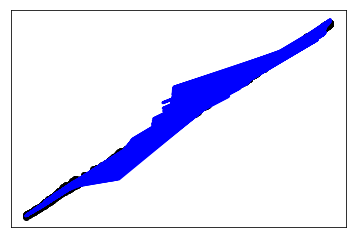

In [539]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [540]:
print("Index| prediction |Actual result| error")

#for prediction in predictions:
 #   print(prediction)
station = 10
count = 0
error = []
for i in y_test.index:
    err = diabetes_y_pred[count][station] - y_test.loc[i][station]
    print(i, "\t", diabetes_y_pred[count][station],"\t", y_test.loc[i][station], "\t", err)
    error.append(err)
    count += 1
ErrorArray.append(error)

Index| prediction |Actual result| error
515 	 71283.70054973557 	 71356 	 -72.29945026442874
452 	 61889.63385991229 	 61987 	 -97.36614008770994
340 	 64742.99499326942 	 64885 	 -142.00500673057832
525 	 57527.960887938105 	 57458 	 69.96088793810486
268 	 51528.7234436051 	 51523 	 5.723443605100329
183 	 68847.92973809529 	 68789 	 58.92973809529212
529 	 75152.89004546925 	 75174 	 -21.109954530751565
483 	 28234.46709112204 	 28171 	 63.467091122038255
220 	 28159.615510476426 	 28358 	 -198.3844895235743
480 	 79663.35697920006 	 79677 	 -13.643020799936494
399 	 36527.34089683991 	 36319 	 208.34089683990896
410 	 40129.67333758281 	 40015 	 114.67333758281166
287 	 42003.03413155329 	 41996 	 7.034131553293264
588 	 83265.6894199443 	 83007 	 258.689419944305
141 	 66070.67939700399 	 65964 	 106.6793970039871
334 	 53906.08922022035 	 54395 	 -488.91077977965324
233 	 34873.0031475557 	 34675 	 198.00314755569707
360 	 47923.449773642446 	 47908 	 15.449773642445507
425 	 533

In [541]:
ErrorArray

[[95.58922367974446,
  -5.44607795932825,
  77.34912644865835,
  -318.66253353998036,
  13.602734233929368,
  93.15491436823504,
  -54.04634525210713,
  -28.881948019632546,
  53.998246996874514,
  118.6888782547685,
  222.18574271776743,
  134.2943520677436,
  -192.4867494638238,
  -65.56107835066359,
  1397.1978189284055,
  83.745399881911,
  371.6378761197193,
  -46.47323216604855,
  0.6596976032524253,
  27.022260089666815,
  -188.38922129883576,
  6.185742717767425,
  -1.3988788285059854,
  41.11993440176593,
  -272.1560466352894,
  109.17138827010785,
  -16.905267997928604,
  -74.2948175192214,
  284.2877054468627,
  -8.561078350663593,
  -91.86840560822748,
  400.33877260802547,
  110.44149508415285,
  -59.04618384182686,
  6.053097060030268,
  -312.4994341343918,
  -36.976870107835566,
  339.3332478388693,
  22.94732507866138,
  -105.15509729139012,
  -20.4322457329763,
  -61.53775837337162,
  -121.24363714726496,
  -178.31509085743892,
  -149.7746739618815,
  22.5677542670237,

In [542]:
len(ErrorArray)

5

In [543]:
import numpy as np
newErrorArray = np.transpose(ErrorArray)

In [544]:
newErrorArray

array([[ 9.55892237e+01,  2.11282412e+02, -8.86421175e+01,
         6.72122509e+01, -7.22994503e+01],
       [-5.44607796e+00, -5.78167298e+01, -7.65545498e+00,
         2.48794235e+01, -9.73661401e+01],
       [ 7.73491264e+01,  2.55551914e+02,  6.99146288e+01,
         1.16410319e+02, -1.42005007e+02],
       [-3.18662534e+02,  1.50049064e+02,  1.46701383e+02,
        -4.20139740e+00,  6.99608879e+01],
       [ 1.36027342e+01, -2.56846760e+01,  2.50512378e+02,
         4.77397149e+02,  5.72344361e+00],
       [ 9.31549144e+01, -1.31263807e+01, -2.10676511e+02,
        -8.04328216e+01,  5.89297381e+01],
       [-5.40463453e+01,  7.39167696e+01,  1.26777871e+02,
         1.75826413e+02, -2.11099545e+01],
       [-2.88819480e+01, -1.80751103e+02,  1.84437191e+01,
         7.06240599e+01,  6.34670911e+01],
       [ 5.39982470e+01, -2.28062453e+01,  6.88756296e+01,
        -2.01122690e+01, -1.98384490e+02],
       [ 1.18688878e+02, -5.48532288e+01,  1.15116323e+02,
        -4.78551208e+01

In [546]:
df = pd.DataFrame(data=newErrorArray,columns=['Group1','Group2','Group3', 'Group4','Group5'])

In [547]:
df['BASELINE'] = 0

<Figure size 432x288 with 0 Axes>

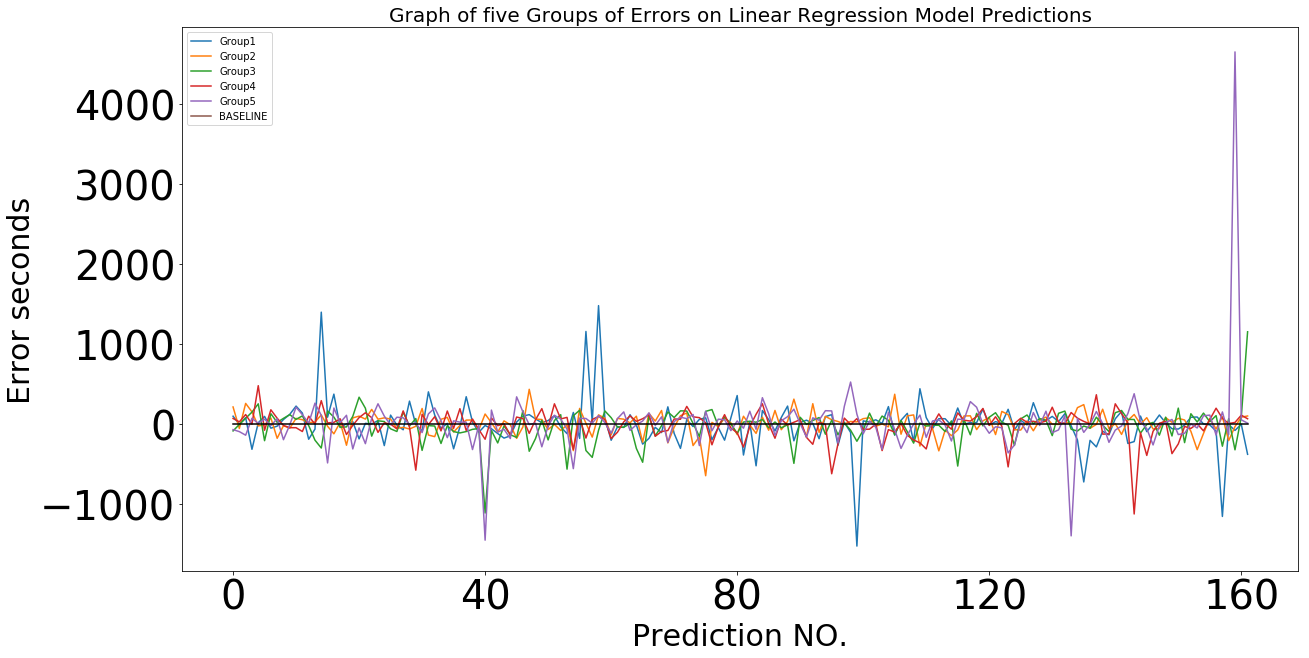

In [550]:
import matplotlib.pyplot as plt
plt.figure()
df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of five Groups of Errors on Linear Regression Model Predictions', fontsize=20)
plt.xlabel('Prediction NO.',fontsize=30)
plt.ylabel('Error seconds',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 162, 40))
plt.show()

# K-fold crossing-validation testing

In [551]:
def generalCrossValidationData(n_folds=10):
    '''
        This function is to separate DataFrame into k folds groups, each group include 90% train data and 10% test data,
        which is followed k-folds Cross-validation model.
        Input Value:
                - the number of folds, default is 10 folds
        Retrun Value:
                - ({k groups of train dataset}, {k group of test dataset})
    '''
    # Reading from a csv file, into a data frame
    # Drop 'customer' column because it is not continuous feature
    # Randomly shuffle the dataset
    # here you get 70% of the rows for train
    # this code tries to find that train = 70% and test = 30%
    #df = pd.read_csv("39A_73stations_JUN.csv")
    df = pd.read_csv("FINAL_39A_73stations_JUN.csv")
    #df = df.drop(['customer'], axis=1)
    # X Descriptive features (6 continous features)
    # y Target feature (happiness_class)
    a_columns = []
    b_columns = []
    # 74 is the total number of 39A bus stations
    #columns = []
    for i in range(1,74):
        a_columns.append('a_{}'.format(i))
        b_columns.append('b_{}'.format(i))
    all_columns = a_columns + b_columns
    new_df = pd.concat([df[all_columns]], axis=1)

    '''
    y = new_df[b_columns]
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())
    '''
    '''
    new_df = pd.concat([df[['preTripDuration',
                       'plannedPreTripDuration',
                       'plannedTripDuration',
                       'toNextDistance',
                        'tripDuration']]], axis=1)
    '''

    #X = X.fillna(X.mean())
    #y = y.fillna(y.mean())

    # we use k-folds cross validation model and we separate the data into 10 groups of train & test datasets
    # we use KFold method to separate the dataset based 10-folds Cross-validation rule
    from sklearn.cross_validation import KFold
    kf = KFold(len(new_df), n_folds=n_folds)
    train_index = {}
    test_index = {}
    count = 0
    for indexA, indexB in kf:
        train_index[count] = indexA
        test_index[count] = indexB
        count += 1

    trains = {}
    tests = {}
    for i in range(10):
        trains[i] = new_df.loc[train_index[i]]
        tests[i] = new_df.loc[test_index[i]]
    return (trains, tests)

In [552]:
trains, tests = generalCrossValidationData(10)

In [553]:
trains[0].head()

,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,...,b_64,b_65,b_66,b_67,b_68,b_69,b_70,b_71,b_72,b_73
65,43200,43330,43353,43397,43415,43452,43494,43543,43609,43670,...,49182,49273,49308,49353,49429,49497,49524,49577,49631,49703
66,43200,43330,43353,43397,43415,43452,43494,43543,43609,43670,...,48270,48351,48368,48410,48494,48581,48609,48670,48704,48727
67,55200,55366,55396,55459,55485,55538,55569,55606,55656,55717,...,60898,60957,60999,61039,61122,61209,61242,61310,61343,61369
68,55200,55366,55396,55459,55485,55538,55569,55606,55656,55717,...,60674,60765,60783,60820,60894,60969,61002,61062,61091,61110
69,68400,68520,68580,68634,68656,68700,68748,68804,68880,68940,...,72640,72728,72768,72830,72894,72977,72991,73065,73075,73075


In [554]:
# 10-fold crossing validation testing
scores = 0
vscores = 0
MSES = 0
a_columns = []
b_columns = []
for i in range(1,74):
        a_columns.append('a_{}'.format(i))
        b_columns.append('b_{}'.format(i))
#all_columns = a_columns + b_columns
for i in range(10):
    train = trains[i]
    test = tests[i]
    
    train_X = pd.concat([train[a_columns]], axis=1)
    train_y = train[b_columns]
    train_X = train_X.fillna(train_X.mean())
    train_y = train_y.fillna(train_y.mean())
    
    test_X = pd.concat([test[a_columns]])
    test_y = test[b_columns]
    test_X = test_X.fillna(test_X.mean())
    test_y = test_y.fillna(test_y.mean())
    
    
    
    # Instantiate model
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(train_X, train_y)

    score = regr.score(test_X, test_y)
    scores += score
    print("test {}\n\tTraining set Score: {}".format(i+1,score))
    
    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(test_X)
    
    # The mean squared error
    MSE = mean_squared_error(test_y, diabetes_y_pred)
    MSES += MSE
    print("\tMean squared error: %.2f"
      % MSE)
    
    # Explained variance score: 1 is perfect prediction
    vscore = r2_score(test_y, diabetes_y_pred)
    vscores += vscore
    print('\tVariance score: %.2f' % vscore)
    
    #break
print("Average of Score is: ", scores/10)
print("Average of MSES is: ", MSES/10)
print("Average of vscore is: ", vscores/10)

test 1
	Training set Score: 0.993661292439304
	Mean squared error: 1551961.61
	Variance score: 0.99
test 2
	Training set Score: 0.9663594845413421
	Mean squared error: 8750960.51
	Variance score: 0.97
test 3
	Training set Score: 0.9989090741450019
	Mean squared error: 276515.34
	Variance score: 1.00
test 4
	Training set Score: 0.9655013232201441
	Mean squared error: 8378258.97
	Variance score: 0.97
test 5
	Training set Score: 0.9980772534040406
	Mean squared error: 390929.99
	Variance score: 1.00
test 6
	Training set Score: 0.9993182540439561
	Mean squared error: 140499.28
	Variance score: 1.00
test 7
	Training set Score: 0.9989979889893119
	Mean squared error: 279073.67
	Variance score: 1.00
test 8
	Training set Score: 0.9992404245916858
	Mean squared error: 155832.04
	Variance score: 1.00
test 9
	Training set Score: 0.9992523658225763
	Mean squared error: 153592.81
	Variance score: 1.00
test 10
	Training set Score: 0.9976598742934877
	Mean squared error: 557540.90
	Variance score: 1.